___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate

from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.layers import Dropout

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe:
pd.set_option("display.max_columns", None)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
df = pd.read_csv('1-Churn_Modelling.csv')
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2      0.000              1          1               1   
1       1  83807.860              1          0               1   
2       8 159660.800              3          1               0   
3       1      0.000              2          0               0   
4       2 125510.820              1          1               1   

   EstimatedSalary  Exited  
0       101348.880       1  
1       112542.580       0  
2       113931.570       1  
3        93826.630       0  
4        79084.100       0

In [3]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [4]:
#Seeing the shape of the data
df.shape

#The shape of the data is 10000 rows and 14 columns

(10000, 14)

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [5]:
#First let's see the head of the data
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2      0.000              1          1               1   
1       1  83807.860              1          0               1   
2       8 159660.800              3          1               0   
3       1      0.000              2          0               0   
4       2 125510.820              1          1               1   

   EstimatedSalary  Exited  
0       101348.880       1  
1       112542.580       0  
2       113931.570       1  
3        93826.630       0  
4        79084.100       0

In [6]:
#To see the information of the data 
df.info()
#We can see that there are 10000 entries from 0 to 9999.
#Also, we have 2 float, 9 int, and 3 objects
#In all the columns, there is no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
#Checking if there is any null data
df.isnull().sum()
#As we can see there is no null data

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
#Checking the duplicated data
df.duplicated().sum()
#As we can see, there is no duplicated data

0

In [9]:
#Let's see the describtion of the data
df.describe().T

count         mean       std          min          25%  \
RowNumber       10000.000     5000.500  2886.896        1.000     2500.750   
CustomerId      10000.000 15690940.569 71936.186 15565701.000 15628528.250   
CreditScore     10000.000      650.529    96.653      350.000      584.000   
Age             10000.000       38.922    10.488       18.000       32.000   
Tenure          10000.000        5.013     2.892        0.000        3.000   
Balance         10000.000    76485.889 62397.405        0.000        0.000   
NumOfProducts   10000.000        1.530     0.582        1.000        1.000   
HasCrCard       10000.000        0.706     0.456        0.000        0.000   
IsActiveMember  10000.000        0.515     0.500        0.000        0.000   
EstimatedSalary 10000.000   100090.240 57510.493       11.580    51002.110   
Exited          10000.000        0.204     0.403        0.000        0.000   

                         50%          75%          max  
RowNumber           5000.500     7500.250    10000.000  
CustomerId      15690738.000 15753233.750 15815690.000  
CreditScore          652.000      718.000      850.000  
Age                   37.000       44.000       92.000  
Tenure                 5.000        7.000       10.000  
Balance            97198.540   127644.240   250898.090  
NumOfProducts          1.000        2.000        4.000  
HasCrCard              1.000        1.000        1.000  
IsActiveMember         1.000        1.000        1.000  
EstimatedSalary   100193.915   149388.247   199992.480  
Exited                 0.000        0.000        1.000

### Checking for missing values

<Axes: >

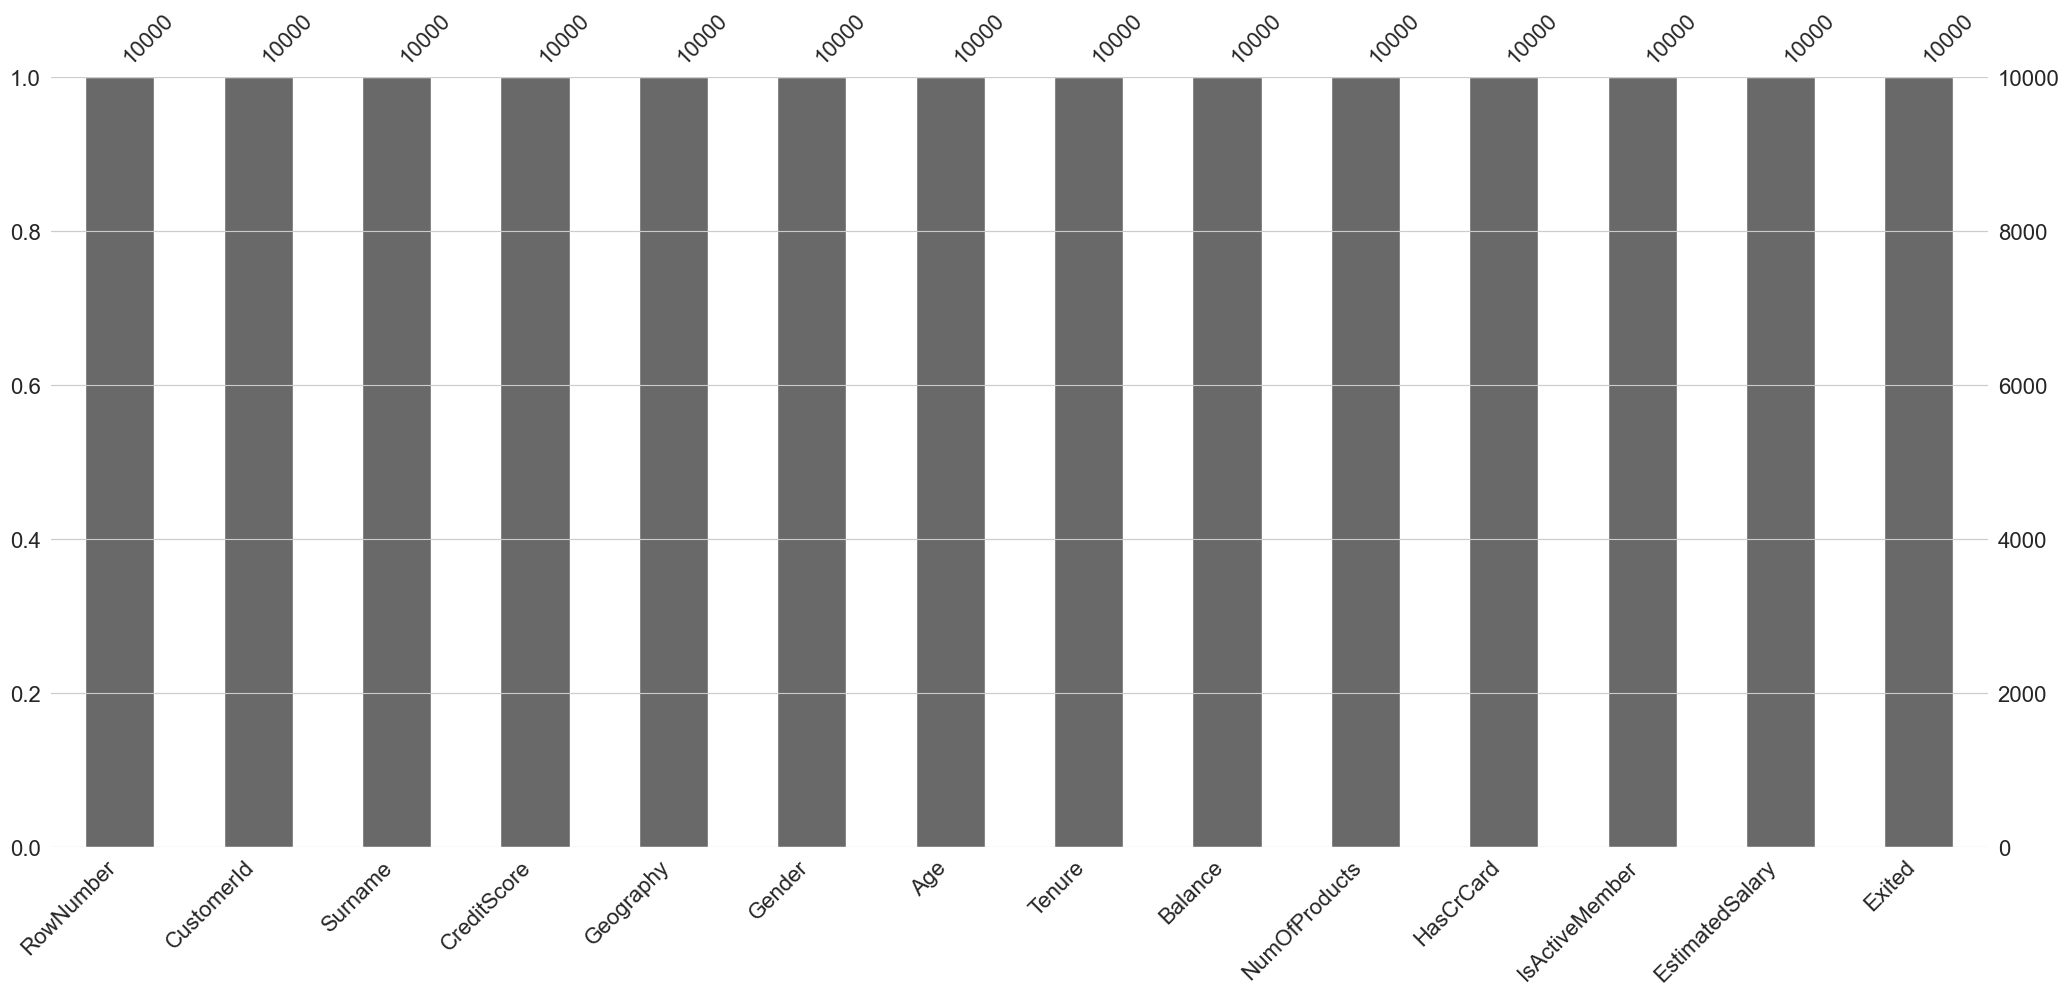

In [10]:
msno.bar(df)
#From the graph, we can see that there is no missing values

In [11]:
#The columns before deleting 
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [12]:
#The shape of the data before deleting
df.shape

(10000, 14)

### RowNumber, CustomerId, Surname

In [13]:
#First, let's see what is RowNumber: Row Numbers from 1 to 10000.
#So, this is not an important column, so I am going to drop it from the data

#CustomerId, A unique ID that identifies each customer. This is also,
#Not an important column and the model will not learn anything from the id.

#Also, I think surname which is the customer’s surname, is not an important thing as well.
#This is because the names do not make any difference. For example, if you are David, so you will
#open an account in the bank, but if you are June, you will not. Doesn't make sense, right.
#So, i will drop it as well.

df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [14]:
#The shape of the data after deleting
df.shape

(10000, 11)

In [15]:
#The columns of the data after deleting
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

### CreditScore

In [16]:
df['CreditScore'].value_counts()

CreditScore
850    233
678     63
655     54
705     53
667     53
684     52
670     50
651     50
683     48
652     48
648     48
660     48
682     47
663     47
640     47
637     46
714     45
686     45
710     45
645     45
633     45
687     45
679     45
706     44
627     44
646     44
619     44
584     43
625     43
628     43
608     43
613     42
635     42
632     42
701     41
554     41
712     41
698     41
601     40
699     40
597     40
634     40
606     40
680     40
644     39
711     39
681     39
656     39
592     38
593     38
659     38
718     38
611     38
630     38
666     38
696     38
641     38
581     38
605     37
675     37
695     37
624     37
629     37
614     37
579     37
653     37
662     37
616     37
639     37
650     37
642     37
724     37
607     36
649     36
622     36
676     36
727     36
636     36
709     36
590     36
707     36
697     36
669     36
661     35
673     35
668     35
685     35
677     35
615     35
704     3

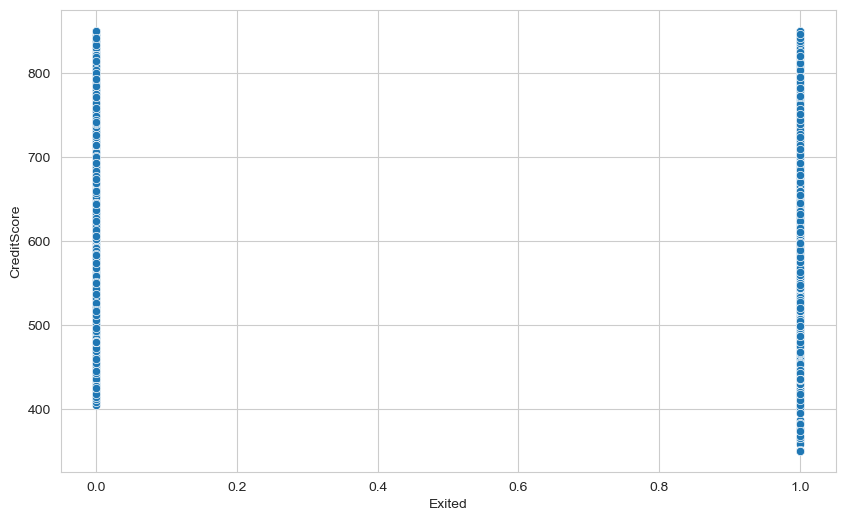

In [17]:
#Seeing the scatterplot of CreditScore with our target
sns.scatterplot(x='Exited', y='CreditScore', data=df)
plt.show()

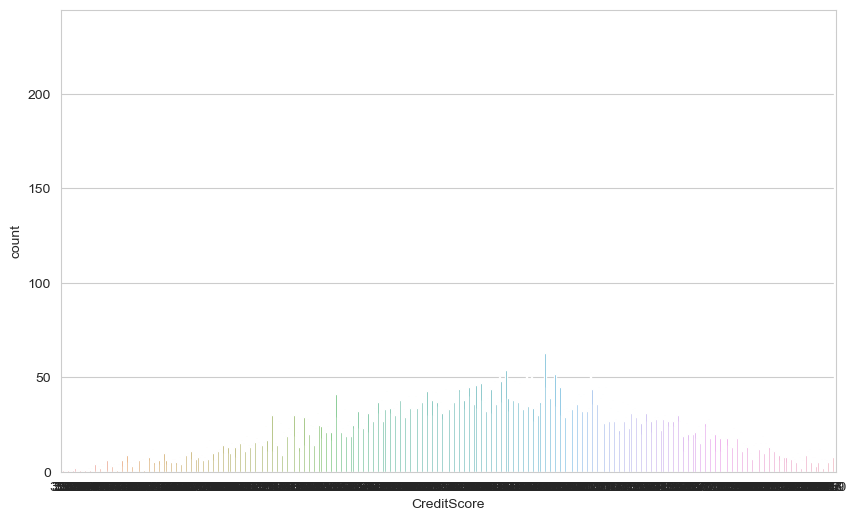

In [18]:
#Seeing the countplot of CreditScore
sns.countplot(x=df["CreditScore"])
plt.show()

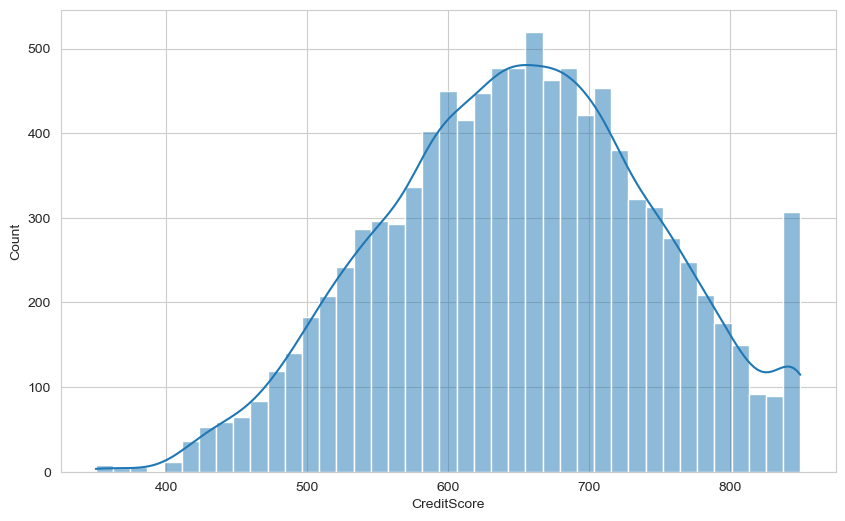

In [19]:
#Seeing the histplot of CreditScore with the target
sns.histplot(df["CreditScore"], kde=True)
plt.show()

### Geography

In [20]:
#Seeing the value counts of Geography
df['Geography'].value_counts()
#As we can see, there are three different regions here, but france has the highest number.

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

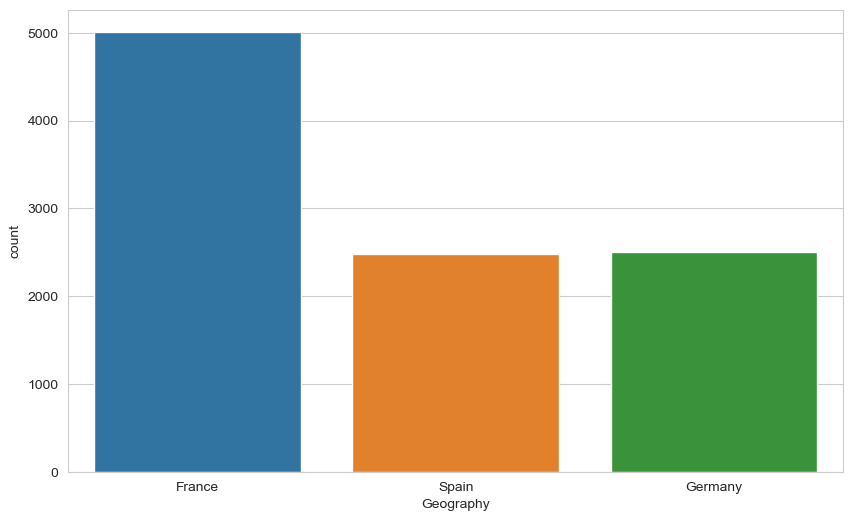

In [21]:
#Seeing the countplot of Geography
sns.countplot(x=df['Geography'])
plt.show()
#From the graph, we can see that the values of spain and Germany are nearly the same, but France is much higher

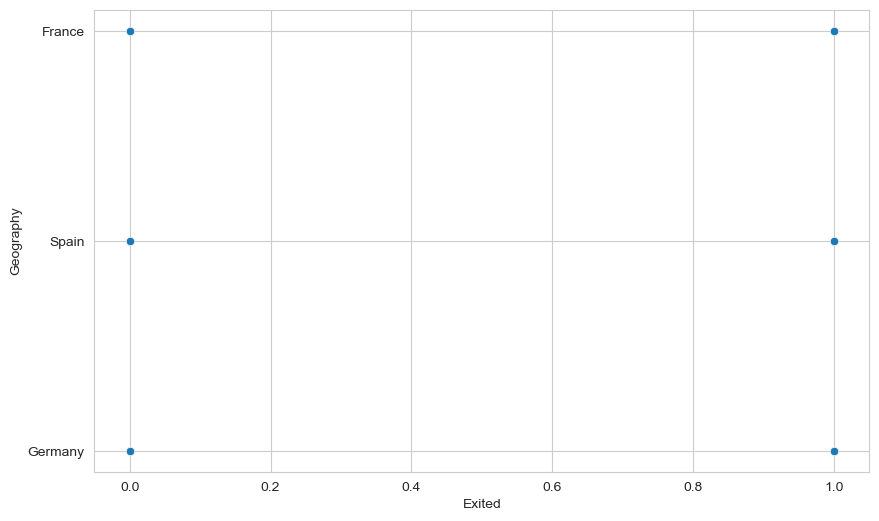

In [22]:
#Seeing the scatterplot of Geography with the target
sns.scatterplot(x='Exited', y='Geography', data=df)
plt.show()
#from the graph, we cannot get anythin from this graph, because our target is a binary.

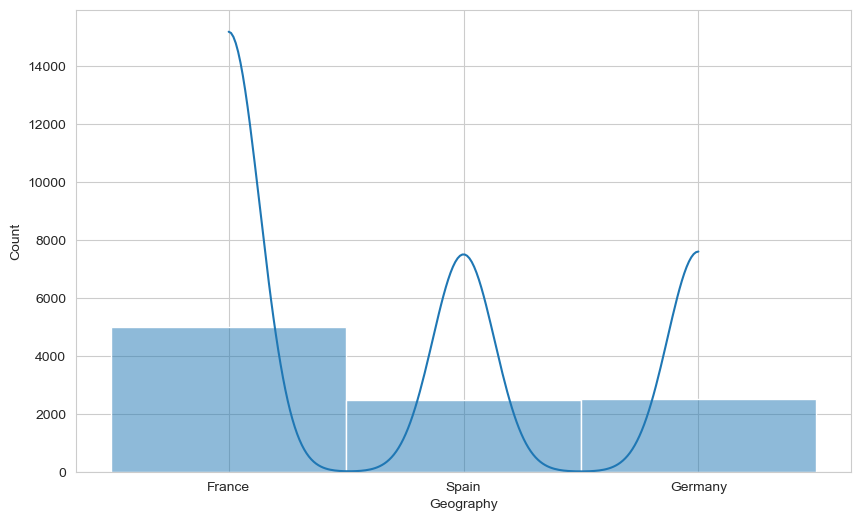

In [23]:
#Seeing the histplot of Geography
sns.histplot(df["Geography"], kde=True)
plt.show()

### Gender

In [24]:
df['Gender'].value_counts()
#As we can see, there are 5457 values in the Male, and 4543 in the Female

Gender
Male      5457
Female    4543
Name: count, dtype: int64

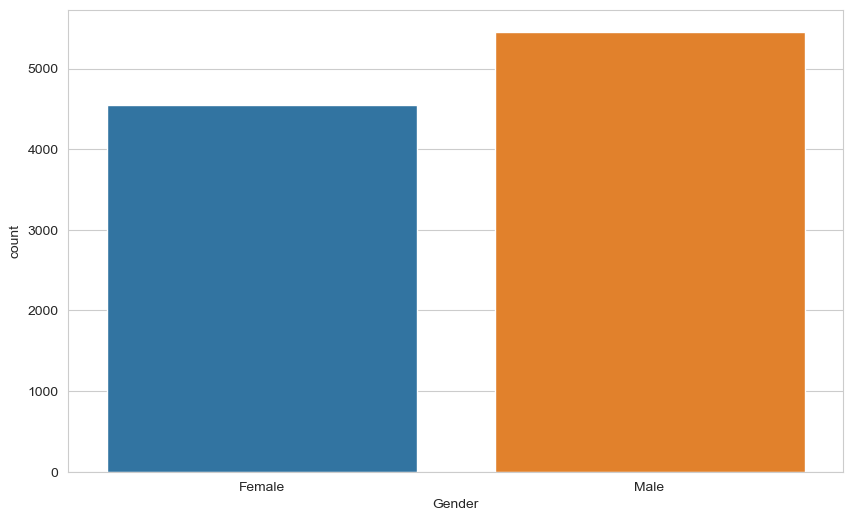

In [25]:
#Seeing the countplot of Gender
sns.countplot(x=df['Gender'])
plt.show()
#From the graph, we can say that there are more men.

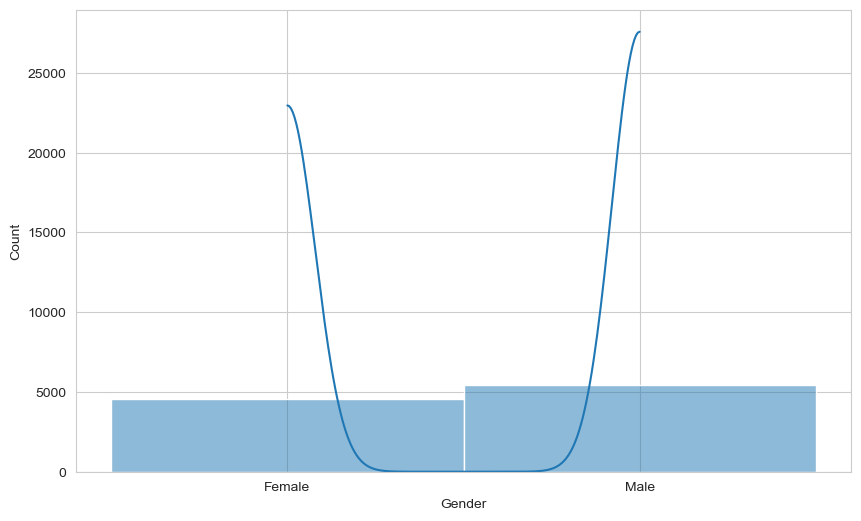

In [26]:
#Seeing the histplot of Gender
sns.histplot(df["Gender"], kde=True)
plt.show()

### Age

In [27]:
#Seeing the value counts of the age
df['Age'].value_counts()

Age
37    478
38    477
35    474
36    456
34    447
33    442
40    432
39    423
32    418
31    404
41    366
29    348
30    327
42    321
43    297
28    273
44    257
45    229
46    226
27    209
26    200
47    175
48    168
25    154
49    147
50    134
24    132
51    119
52    102
23     99
22     84
54     84
55     82
57     75
53     74
56     70
58     67
60     62
59     62
61     53
21     53
62     52
63     40
20     40
64     37
67     37
66     35
71     27
19     27
18     22
69     22
72     21
68     19
74     18
65     18
70     18
73     13
76     11
77     10
75      9
78      5
79      4
81      4
80      3
84      2
92      2
82      1
88      1
85      1
83      1
Name: count, dtype: int64

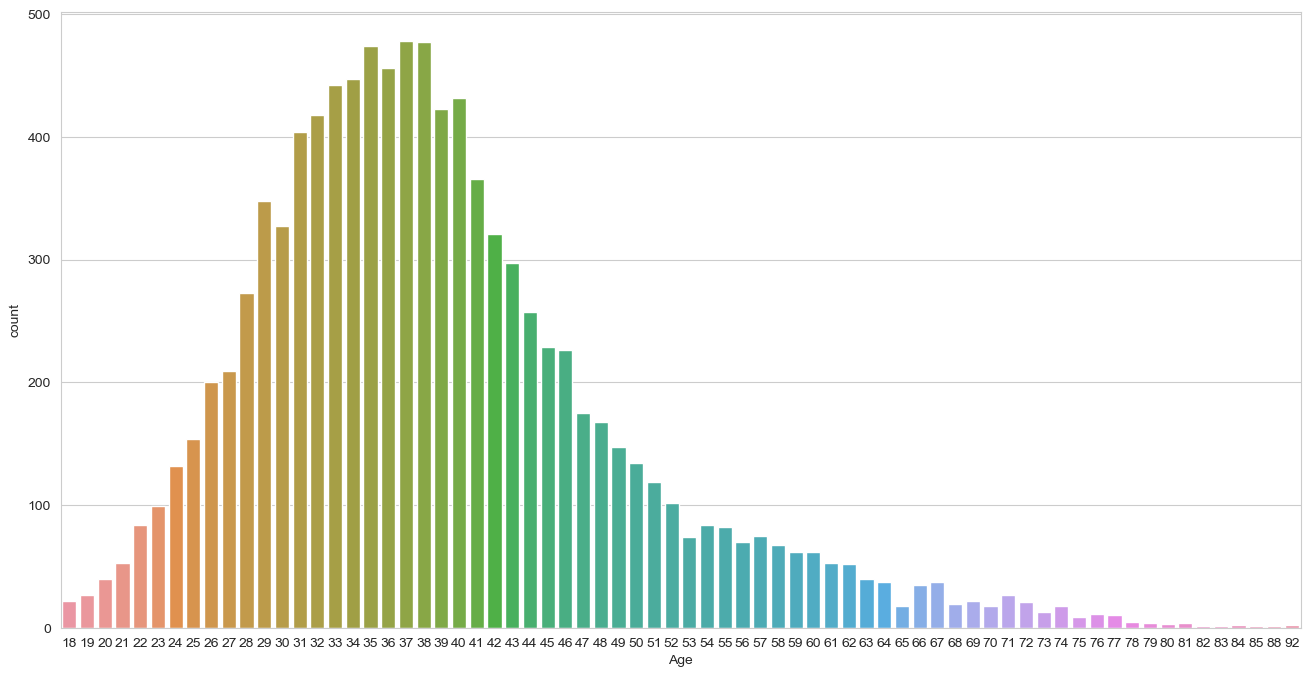

In [28]:
#Seeing the countplot of Age
plt.figure(figsize=(16, 8))
sns.countplot(x=df['Age'])
plt.show()
#From the graph, we can say that most values are in the middle, and in the end, nearly from 70, the values are so small

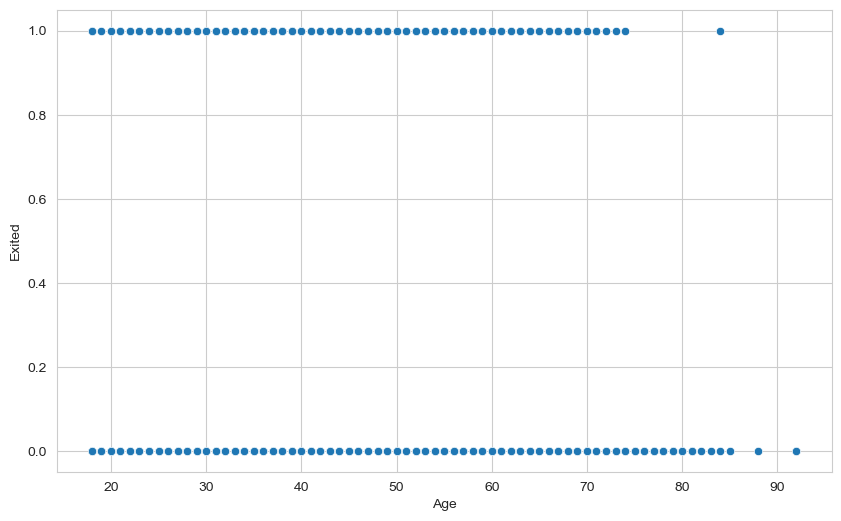

In [29]:
#Seeing the scatterplot of Age with the target
sns.scatterplot(x='Age', y='Exited', data=df)
plt.show()

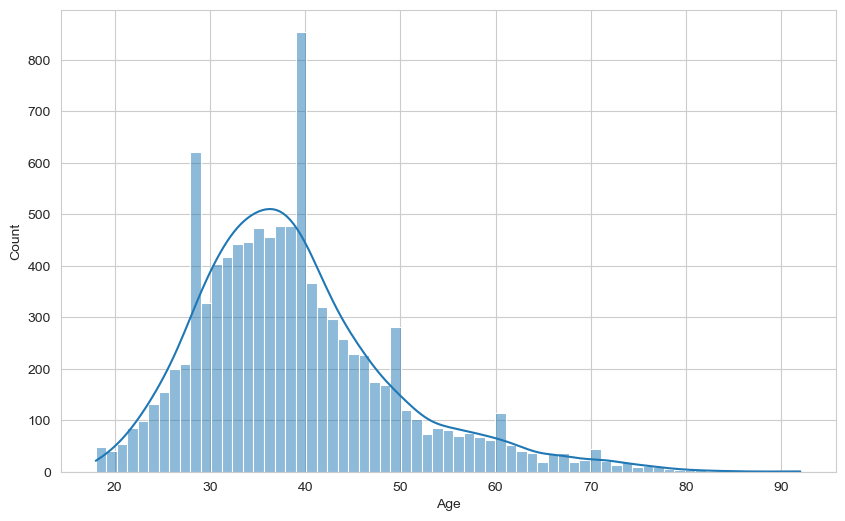

In [30]:
#Seeing the histplot of Age
sns.histplot(df["Age"], kde=True)
plt.show()
#From this graph also, we can see that the values at the end are so small

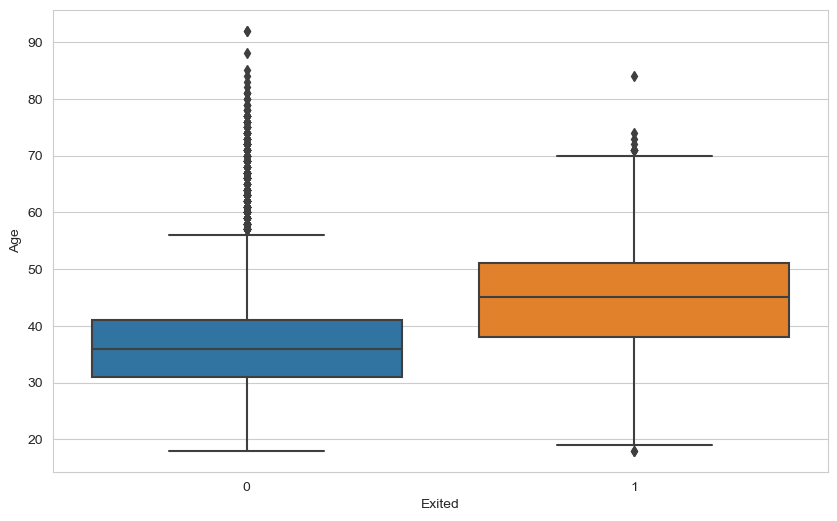

In [31]:
#Seeing the boxplot of the Age with the target
sns.boxplot(x='Exited', y='Age', data=df)
plt.show()
#From the graph, we can see that there are some outliers

### Tenure
#### The number of years for which the customer has been with the bank

In [32]:
#Seeing the value counts of Tenure
df['Tenure'].value_counts()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

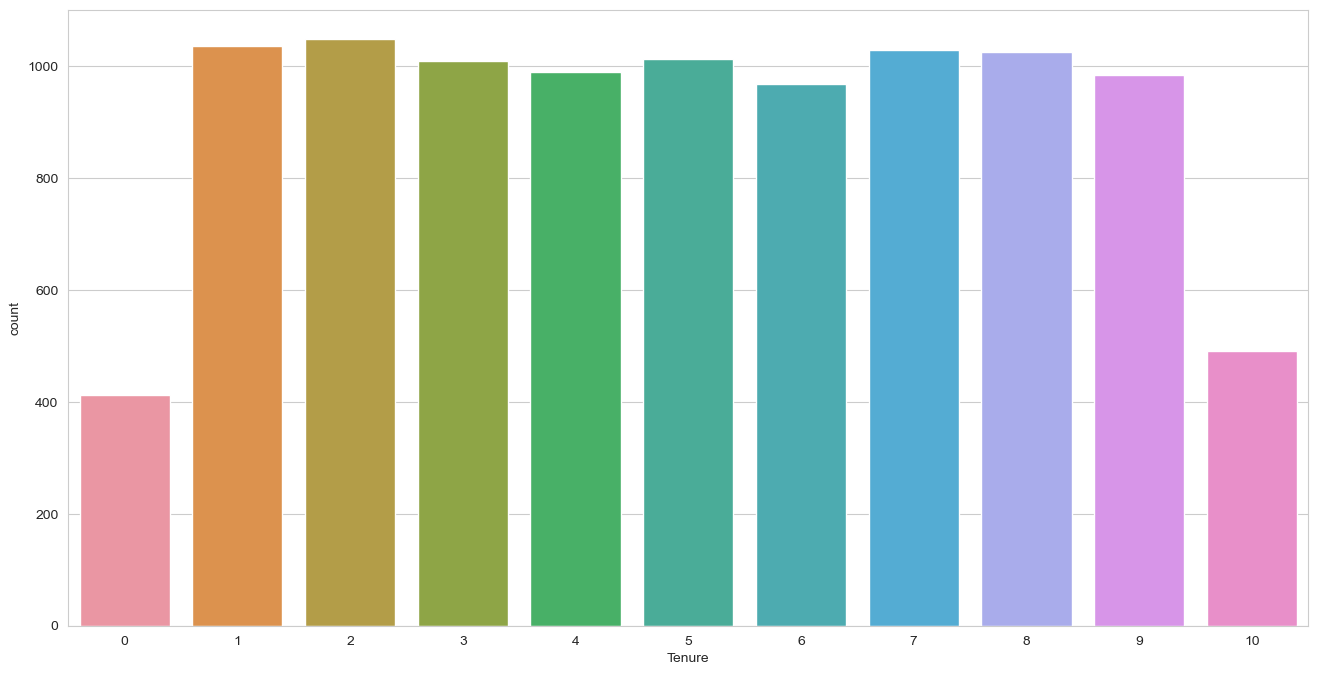

In [33]:
#Seeing the countplot of Tenure
plt.figure(figsize=(16, 8))
sns.countplot(x=df['Tenure'])
plt.show()
#From the graph, we can see that the value of 10 and 0 are the smallest ones

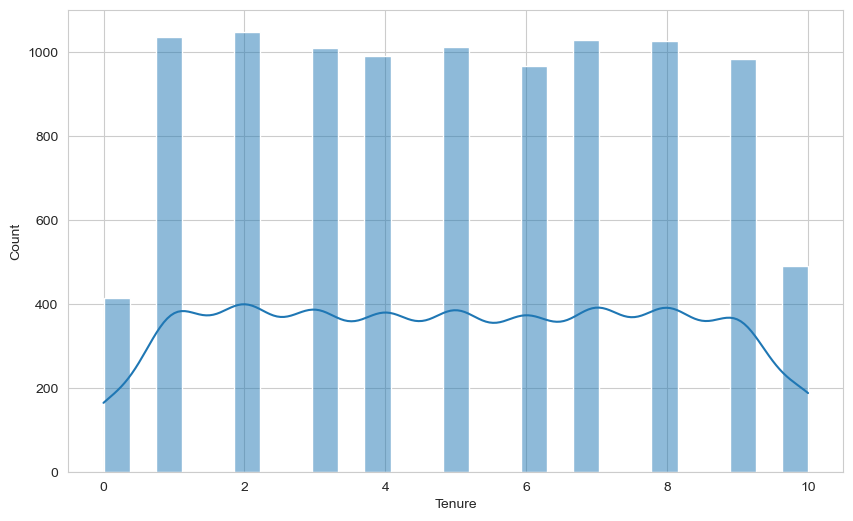

In [34]:
#Seeing the histplot of Tenure
sns.histplot(df["Tenure"], kde=True)
plt.show()

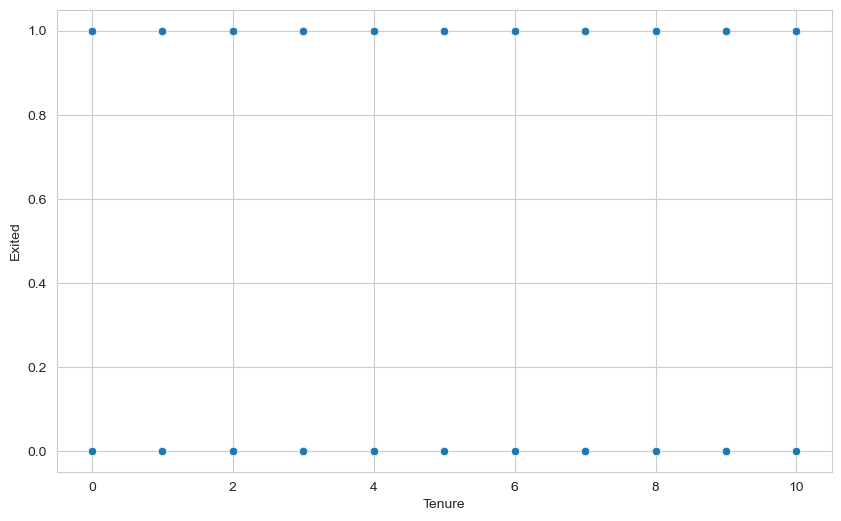

In [35]:
#Seeing the scatterplot of Tenure with the target
sns.scatterplot(x='Tenure', y='Exited', data=df)
plt.show()
#For scatterplot, we cannot see the data clearly because it is 0 and 1 only(the target I mean)

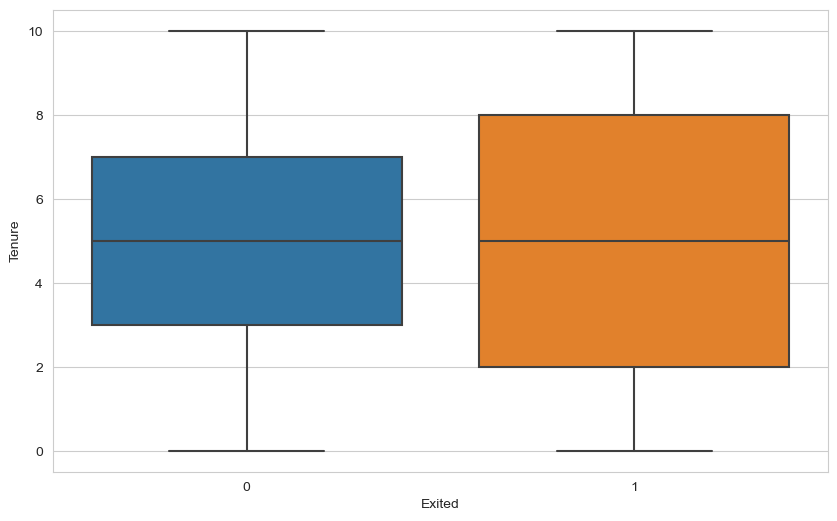

In [36]:
#Seeing the boxplot of the Tenure with the target
sns.boxplot(x='Exited', y='Tenure', data=df)
plt.show()

### Balance
#### Bank balance of the customer.

In [37]:
#Seeing the value counts of Balance
df['Balance'].value_counts()
#From the value counts of Balance, i can say that it may seems an important column, but i do not 
# think there is a pattern in it, as each one has a diffent number, and this may not help the model
#to learn from it, as all of them are just 1 value for each. 

Balance
0.000         3617
130170.820       2
105473.740       2
85304.270        1
159397.750       1
144238.700       1
112262.840       1
109106.800       1
142147.320       1
109109.330       1
146587.300       1
79896.000        1
132371.300       1
85859.760        1
69365.250        1
197715.930       1
95502.210        1
79857.640        1
142643.540       1
120923.520       1
126872.600       1
124213.360       1
138497.840       1
141952.070       1
125385.010       1
155271.830       1
172381.800       1
197200.040       1
127120.620       1
105103.330       1
98848.190        1
157274.360       1
104339.110       1
142946.180       1
109908.060       1
135847.470       1
108935.390       1
150300.650       1
131762.940       1
114453.580       1
128940.240       1
138106.750       1
143656.550       1
127406.500       1
107511.520       1
154377.300       1
125903.220       1
163085.790       1
144837.790       1
106116.560       1
123760.680       1
152160.210       1
1460

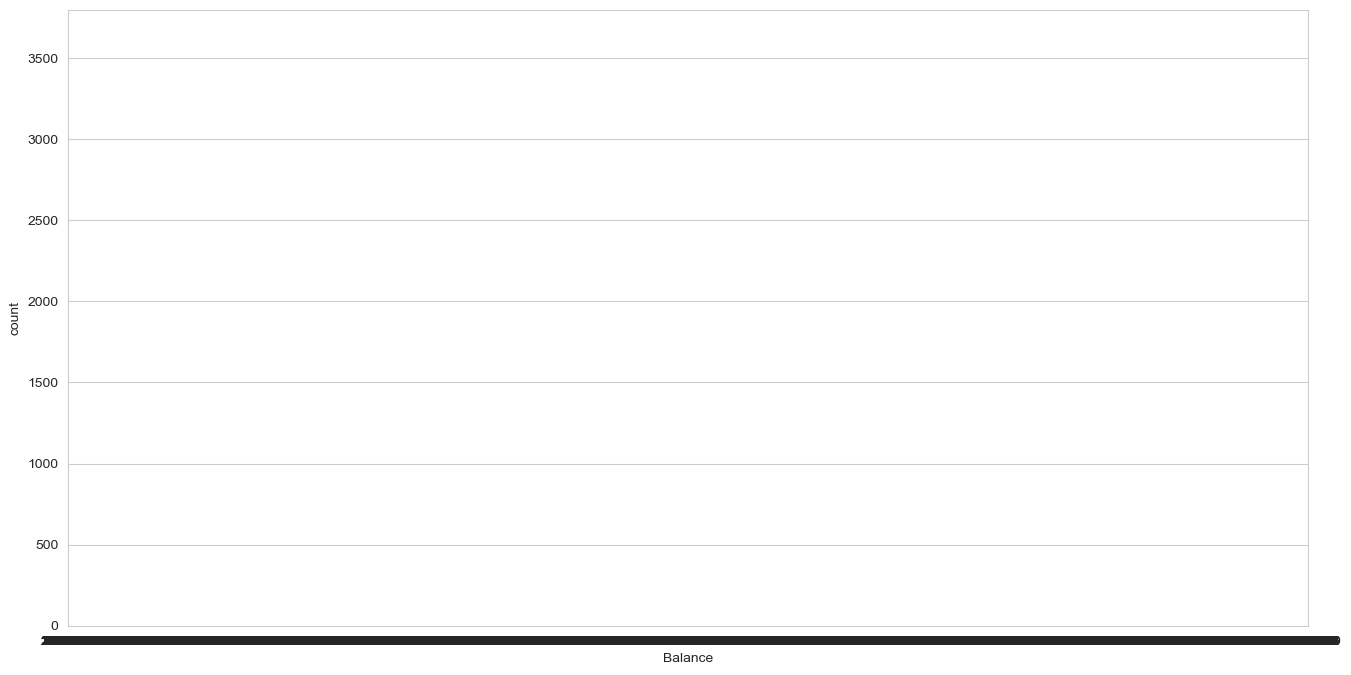

In [38]:
#Seeing the countplot of Balance
plt.figure(figsize=(16, 8))
sns.countplot(x=df['Balance'])
plt.show()

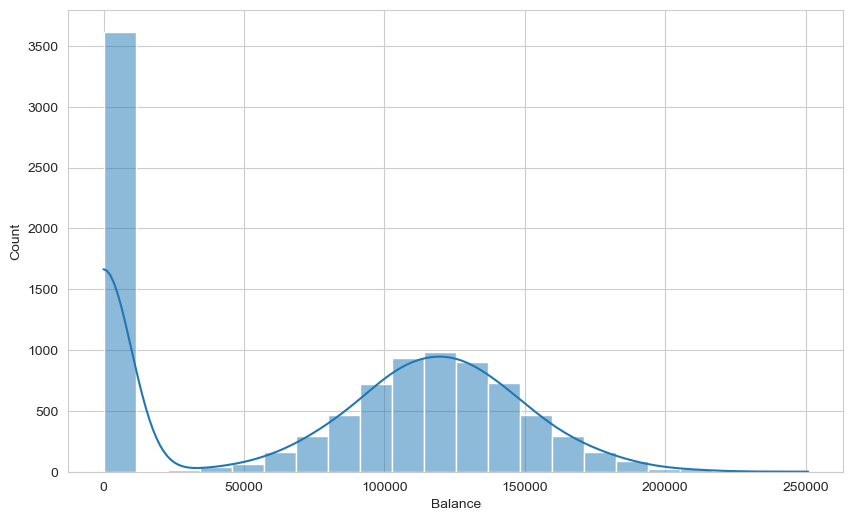

In [39]:
#Seeing the histplot of Balance
sns.histplot(df["Balance"], kde=True)
plt.show()

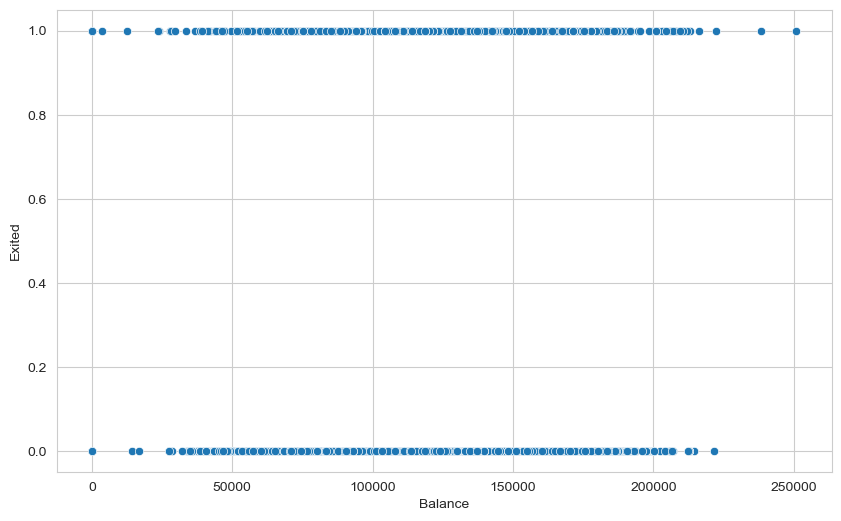

In [40]:
#Seeing the scatterplot of Balance with the target
sns.scatterplot(x='Balance', y='Exited', data=df)
plt.show()

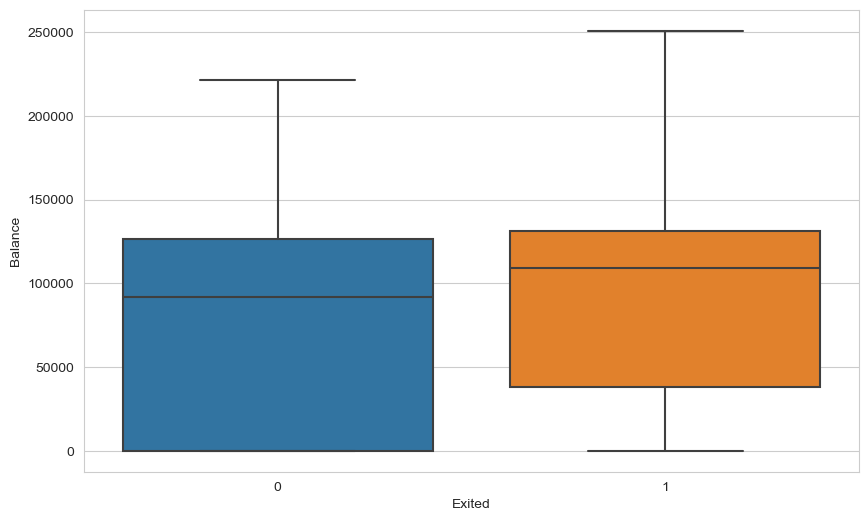

In [41]:
#Seeing the boxplot of the Balance with the target
sns.boxplot(x='Exited', y='Balance', data=df)
plt.show()

### NumOfProducts
#### The number of bank products the customer is utilising.

In [42]:
#Seeing the value counts of NumOfProducts
df['NumOfProducts'].value_counts()
#From the data, we can see that there are 4 types, but 3 and 4 have an insignificant values compared with the others

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

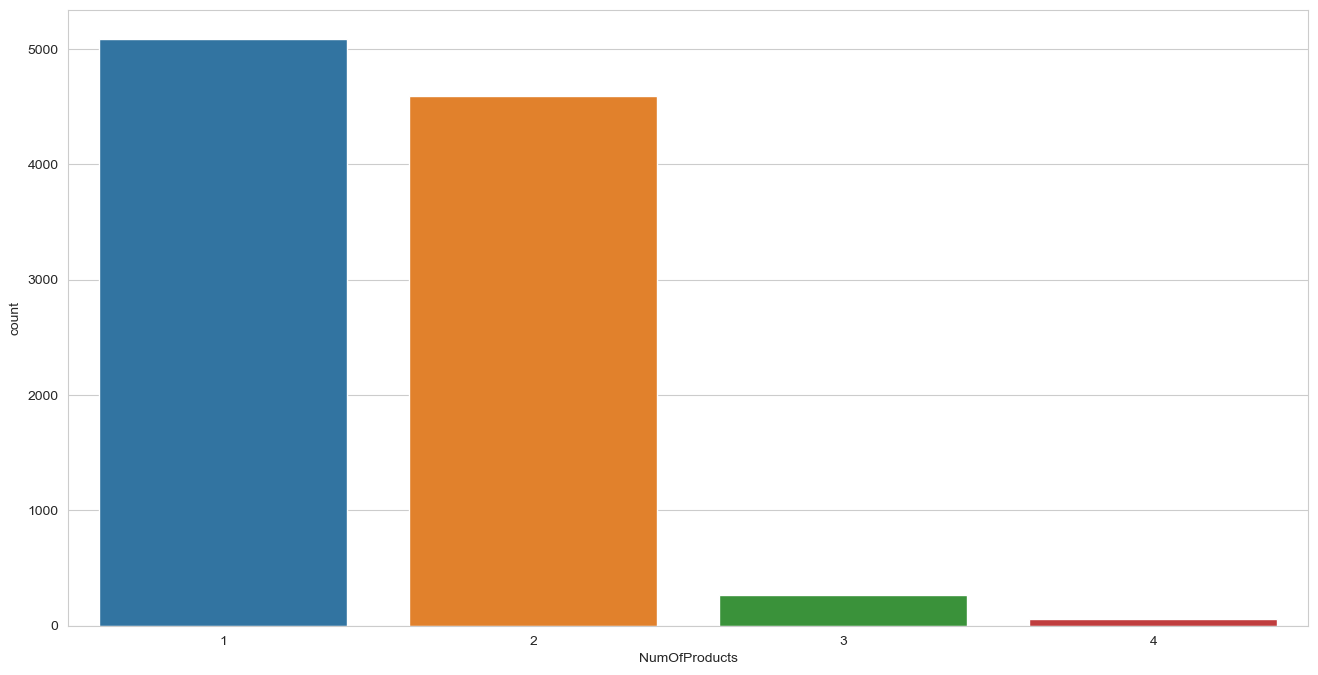

In [43]:
#Seeing the countplot of NumOfProducts
plt.figure(figsize=(16, 8))
sns.countplot(x=df['NumOfProducts'])
plt.show()
#We can see from the graph, most of the data are in 1 and 2.

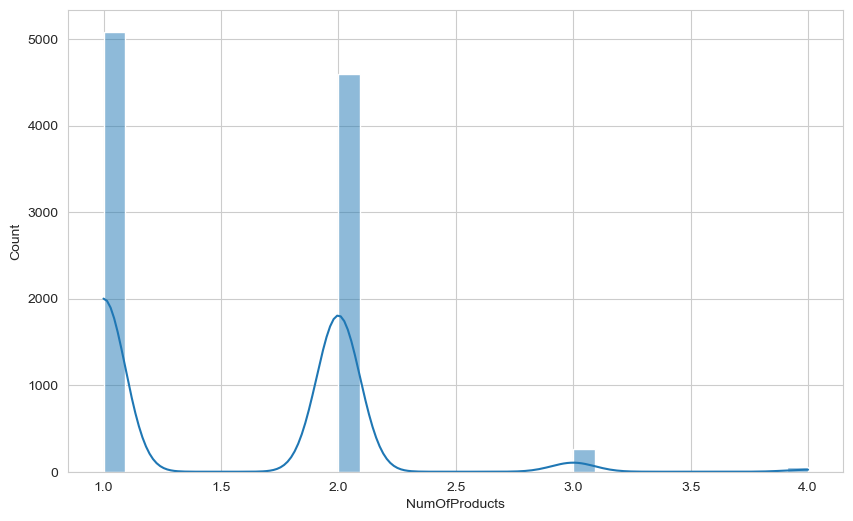

In [44]:
#Seeing the histplot of NumOfProducts
sns.histplot(df["NumOfProducts"], kde=True)
plt.show()

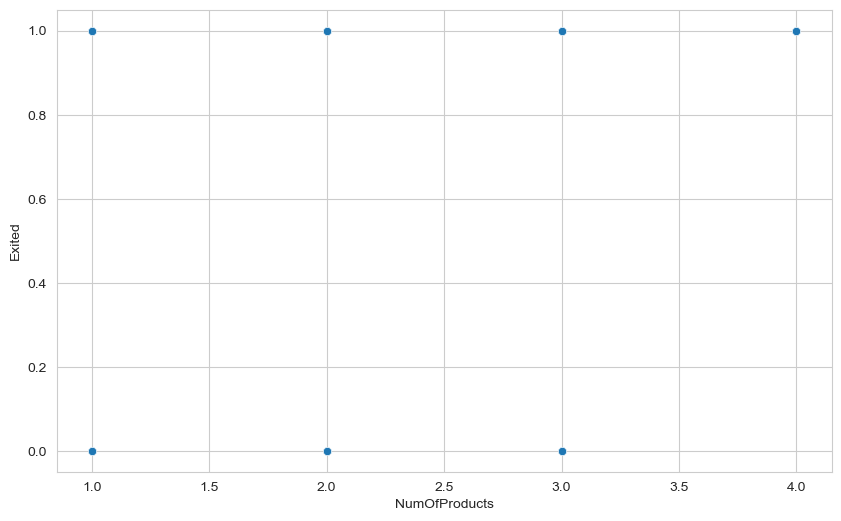

In [45]:
#Seeing the scatterplot of NumOfProducts with the target
sns.scatterplot(x='NumOfProducts', y='Exited', data=df)
plt.show()

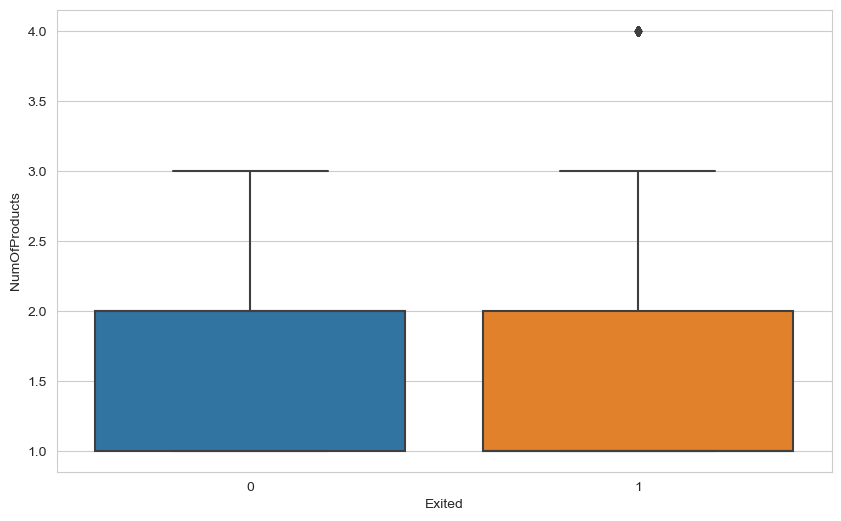

In [46]:
#Seeing the boxplot of the NumOfProducts with the target
sns.boxplot(x='Exited', y='NumOfProducts', data=df)
plt.show()
#This graph shows that there is an outlies at 4, which as we can see from the data previously, which contains 
#tiny values.

<Axes: >

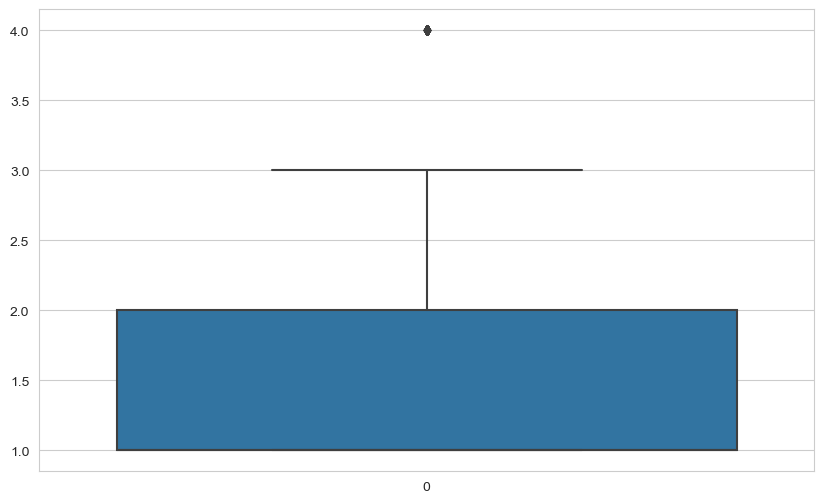

In [72]:
sns.boxplot(df['NumOfProducts'])

### HasCrCard
#### The number of credit cards given to the customer by the bank.

In [47]:
#Seeing the value counts of HasCrCard
df['HasCrCard'].value_counts()
#From the value counts of HasCrCard, we can see that we have binary values for this one, but the values of 1 is 
#much higher than 0. Not so balanced

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

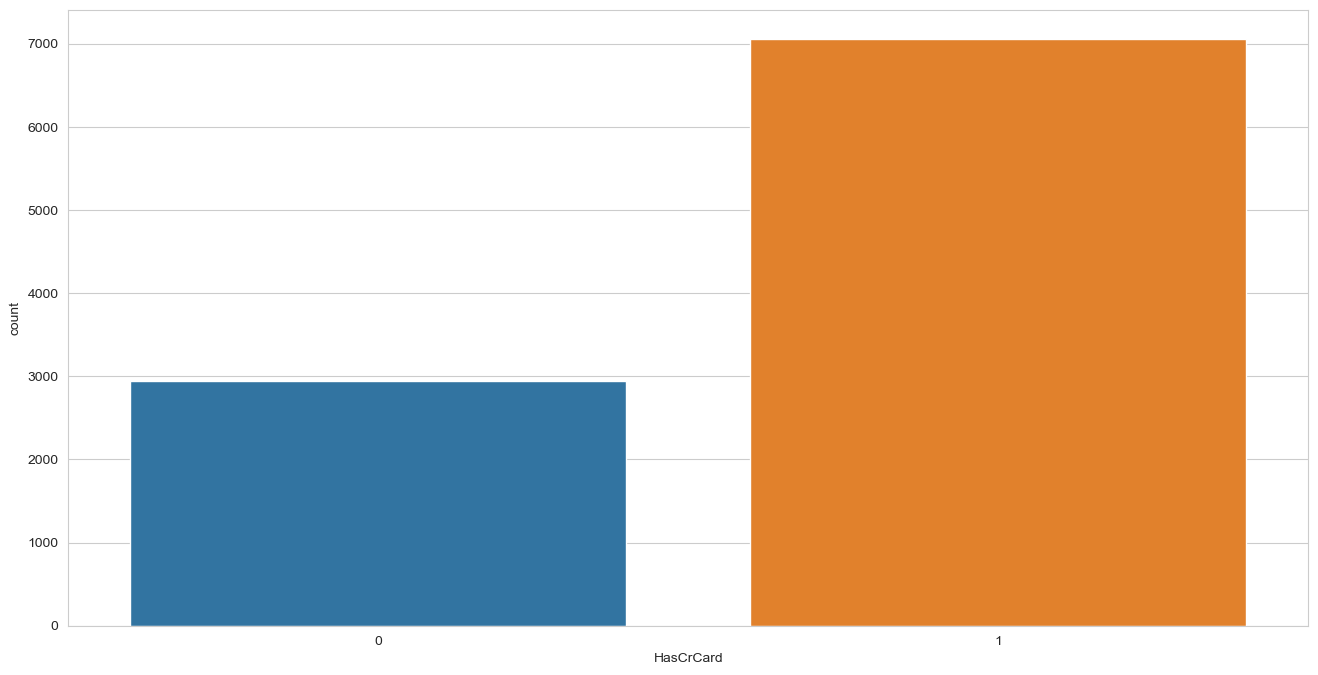

In [48]:
#Seeing the countplot of HasCrCard
plt.figure(figsize=(16, 8))
sns.countplot(x=df['HasCrCard'])
plt.show()
#We can see from the graph again, 1 has more values compared to 0

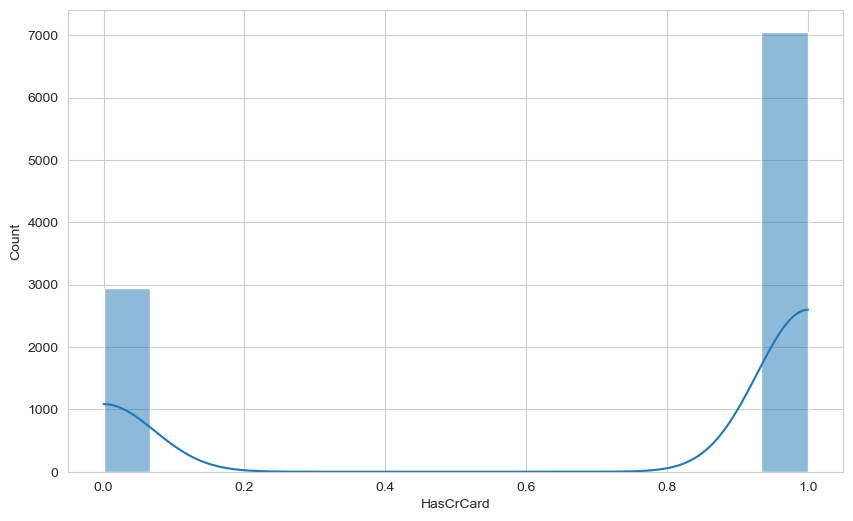

In [49]:
#Seeing the histplot of HasCrCard
sns.histplot(df["HasCrCard"], kde=True)
plt.show()

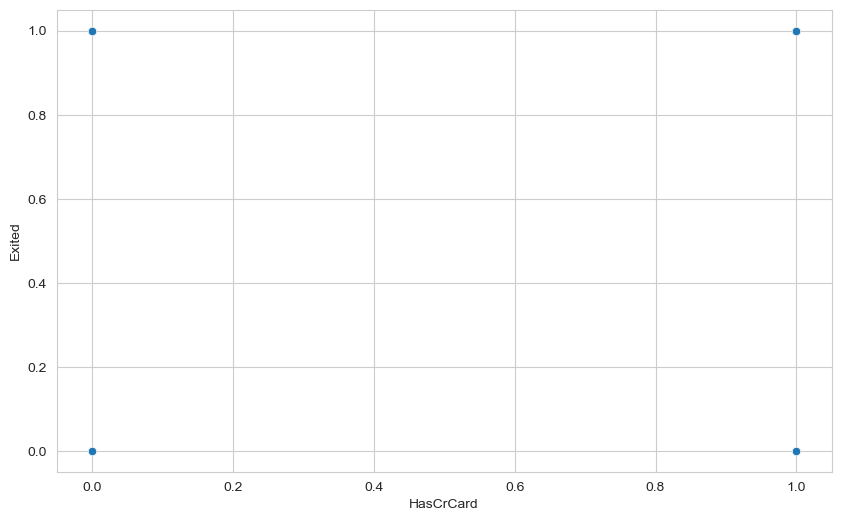

In [50]:
#Seeing the scatterplot of HasCrCard with the target
sns.scatterplot(x='HasCrCard', y='Exited', data=df)
plt.show()

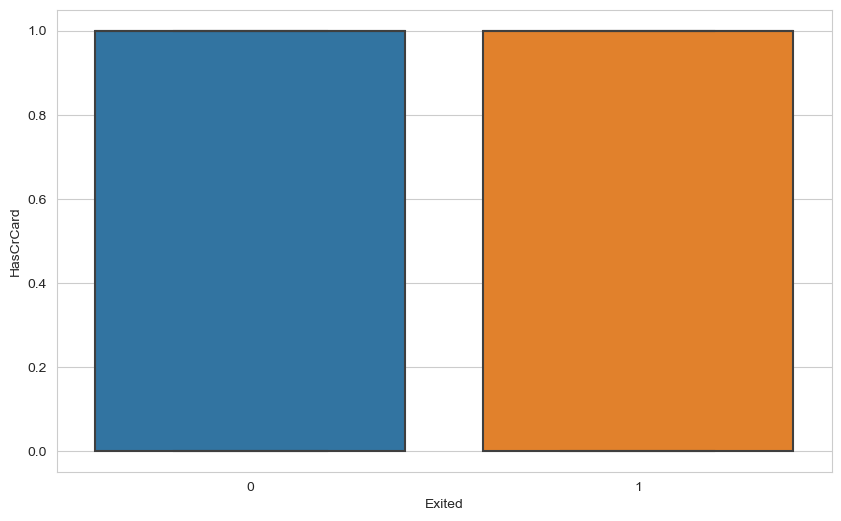

In [51]:
#Seeing the boxplot of the HasCrCard with the target
sns.boxplot(x='Exited', y='HasCrCard', data=df)
plt.show()

### IsActiveMember
#### Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")


In [52]:
#Seeing the value counts of IsActiveMember
df['IsActiveMember'].value_counts()
#From the value counts of IsActiveMember, we can see that it contains binary values 0 and 1.

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

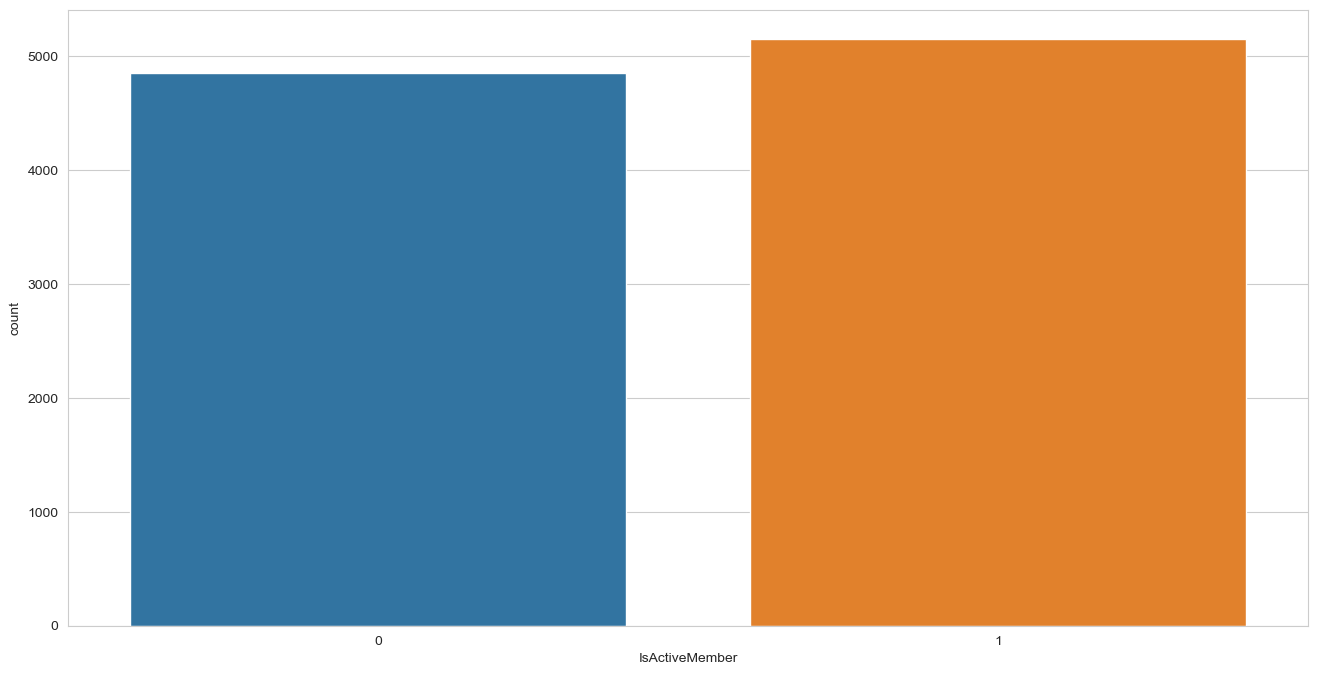

In [53]:
#Seeing the countplot of IsActiveMember
plt.figure(figsize=(16, 8))
sns.countplot(x=df['IsActiveMember'])
plt.show()
#The values of 1 and 0 are close, not big difference

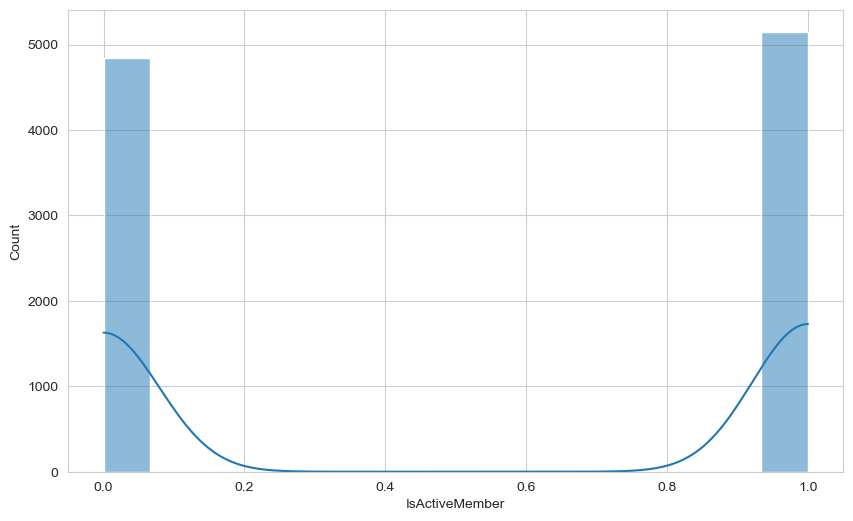

In [54]:
#Seeing the histplot of IsActiveMember
sns.histplot(df["IsActiveMember"], kde=True)
plt.show()

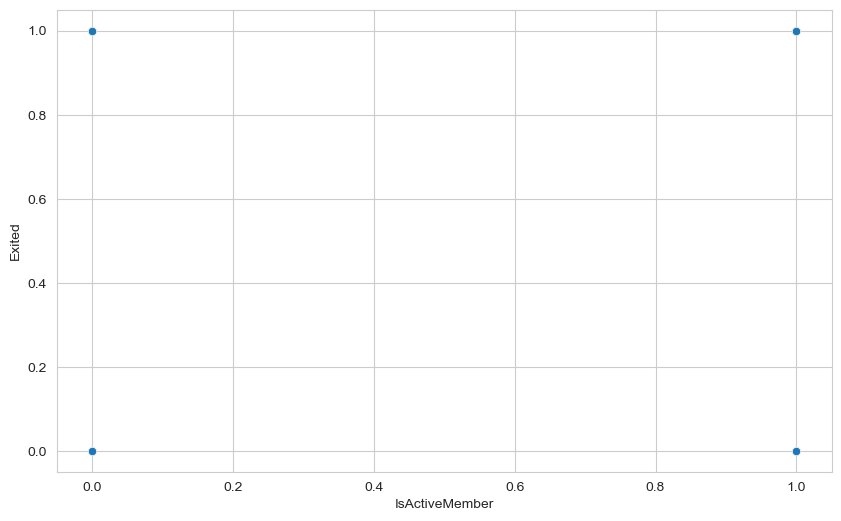

In [55]:
#Seeing the scatterplot of IsActiveMember with the target
sns.scatterplot(x='IsActiveMember', y='Exited', data=df)
plt.show()

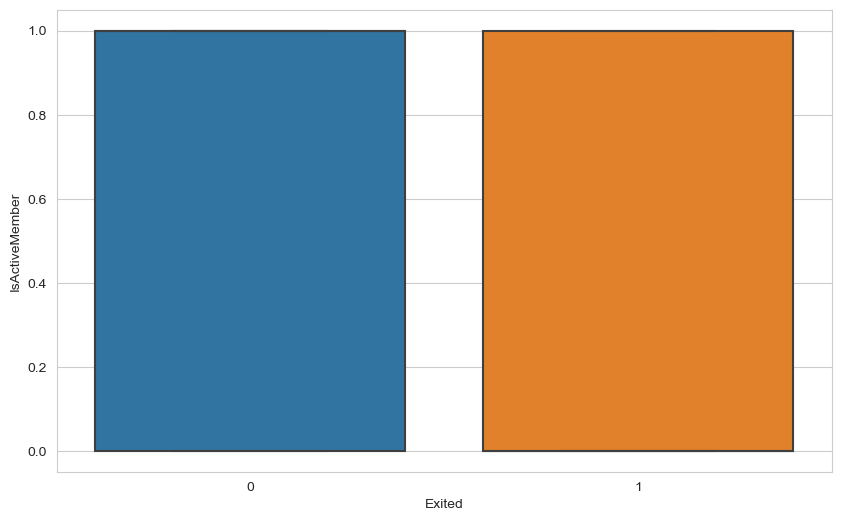

In [56]:
#Seeing the boxplot of the IsActiveMember with the target
sns.boxplot(x='Exited', y='IsActiveMember', data=df)
plt.show()

### EstimatedSalary

In [57]:
#Seeing the value counts of EstimatedSalary
df['EstimatedSalary'].value_counts()
#From the value counts of EstimatedSalary, the values are different from one to one.

EstimatedSalary
24924.920     2
101348.880    1
55313.440     1
72500.680     1
182692.800    1
4993.940      1
124964.820    1
161971.420    1
39488.040     1
187811.710    1
121505.610    1
184514.010    1
121311.120    1
12873.390     1
157238.050    1
123242.110    1
184399.760    1
57323.180     1
89874.820     1
31422.690     1
18988.580     1
19842.180     1
62627.550     1
197266.580    1
199992.480    1
16403.410     1
78854.570     1
189310.270    1
78088.170     1
103305.010    1
143301.490    1
116124.280    1
142730.270    1
58076.520     1
186123.570    1
29664.450     1
147963.070    1
38466.390     1
68293.930     1
10288.240     1
179446.310    1
118929.640    1
115037.670    1
187280.510    1
183540.220    1
28531.810     1
42730.120     1
104721.500    1
65219.850     1
70563.900     1
141453.620    1
139435.120    1
170347.100    1
131553.820    1
138344.700    1
169894.400    1
9770.970      1
74176.710     1
144880.810    1
101168.300    1
71672.860     1
61326.43

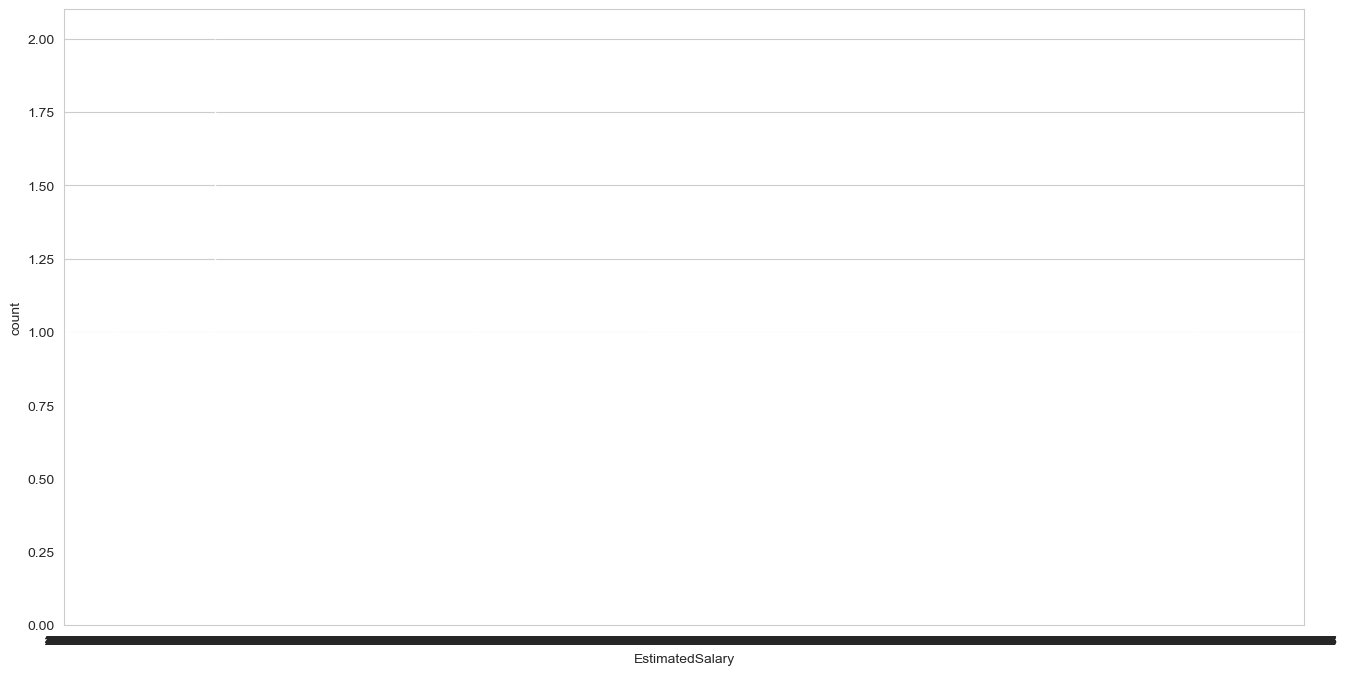

In [58]:
#Seeing the countplot of EstimatedSalary
plt.figure(figsize=(16, 8))
sns.countplot(x=df['EstimatedSalary'])
plt.show()

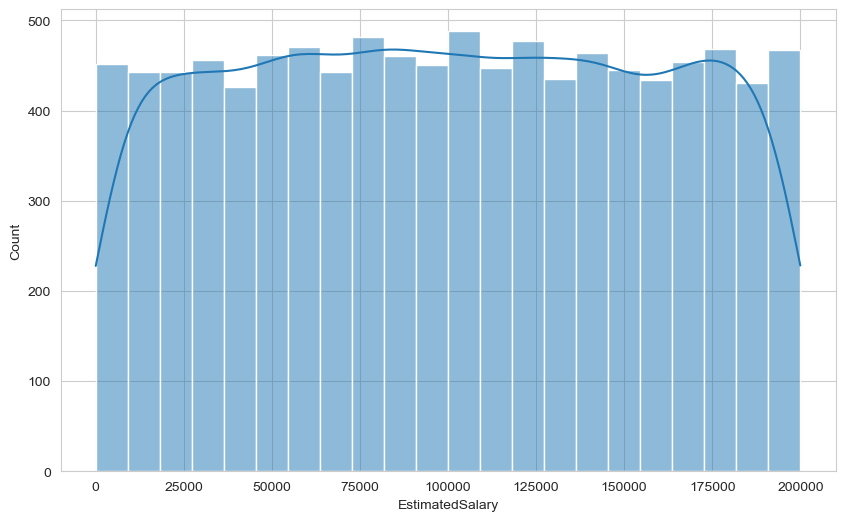

In [59]:
#Seeing the histplot of EstimatedSalary
sns.histplot(df["EstimatedSalary"], kde=True)
plt.show()

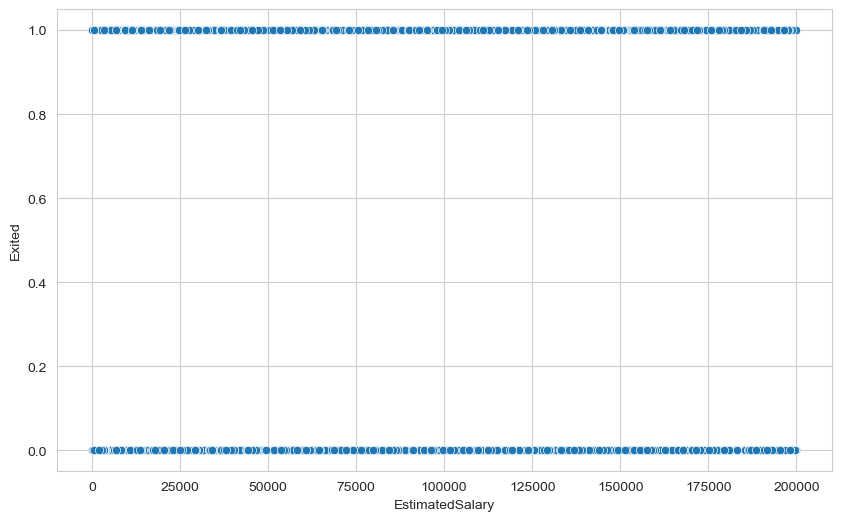

In [60]:
#Seeing the scatterplot of EstimatedSalary with the target
sns.scatterplot(x='EstimatedSalary', y='Exited', data=df)
plt.show()

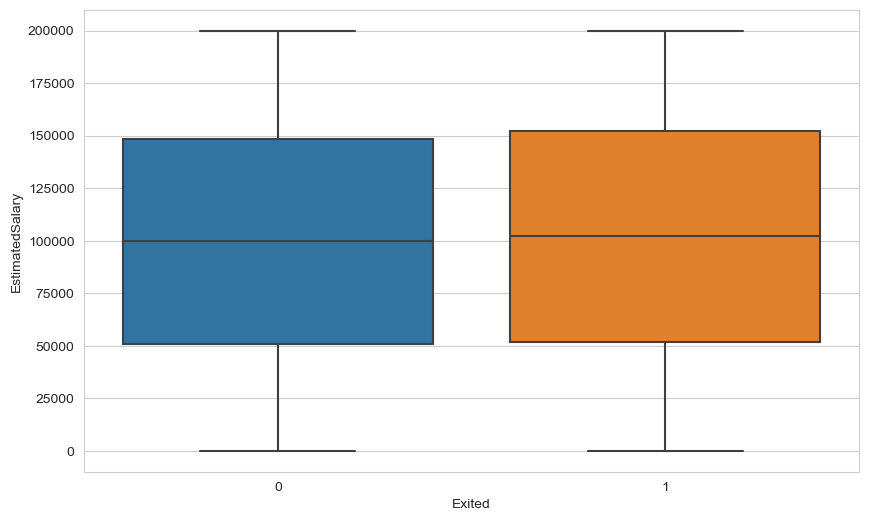

In [61]:
#Seeing the boxplot of the EstimatedSalary with the target
sns.boxplot(x='Exited', y='EstimatedSalary', data=df)
plt.show()

### Exited
#### Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

In [62]:
#Seeing the value counts of Exited
df['Exited'].value_counts()
#From the value counts of Exited, which is our target, we can see that the values of 0 is much bigger than 0, not
#so balanced.

Exited
0    7963
1    2037
Name: count, dtype: int64

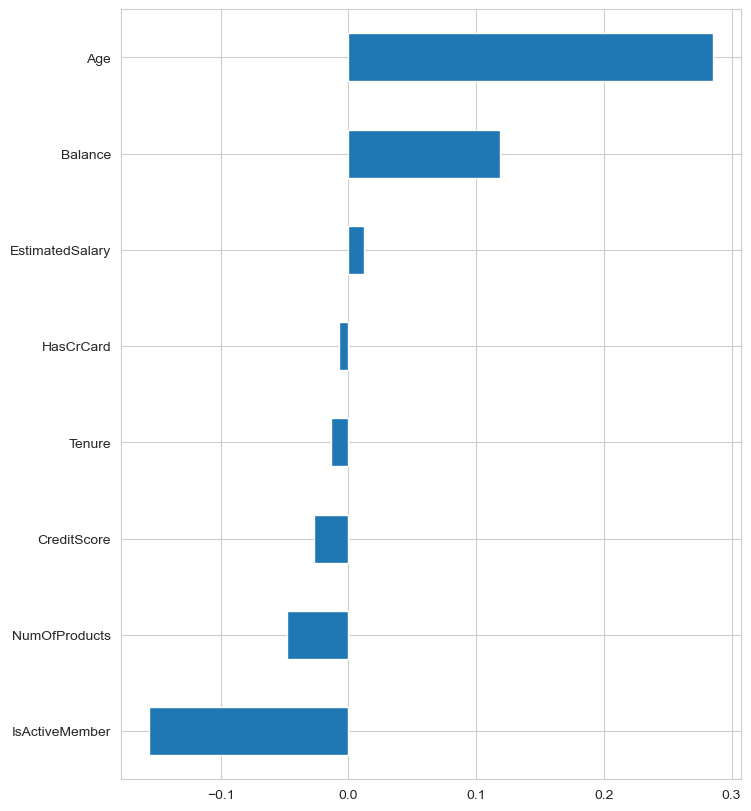

In [63]:
plt.figure(figsize=(8, 10))
df.corr(numeric_only=True)['Exited'].sort_values().drop('Exited').plot(kind='barh')
plt.show()

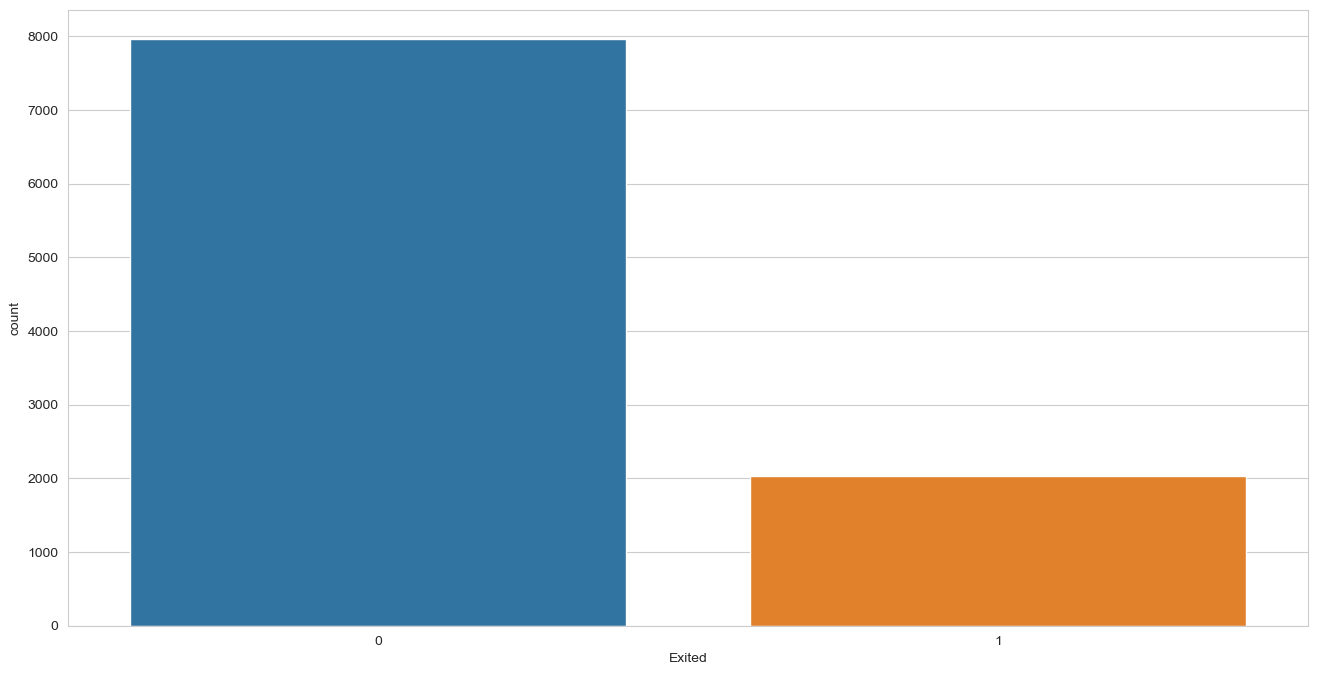

In [64]:
#Seeing the countplot of Exited
plt.figure(figsize=(16, 8))
sns.countplot(x=df['Exited'])
plt.show()
#From the graph we can see that the values of 0 is smaller

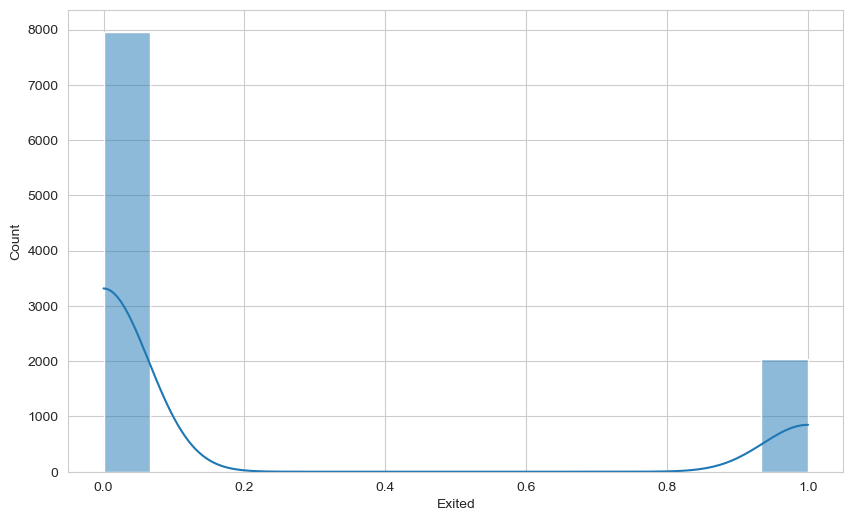

In [65]:
#Seeing the histplot of Exited
sns.histplot(df["Exited"], kde=True)
plt.show()

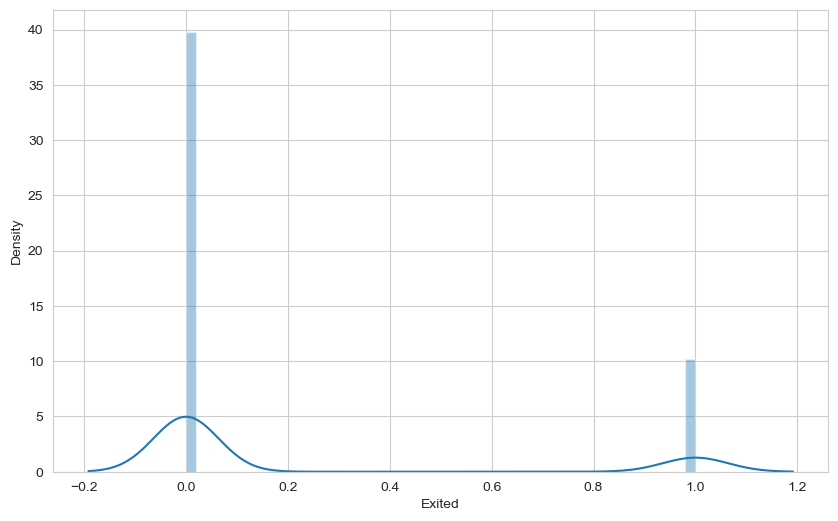

In [66]:
sns.distplot(df["Exited"])
plt.show()

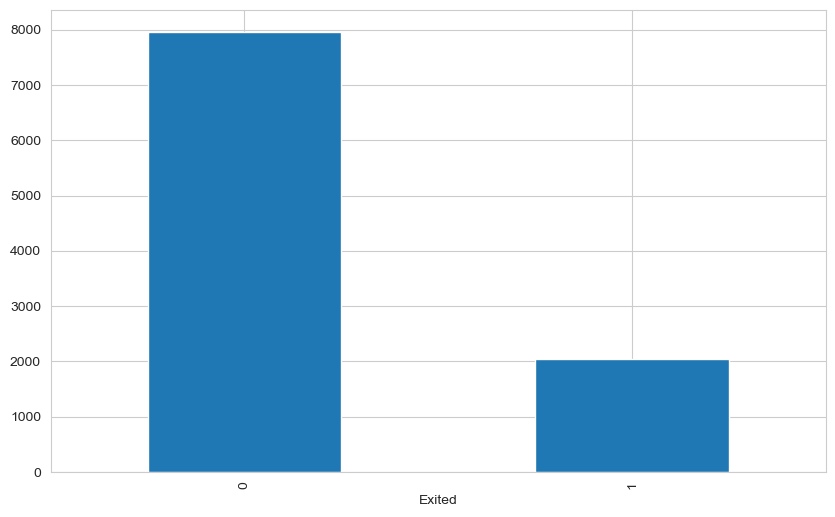

In [67]:
df["Exited"].value_counts().plot(kind="bar")
plt.show()

### Correlation

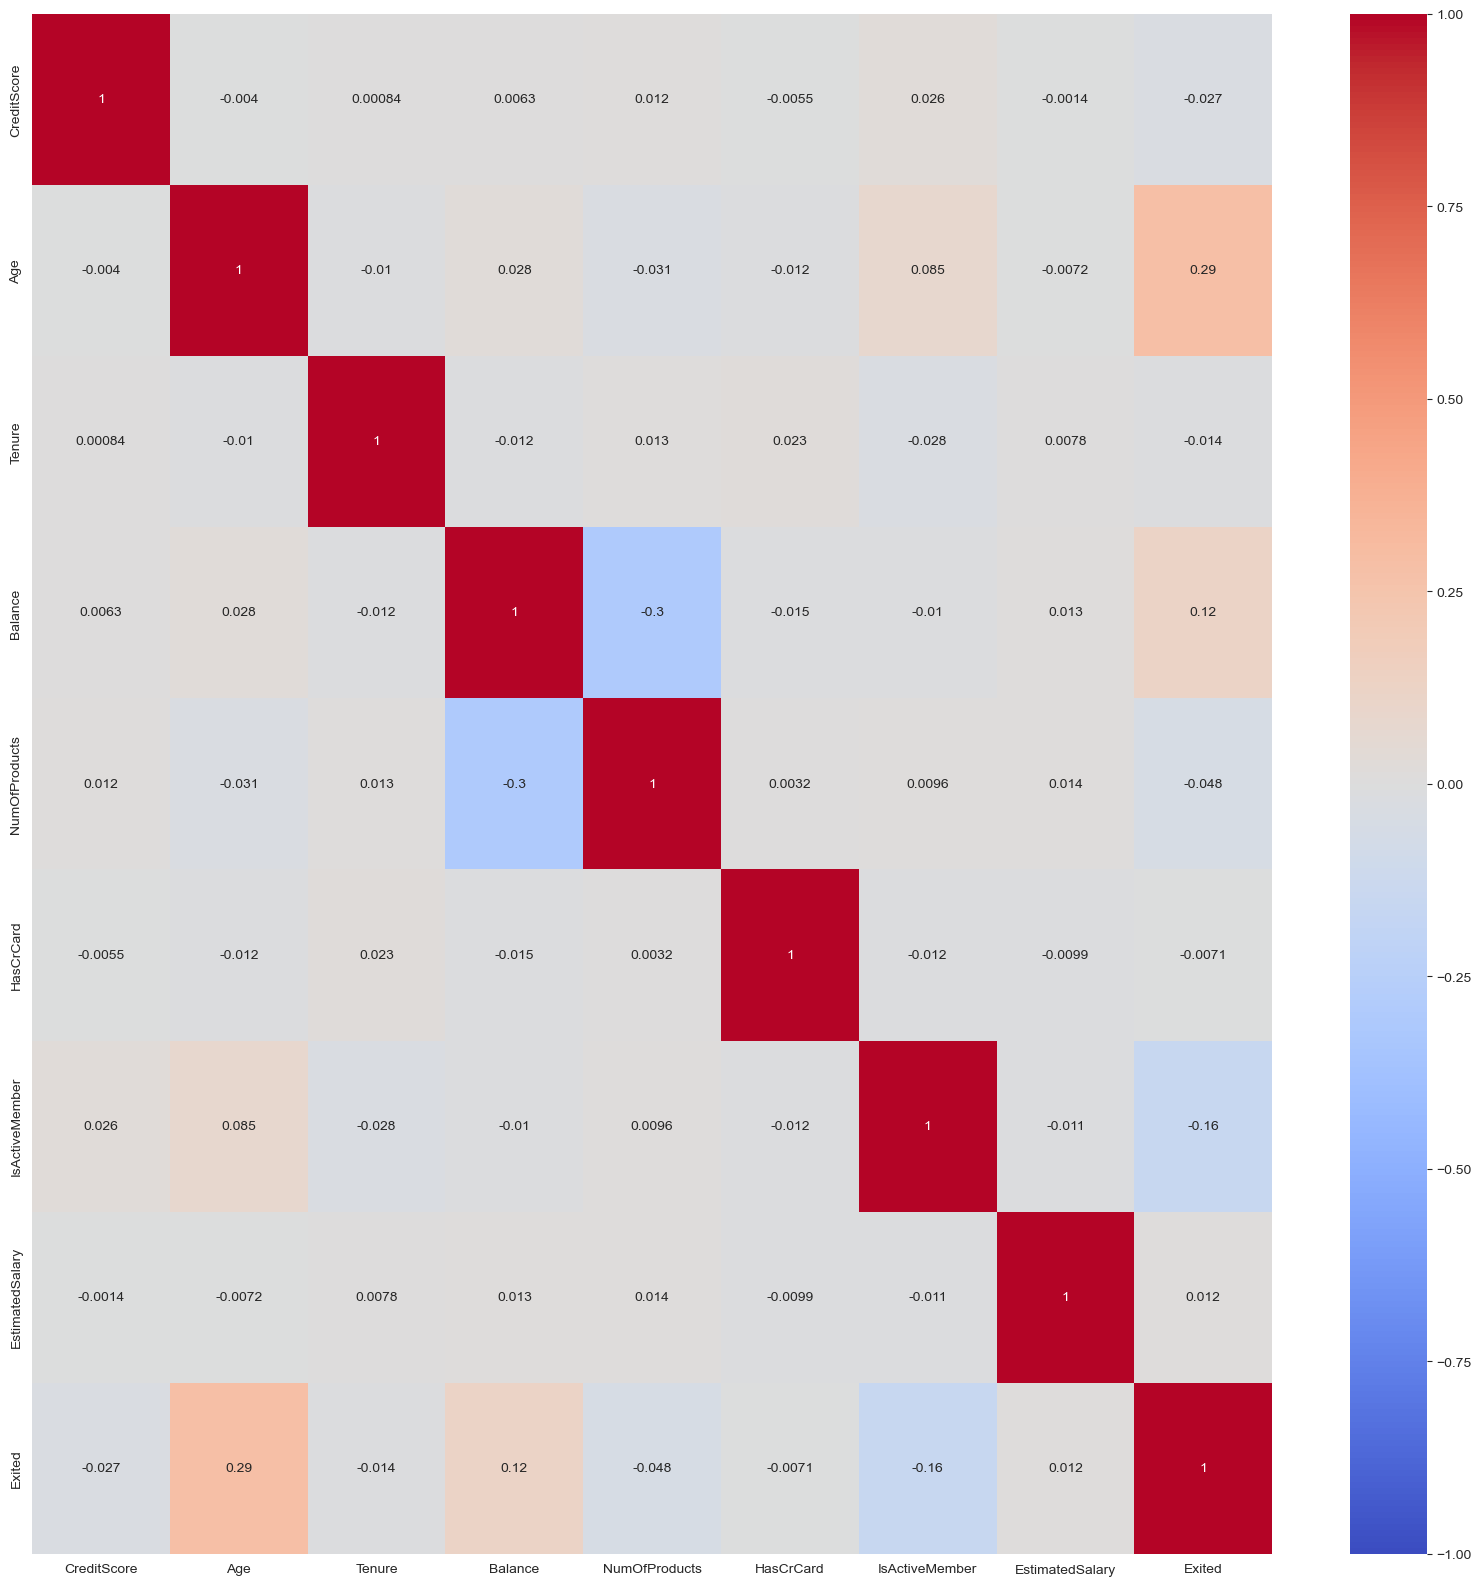

In [68]:
#Seeing if there is any correlation(multicorrelarity), by the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.show()
#from the heatmap, we can say that there is no correclation in the data, which is a good thing

In [69]:
#Checking for correlations
df.corr(numeric_only=True)[(abs(df.corr(numeric_only=True)) >= 0.9) & (abs(df.corr(numeric_only=True)) < 1) & (abs(df.corr(numeric_only=True)) <= -0.9) & (abs(df.corr(numeric_only=True)) > -1)].any().any()

False

### Pairplot for the data

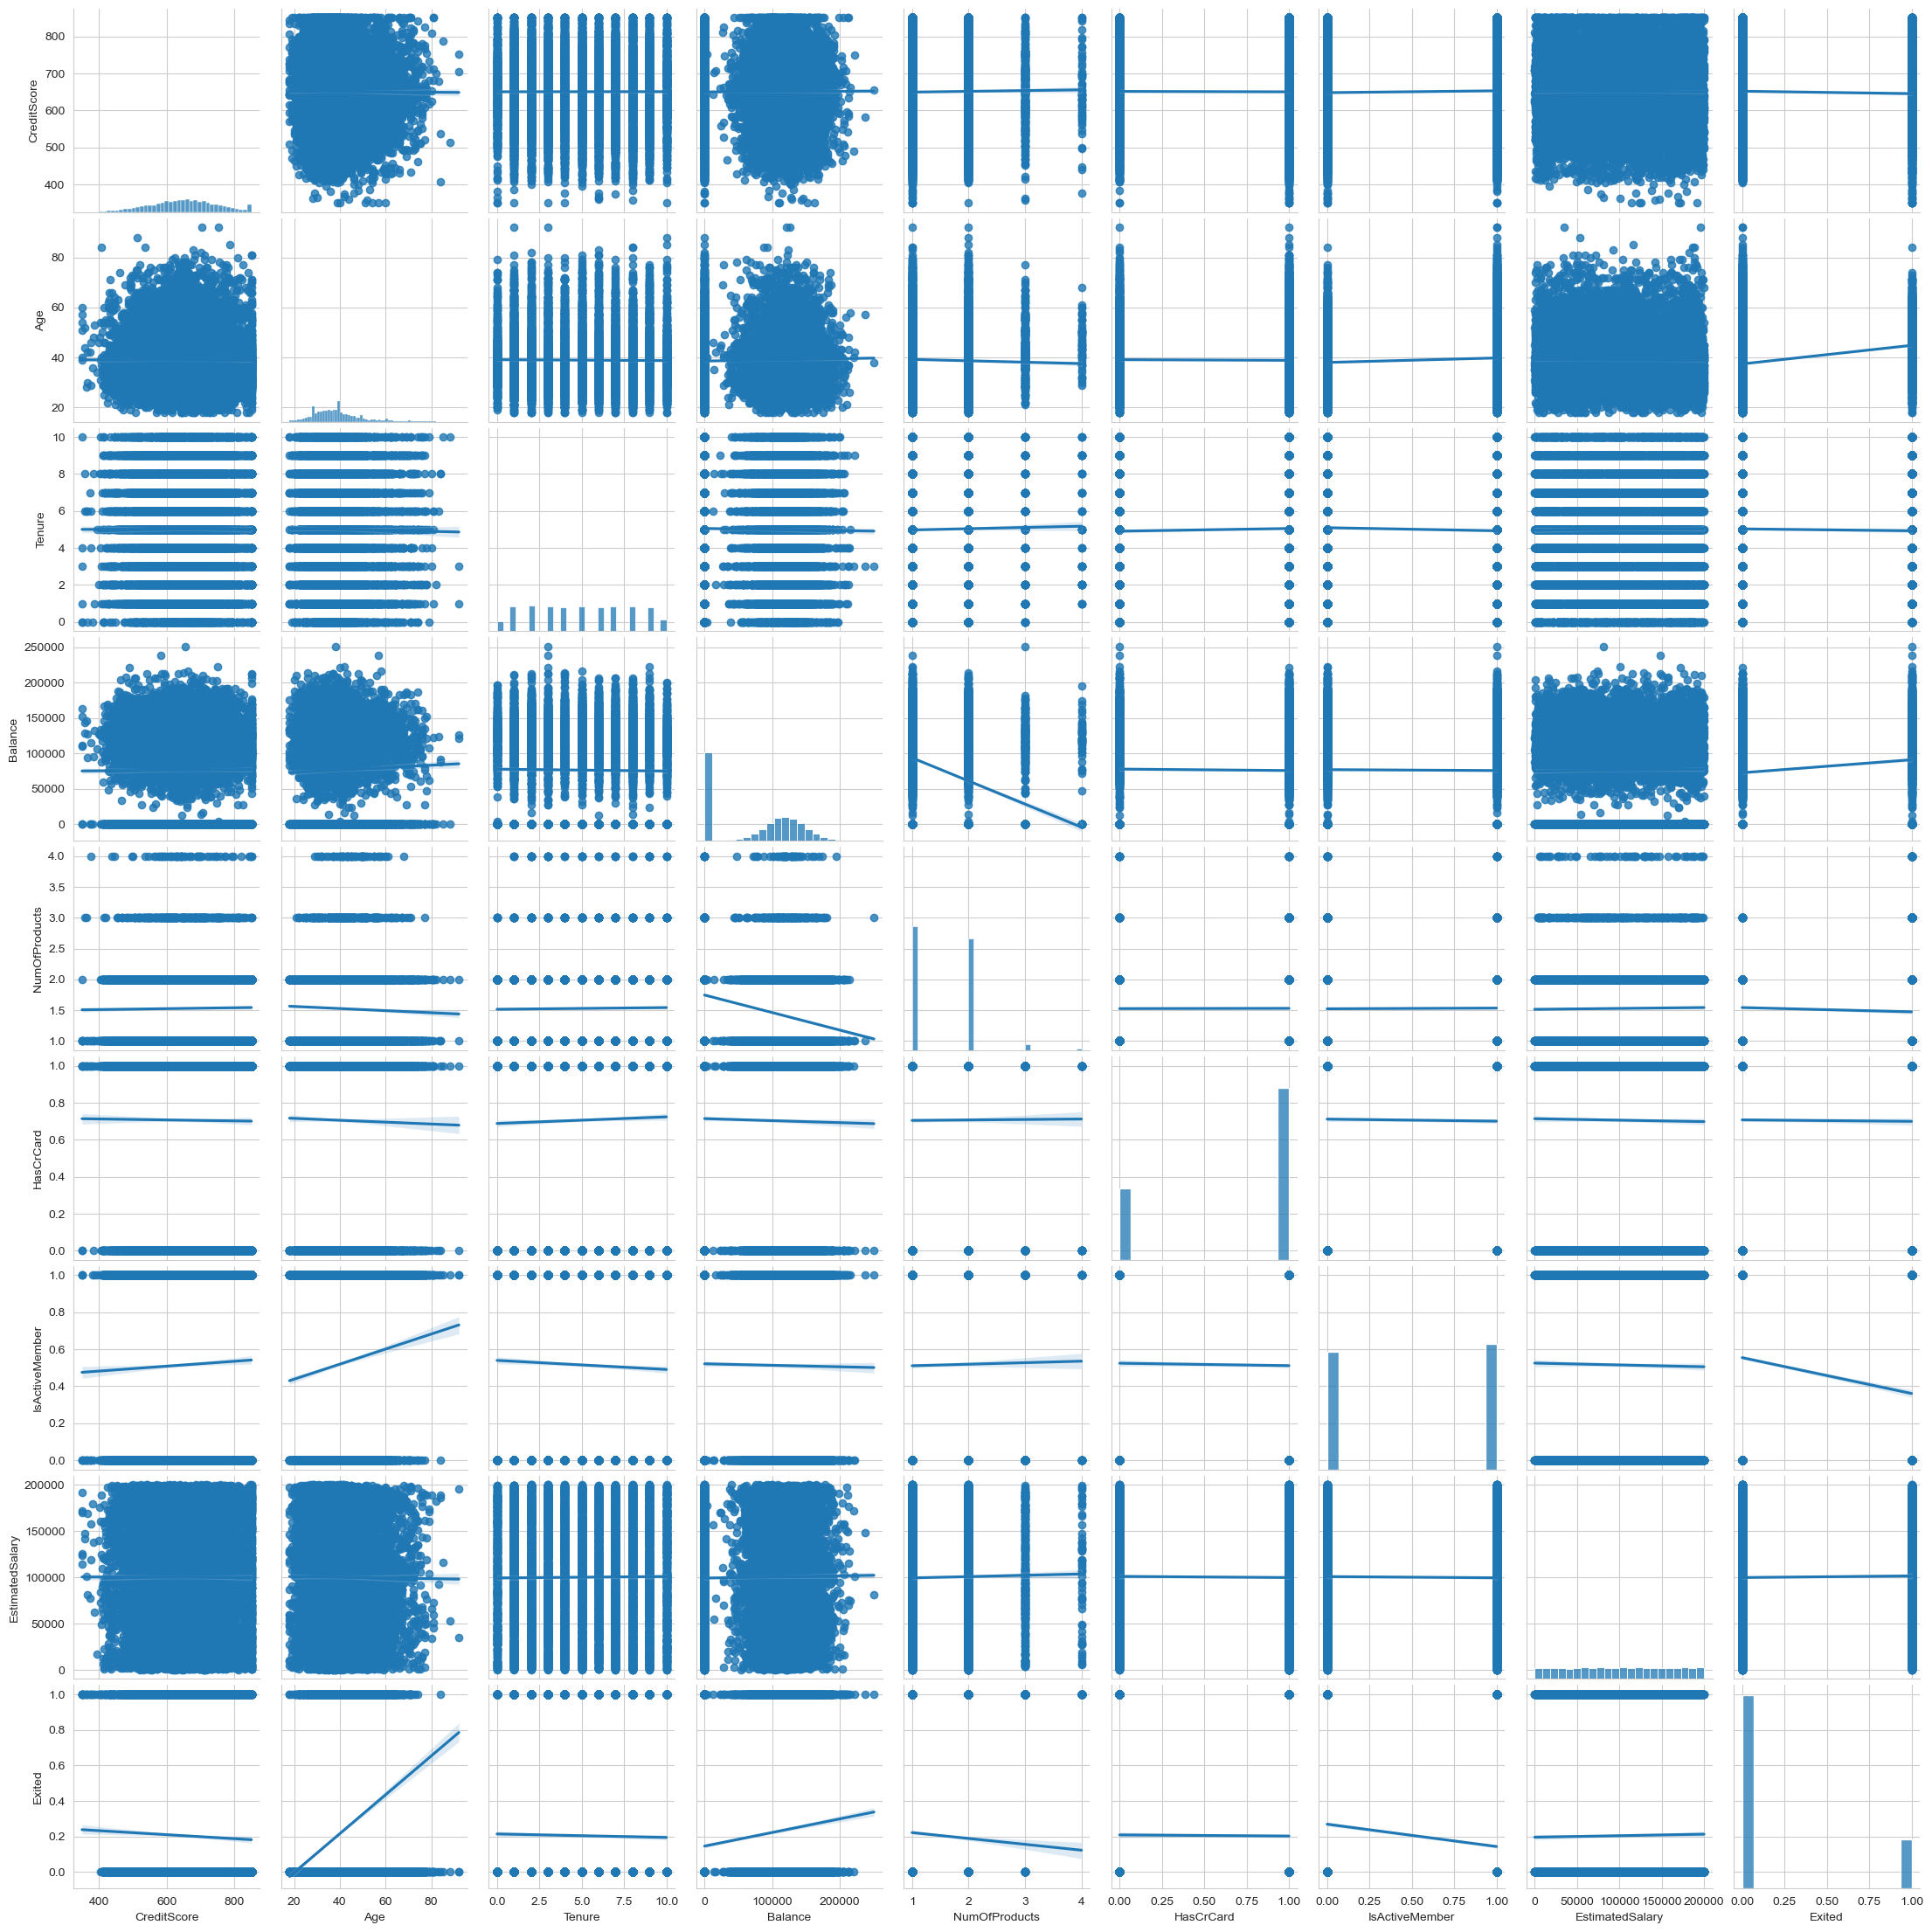

In [70]:
#Now, let's see tha pair plot
sns.pairplot(df, kind="reg")
plt.show()

# Preprocessing of Data
- Train | Test Split, Scalling

In [71]:
#Seeing the object values in the data
df.select_dtypes('O').head()

Geography  Gender
0    France  Female
1     Spain  Female
2    France  Female
3    France  Female
4     Spain  Female

In [74]:
#Seeing the columns of the object values to use it in the next step
df.select_dtypes('O').columns

Index(['Geography', 'Gender'], dtype='object')

In [75]:
#Creating a variable that contains the object values
objs = ['Geography', 'Gender']

#Seeing the object values
objs

['Geography', 'Gender']

In [100]:
#Using the OneHotEncoder on the object values to be able to use them correctly

one_trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", sparse_output=False), objs),
                            remainder=MinMaxScaler(),verbose_feature_names_out=False)

In [101]:
#Creating X and y variables
X = df.drop('Exited', axis=1)

y = df['Exited']

In [102]:
#The head of X
X.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2      0.000              1   
1          608     Spain  Female   41       1  83807.860              1   
2          502    France  Female   42       8 159660.800              3   
3          699    France  Female   39       1      0.000              2   
4          850     Spain  Female   43       2 125510.820              1   

   HasCrCard  IsActiveMember  EstimatedSalary  
0          1               1       101348.880  
1          0               1       112542.580  
2          1               0       113931.570  
3          0               0        93826.630  
4          1               1        79084.100

In [103]:
#Seeing the head of y
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [104]:
#Creating a seed values to use it in the other steps and do not get lost
seed = 101

In [105]:
#Splitting the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.10, random_state=seed)

In [106]:
#Seeing the head of  X_train data
X_train.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
8255          575    France  Female   40       1 139532.340              1   
7259          625     Spain    Male   32       7 106957.280              1   
9112          735    France    Male   73       9      0.000              1   
7666          494    France    Male   25       6      0.000              2   
257           671   Germany  Female   34       6  37266.670              2   

      HasCrCard  IsActiveMember  EstimatedSalary  
8255          1               0       181294.390  
7259          1               1       134794.020  
9112          1               1       114283.330  
7666          0               1       109988.090  
257           0               0       156917.120

In [107]:
#Seeing the shape of X_train after splitting
X_train.shape

(9000, 10)

In [108]:
#Seeing the shape of y_train after splitting
y_train.shape

(9000,)

In [109]:
#Seeing the head of y_train after splitting
y_train.head()

8255    0
7259    0
9112    0
7666    0
257     0
Name: Exited, dtype: int64

In [110]:
#Seeing the shape of X_test after splitting
X_test.shape

(1000, 10)

In [111]:
#Seeing the head of X_test after splitting
X_test.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
4866          522   Germany  Female   37       3  95022.570              1   
3106          554    France  Female   45       6      0.000              2   
7771          850   Germany    Male   29       1 154640.410              1   
9428          737    France  Female   70       9  87542.890              2   
916           475    France    Male   39       6      0.000              1   

      HasCrCard  IsActiveMember  EstimatedSalary  
4866          1               1       129107.590  
3106          1               1       181204.500  
7771          1               1       164039.510  
9428          1               1        42576.860  
916           1               1        56999.900

In [112]:
#Seeing the shape of y_test after splitting
y_test.shape

(1000,)

In [113]:
#Seeing the head of y_test after splitting
y_test.head()

4866    0
3106    0
7771    0
9428    0
916     1
Name: Exited, dtype: int64

In [116]:
#Now, let's take the objects that i have used in OneHotEncoder and assigned
X_train = one_trans.fit_transform(X_train) #In X_train, we use fit_transform
X_test = one_trans.transform(X_test) #In X_test, we use only transform

#Remember, if you miss this part, the scaler will not work, as the object data are not transformed yet.

In [117]:
#Creating a scaler to use it on the data
scaler = MinMaxScaler()

In [118]:
#Using scaler to scaler the X_train and X_test
X_train = scaler.fit_transform(X_train) #In X_train, we use fit_transform
X_test = scaler.transform(X_test) #In X_test, we use only transform

#Now, the data is scaled and we can use it correctly.

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [121]:
#First, setting the random seed
tf.random.set_seed(seed)


#Creating the model with Sequential
model = Sequential()

#Creating the layers
model.add(Dense(36, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(18, activation='relu')) #Hidden layer
model.add(Dense(9, activation='relu')) #Hidden layer
model.add(Dense(1, activation='sigmoid')) #Output layer. Note, we use sigmoid because it is binary

#Compile the layers
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#Note, we are using adam optimzer here as it is the best one. we are using binary_crossentropy in the loss because 
# in classification with binary we use binary_crossentropy. Also, we are using accuracy in the metrics becasue we are 
# working with classification 

In [122]:
#Now, we can fit the data to the model
model.fit(x=X_train, y=y_train, validation_split=0.1, batch_size=32, epochs=1000, verbose=1)

Epoch 1/1000
254/254 [==============================] - 4s 7ms/step - loss: 0.5195 - accuracy: 0.7898 - val_loss: 0.4880 - val_accuracy: 0.7889
Epoch 2/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.4607 - accuracy: 0.8028 - val_loss: 0.4676 - val_accuracy: 0.7911
Epoch 3/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.4397 - accuracy: 0.8135 - val_loss: 0.4444 - val_accuracy: 0.8000
Epoch 4/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.4213 - accuracy: 0.8216 - val_loss: 0.4176 - val_accuracy: 0.8156
Epoch 5/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.4049 - accuracy: 0.8298 - val_loss: 0.3976 - val_accuracy: 0.8233
Epoch 6/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.3768 - accuracy: 0.8443 - val_loss: 0.3720 - val_accuracy: 0.8333
Epoch 7/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.3594 - accuracy: 0.8544 - val_loss: 0.3684 - val_accuracy:

254/254 [==============================] - 1s 5ms/step - loss: 0.3236 - accuracy: 0.8679 - val_loss: 0.3515 - val_accuracy: 0.8456
Epoch 58/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.3215 - accuracy: 0.8685 - val_loss: 0.3555 - val_accuracy: 0.8456
Epoch 59/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.3244 - accuracy: 0.8693 - val_loss: 0.3549 - val_accuracy: 0.8467
Epoch 60/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.3233 - accuracy: 0.8688 - val_loss: 0.3519 - val_accuracy: 0.8533
Epoch 61/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.3220 - accuracy: 0.8691 - val_loss: 0.3521 - val_accuracy: 0.8478
Epoch 62/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.3221 - accuracy: 0.8684 - val_loss: 0.3556 - val_accuracy: 0.8444
Epoch 63/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.3204 - accuracy: 0.8683 - val_loss: 0.3528 - val_accuracy: 0.8467

254/254 [==============================] - 1s 5ms/step - loss: 0.3051 - accuracy: 0.8759 - val_loss: 0.3586 - val_accuracy: 0.8400
Epoch 114/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.3052 - accuracy: 0.8751 - val_loss: 0.3622 - val_accuracy: 0.8556
Epoch 115/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.3042 - accuracy: 0.8767 - val_loss: 0.3586 - val_accuracy: 0.8522
Epoch 116/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.3050 - accuracy: 0.8730 - val_loss: 0.3603 - val_accuracy: 0.8433
Epoch 117/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.3045 - accuracy: 0.8747 - val_loss: 0.3644 - val_accuracy: 0.8433
Epoch 118/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.3055 - accuracy: 0.8733 - val_loss: 0.3682 - val_accuracy: 0.8456
Epoch 119/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.3041 - accuracy: 0.8749 - val_loss: 0.3646 - val_accuracy: 

254/254 [==============================] - 1s 5ms/step - loss: 0.2944 - accuracy: 0.8822 - val_loss: 0.3746 - val_accuracy: 0.8511
Epoch 170/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.2918 - accuracy: 0.8802 - val_loss: 0.3915 - val_accuracy: 0.8356
Epoch 171/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.2919 - accuracy: 0.8800 - val_loss: 0.3771 - val_accuracy: 0.8489
Epoch 172/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.2917 - accuracy: 0.8790 - val_loss: 0.3819 - val_accuracy: 0.8456
Epoch 173/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.2931 - accuracy: 0.8786 - val_loss: 0.3786 - val_accuracy: 0.8400
Epoch 174/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.2917 - accuracy: 0.8822 - val_loss: 0.3883 - val_accuracy: 0.8367
Epoch 175/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.2943 - accuracy: 0.8800 - val_loss: 0.3800 - val_accuracy: 

254/254 [==============================] - 1s 5ms/step - loss: 0.2853 - accuracy: 0.8836 - val_loss: 0.3933 - val_accuracy: 0.8400
Epoch 226/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.2840 - accuracy: 0.8853 - val_loss: 0.3914 - val_accuracy: 0.8456
Epoch 227/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.2835 - accuracy: 0.8864 - val_loss: 0.3959 - val_accuracy: 0.8378
Epoch 228/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.2815 - accuracy: 0.8857 - val_loss: 0.3919 - val_accuracy: 0.8378
Epoch 229/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.2842 - accuracy: 0.8852 - val_loss: 0.3963 - val_accuracy: 0.8444
Epoch 230/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.2823 - accuracy: 0.8872 - val_loss: 0.4093 - val_accuracy: 0.8267
Epoch 231/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.2829 - accuracy: 0.8869 - val_loss: 0.3999 - val_accuracy: 

254/254 [==============================] - 1s 6ms/step - loss: 0.2776 - accuracy: 0.8889 - val_loss: 0.4069 - val_accuracy: 0.8433
Epoch 282/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.2758 - accuracy: 0.8919 - val_loss: 0.4182 - val_accuracy: 0.8311
Epoch 283/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.2753 - accuracy: 0.8901 - val_loss: 0.4139 - val_accuracy: 0.8356
Epoch 284/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.2761 - accuracy: 0.8873 - val_loss: 0.4121 - val_accuracy: 0.8456
Epoch 285/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.2778 - accuracy: 0.8880 - val_loss: 0.4145 - val_accuracy: 0.8322
Epoch 286/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.2746 - accuracy: 0.8880 - val_loss: 0.4045 - val_accuracy: 0.8389
Epoch 287/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.2754 - accuracy: 0.8900 - val_loss: 0.4088 - val_accuracy: 

254/254 [==============================] - 1s 6ms/step - loss: 0.2691 - accuracy: 0.8901 - val_loss: 0.4259 - val_accuracy: 0.8244
Epoch 338/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.2700 - accuracy: 0.8905 - val_loss: 0.4149 - val_accuracy: 0.8389
Epoch 339/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.2692 - accuracy: 0.8931 - val_loss: 0.4191 - val_accuracy: 0.8278
Epoch 340/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.2694 - accuracy: 0.8893 - val_loss: 0.4265 - val_accuracy: 0.8200
Epoch 341/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.2701 - accuracy: 0.8916 - val_loss: 0.4246 - val_accuracy: 0.8322
Epoch 342/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.2690 - accuracy: 0.8922 - val_loss: 0.4413 - val_accuracy: 0.8178
Epoch 343/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.2699 - accuracy: 0.8916 - val_loss: 0.4203 - val_accuracy: 

254/254 [==============================] - 1s 6ms/step - loss: 0.2641 - accuracy: 0.8923 - val_loss: 0.4235 - val_accuracy: 0.8389
Epoch 394/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.2649 - accuracy: 0.8958 - val_loss: 0.4219 - val_accuracy: 0.8367
Epoch 395/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.2617 - accuracy: 0.8946 - val_loss: 0.4260 - val_accuracy: 0.8256
Epoch 396/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.2657 - accuracy: 0.8902 - val_loss: 0.4172 - val_accuracy: 0.8433
Epoch 397/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.2648 - accuracy: 0.8925 - val_loss: 0.4236 - val_accuracy: 0.8244
Epoch 398/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.2626 - accuracy: 0.8931 - val_loss: 0.4393 - val_accuracy: 0.8211
Epoch 399/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.2631 - accuracy: 0.8938 - val_loss: 0.4276 - val_accuracy: 

254/254 [==============================] - 1s 6ms/step - loss: 0.2598 - accuracy: 0.8953 - val_loss: 0.4410 - val_accuracy: 0.8256
Epoch 450/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.2575 - accuracy: 0.8968 - val_loss: 0.4392 - val_accuracy: 0.8289
Epoch 451/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.2592 - accuracy: 0.8969 - val_loss: 0.4290 - val_accuracy: 0.8311
Epoch 452/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.2602 - accuracy: 0.8946 - val_loss: 0.4373 - val_accuracy: 0.8233
Epoch 453/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.2576 - accuracy: 0.8954 - val_loss: 0.4347 - val_accuracy: 0.8322
Epoch 454/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.2601 - accuracy: 0.8958 - val_loss: 0.4277 - val_accuracy: 0.8378
Epoch 455/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.2595 - accuracy: 0.8978 - val_loss: 0.4286 - val_accuracy: 

254/254 [==============================] - 1s 5ms/step - loss: 0.2520 - accuracy: 0.8993 - val_loss: 0.4483 - val_accuracy: 0.8333
Epoch 506/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.2531 - accuracy: 0.8998 - val_loss: 0.4569 - val_accuracy: 0.8322
Epoch 507/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.2526 - accuracy: 0.8968 - val_loss: 0.4449 - val_accuracy: 0.8244
Epoch 508/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.2531 - accuracy: 0.8973 - val_loss: 0.4513 - val_accuracy: 0.8311
Epoch 509/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.2503 - accuracy: 0.8990 - val_loss: 0.4409 - val_accuracy: 0.8311
Epoch 510/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.2543 - accuracy: 0.8980 - val_loss: 0.4410 - val_accuracy: 0.8389
Epoch 511/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.2541 - accuracy: 0.8984 - val_loss: 0.4526 - val_accuracy: 

254/254 [==============================] - 2s 6ms/step - loss: 0.2489 - accuracy: 0.8977 - val_loss: 0.4573 - val_accuracy: 0.8256
Epoch 562/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.2498 - accuracy: 0.9006 - val_loss: 0.4497 - val_accuracy: 0.8189
Epoch 563/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.2501 - accuracy: 0.8981 - val_loss: 0.4592 - val_accuracy: 0.8278
Epoch 564/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.2487 - accuracy: 0.9001 - val_loss: 0.4647 - val_accuracy: 0.8244
Epoch 565/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.2475 - accuracy: 0.9010 - val_loss: 0.4672 - val_accuracy: 0.8200
Epoch 566/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.2481 - accuracy: 0.9007 - val_loss: 0.4749 - val_accuracy: 0.8300
Epoch 567/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.2473 - accuracy: 0.9016 - val_loss: 0.4862 - val_accuracy: 

254/254 [==============================] - 2s 6ms/step - loss: 0.2431 - accuracy: 0.9019 - val_loss: 0.4666 - val_accuracy: 0.8244
Epoch 618/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.2458 - accuracy: 0.8981 - val_loss: 0.4688 - val_accuracy: 0.8278
Epoch 619/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.2502 - accuracy: 0.8983 - val_loss: 0.5011 - val_accuracy: 0.8144
Epoch 620/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.2493 - accuracy: 0.8983 - val_loss: 0.4748 - val_accuracy: 0.8211
Epoch 621/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.2442 - accuracy: 0.9022 - val_loss: 0.4796 - val_accuracy: 0.8311
Epoch 622/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.2439 - accuracy: 0.9023 - val_loss: 0.4686 - val_accuracy: 0.8211
Epoch 623/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.2458 - accuracy: 0.9005 - val_loss: 0.4744 - val_accuracy: 

254/254 [==============================] - 2s 6ms/step - loss: 0.2417 - accuracy: 0.9053 - val_loss: 0.5035 - val_accuracy: 0.8189
Epoch 674/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.2413 - accuracy: 0.9031 - val_loss: 0.5028 - val_accuracy: 0.8133
Epoch 675/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.2404 - accuracy: 0.9019 - val_loss: 0.4955 - val_accuracy: 0.8300
Epoch 676/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.2443 - accuracy: 0.9035 - val_loss: 0.5013 - val_accuracy: 0.8222
Epoch 677/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.2430 - accuracy: 0.8990 - val_loss: 0.4845 - val_accuracy: 0.8267
Epoch 678/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.2409 - accuracy: 0.9043 - val_loss: 0.4956 - val_accuracy: 0.8233
Epoch 679/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.2418 - accuracy: 0.9041 - val_loss: 0.4953 - val_accuracy: 

254/254 [==============================] - 1s 6ms/step - loss: 0.2380 - accuracy: 0.9051 - val_loss: 0.5333 - val_accuracy: 0.8178
Epoch 730/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.2383 - accuracy: 0.9070 - val_loss: 0.5003 - val_accuracy: 0.8133
Epoch 731/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.2371 - accuracy: 0.9065 - val_loss: 0.5142 - val_accuracy: 0.8278
Epoch 732/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.2380 - accuracy: 0.9038 - val_loss: 0.5357 - val_accuracy: 0.8233
Epoch 733/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.2404 - accuracy: 0.9048 - val_loss: 0.5190 - val_accuracy: 0.8122
Epoch 734/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.2382 - accuracy: 0.9040 - val_loss: 0.5213 - val_accuracy: 0.8222
Epoch 735/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.2406 - accuracy: 0.9042 - val_loss: 0.5157 - val_accuracy: 

254/254 [==============================] - 2s 6ms/step - loss: 0.2379 - accuracy: 0.9052 - val_loss: 0.5248 - val_accuracy: 0.8133
Epoch 786/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.2361 - accuracy: 0.9049 - val_loss: 0.5236 - val_accuracy: 0.8156
Epoch 787/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.2360 - accuracy: 0.9060 - val_loss: 0.5259 - val_accuracy: 0.8178
Epoch 788/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.2340 - accuracy: 0.9067 - val_loss: 0.5130 - val_accuracy: 0.8211
Epoch 789/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.2353 - accuracy: 0.9056 - val_loss: 0.5169 - val_accuracy: 0.8178
Epoch 790/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.2365 - accuracy: 0.9064 - val_loss: 0.5184 - val_accuracy: 0.8167
Epoch 791/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.2362 - accuracy: 0.9064 - val_loss: 0.5164 - val_accuracy: 

254/254 [==============================] - 1s 6ms/step - loss: 0.2338 - accuracy: 0.9049 - val_loss: 0.5279 - val_accuracy: 0.8167
Epoch 842/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.2354 - accuracy: 0.9049 - val_loss: 0.5367 - val_accuracy: 0.8144
Epoch 843/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.2320 - accuracy: 0.9080 - val_loss: 0.5405 - val_accuracy: 0.8256
Epoch 844/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.2320 - accuracy: 0.9072 - val_loss: 0.5176 - val_accuracy: 0.8189
Epoch 845/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.2331 - accuracy: 0.9075 - val_loss: 0.5426 - val_accuracy: 0.8144
Epoch 846/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.2355 - accuracy: 0.9025 - val_loss: 0.5451 - val_accuracy: 0.8156
Epoch 847/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.2331 - accuracy: 0.9046 - val_loss: 0.5208 - val_accuracy: 

254/254 [==============================] - 2s 6ms/step - loss: 0.2281 - accuracy: 0.9093 - val_loss: 0.5383 - val_accuracy: 0.8256
Epoch 898/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.2321 - accuracy: 0.9060 - val_loss: 0.5369 - val_accuracy: 0.8211
Epoch 899/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.2313 - accuracy: 0.9078 - val_loss: 0.5399 - val_accuracy: 0.8256
Epoch 900/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.2310 - accuracy: 0.9064 - val_loss: 0.5543 - val_accuracy: 0.8244
Epoch 901/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.2294 - accuracy: 0.9083 - val_loss: 0.5406 - val_accuracy: 0.8256
Epoch 902/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.2312 - accuracy: 0.9075 - val_loss: 0.5384 - val_accuracy: 0.8289
Epoch 903/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.2292 - accuracy: 0.9074 - val_loss: 0.5533 - val_accuracy: 

254/254 [==============================] - 1s 6ms/step - loss: 0.2279 - accuracy: 0.9084 - val_loss: 0.5501 - val_accuracy: 0.8178
Epoch 954/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.2302 - accuracy: 0.9080 - val_loss: 0.5488 - val_accuracy: 0.8200
Epoch 955/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.2270 - accuracy: 0.9079 - val_loss: 0.5650 - val_accuracy: 0.8211
Epoch 956/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.2270 - accuracy: 0.9081 - val_loss: 0.5529 - val_accuracy: 0.8289
Epoch 957/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.2309 - accuracy: 0.9079 - val_loss: 0.5578 - val_accuracy: 0.8256
Epoch 958/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.2289 - accuracy: 0.9101 - val_loss: 0.5351 - val_accuracy: 0.8211
Epoch 959/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.2262 - accuracy: 0.9086 - val_loss: 0.5697 - val_accuracy: 

In [123]:
#Let's see the summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 36)                504       
                                                                 
 dense_5 (Dense)             (None, 18)                666       
                                                                 
 dense_6 (Dense)             (None, 9)                 171       
                                                                 
 dense_7 (Dense)             (None, 1)                 10        
                                                                 
Total params: 1351 (5.28 KB)
Trainable params: 1351 (5.28 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [124]:
#Let's see the history of the model
model.history.history

{'loss': [0.5195485949516296,
  0.4606628119945526,
  0.43973758816719055,
  0.4213372468948364,
  0.4049317240715027,
  0.37680190801620483,
  0.35939130187034607,
  0.3527350127696991,
  0.35069823265075684,
  0.34896552562713623,
  0.3462146818637848,
  0.3455468416213989,
  0.34315937757492065,
  0.3427199125289917,
  0.34135714173316956,
  0.3394654393196106,
  0.340658962726593,
  0.3401311933994293,
  0.33777862787246704,
  0.3370724618434906,
  0.3376831114292145,
  0.33748897910118103,
  0.33560749888420105,
  0.33698907494544983,
  0.3363783359527588,
  0.33574333786964417,
  0.33463677763938904,
  0.3348756432533264,
  0.3345033824443817,
  0.334027498960495,
  0.33336111903190613,
  0.3321813642978668,
  0.33255642652511597,
  0.3336668610572815,
  0.333133727312088,
  0.3306456208229065,
  0.3307414948940277,
  0.3306959569454193,
  0.3328343331813812,
  0.3301084041595459,
  0.330518513917923,
  0.3298616409301758,
  0.3279874920845032,
  0.3295170068740845,
  0.326965153

In [125]:
#Creating a dataframe from the history of the model to be able to plot it
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

loss  accuracy  val_loss  val_accuracy
0 0.520     0.790     0.488         0.789
1 0.461     0.803     0.468         0.791
2 0.440     0.813     0.444         0.800
3 0.421     0.822     0.418         0.816
4 0.405     0.830     0.398         0.823

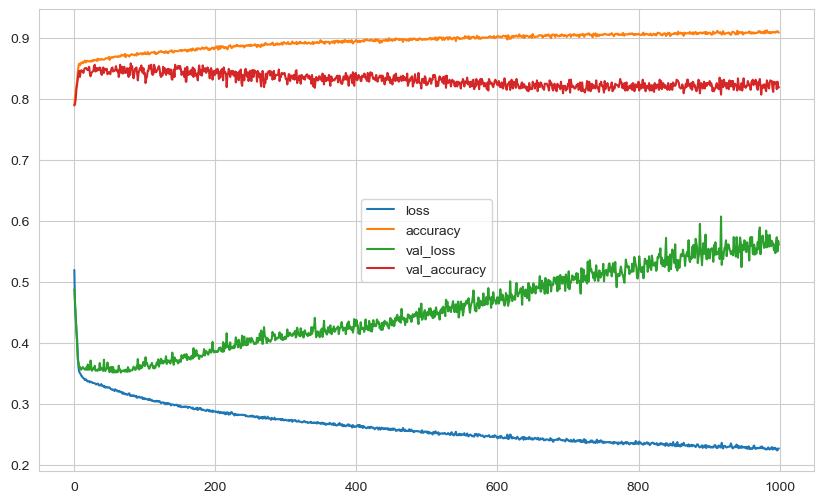

In [126]:
#Plotting the history
loss_df.plot()
plt.show()

In [127]:
#Seeing the evaluation of the model
model.evaluate(X_test, y_test, verbose=0)

[0.6128543615341187, 0.8100000023841858]

In [128]:
#Seeing the loss and the accuracy of the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.6128543615341187
accuracy:  0.8100000023841858


In [129]:
#Making y_pred 
y_pred = model.predict(X_test) > 0.5

#Printing the confusion matrix of the test data
print(confusion_matrix(y_test, y_pred))

#Printing the classification report of the test data
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[731  65]
 [125  79]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       796
           1       0.55      0.39      0.45       204

    accuracy                           0.81      1000
   macro avg       0.70      0.65      0.67      1000
weighted avg       0.79      0.81      0.80      1000



32/32 [==============================] - 0s 1ms/step


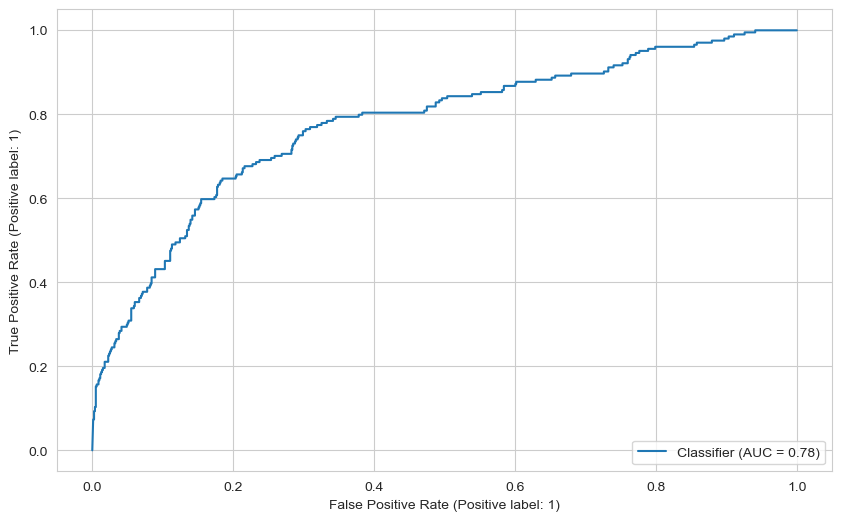

In [130]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [131]:
roc_auc_score(y_test, y_pred_proba)

0.7774164942358853

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

###### I have searched in Bing to find out about class_weight.
###### I wrote compute_class_weight  in  Neural Network, then find an example about it and use it in my data

### Create The Model

In [136]:
classes = np.unique(y_train) # Get unique classes
class_weights = compute_class_weight('balanced', classes=classes, y=y_train) # Compute weights

#The class weights values 
class_weights
# class_weights = dict(zip(classes, class_weights)) # Convert to dictionary

array([0.62787777, 2.45499182])

In [137]:
#Converting the array to dictionary with numpy
#We can use dict(enumerate()), to convert it to a dictionary
class_weights = dict(enumerate(class_weights))

#Printing it after converting
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [140]:
#First, setting the random seed
tf.random.set_seed(seed)


#Creating the weighted model with Sequential
weighted_model = Sequential()

#Creating the layers
weighted_model.add(Dense(36, activation='relu', input_dim=X_train.shape[1]))
weighted_model.add(Dense(18, activation='relu')) #Hidden layer
weighted_model.add(Dense(9, activation='relu')) #Hidden layer
weighted_model.add(Dense(1, activation='sigmoid')) #Output layer. Note, we use sigmoid because it is binary

#Compile the layers
weighted_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#Note, we are using adam optimzer here as it is the best one. we are using binary_crossentropy in the loss because 
# in classification with binary we use binary_crossentropy. Also, we are using accuracy in the metrics becasue we are 
# working with classification 

In [141]:
#Fitting the model, and using the class_weight with it this time
weighted_model.fit(x=X_train, y=y_train, validation_split=0.1, batch_size=32, epochs=1000, verbose=1, class_weight=class_weights)

Epoch 1/1000
254/254 [==============================] - 2s 3ms/step - loss: 0.6560 - accuracy: 0.6573 - val_loss: 0.6160 - val_accuracy: 0.7033
Epoch 2/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.5962 - accuracy: 0.6980 - val_loss: 0.5359 - val_accuracy: 0.7478
Epoch 3/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.5705 - accuracy: 0.7201 - val_loss: 0.5150 - val_accuracy: 0.7500
Epoch 4/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.5442 - accuracy: 0.7362 - val_loss: 0.5047 - val_accuracy: 0.7456
Epoch 5/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.5169 - accuracy: 0.7551 - val_loss: 0.5074 - val_accuracy: 0.7589
Epoch 6/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4915 - accuracy: 0.7696 - val_loss: 0.5015 - val_accuracy: 0.7522
Epoch 7/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4841 - accuracy: 0.7720 - val_loss: 0.4905 - val_accuracy:

254/254 [==============================] - 1s 2ms/step - loss: 0.4352 - accuracy: 0.8094 - val_loss: 0.4931 - val_accuracy: 0.7611
Epoch 58/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4349 - accuracy: 0.8031 - val_loss: 0.4776 - val_accuracy: 0.7800
Epoch 59/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4356 - accuracy: 0.8038 - val_loss: 0.4753 - val_accuracy: 0.7800
Epoch 60/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4317 - accuracy: 0.8037 - val_loss: 0.4246 - val_accuracy: 0.8111
Epoch 61/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4340 - accuracy: 0.8069 - val_loss: 0.4435 - val_accuracy: 0.7944
Epoch 62/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4325 - accuracy: 0.8070 - val_loss: 0.4206 - val_accuracy: 0.8044
Epoch 63/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4319 - accuracy: 0.8052 - val_loss: 0.4511 - val_accuracy: 0.7944

254/254 [==============================] - 1s 3ms/step - loss: 0.4089 - accuracy: 0.8195 - val_loss: 0.4762 - val_accuracy: 0.7678
Epoch 114/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4076 - accuracy: 0.8163 - val_loss: 0.4528 - val_accuracy: 0.7867
Epoch 115/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4066 - accuracy: 0.8167 - val_loss: 0.4612 - val_accuracy: 0.7789
Epoch 116/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4084 - accuracy: 0.8138 - val_loss: 0.4539 - val_accuracy: 0.7833
Epoch 117/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4073 - accuracy: 0.8179 - val_loss: 0.4588 - val_accuracy: 0.7767
Epoch 118/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4089 - accuracy: 0.8164 - val_loss: 0.4759 - val_accuracy: 0.7689
Epoch 119/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4058 - accuracy: 0.8185 - val_loss: 0.4437 - val_accuracy: 

254/254 [==============================] - 1s 2ms/step - loss: 0.3890 - accuracy: 0.8253 - val_loss: 0.4520 - val_accuracy: 0.7933
Epoch 170/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3875 - accuracy: 0.8285 - val_loss: 0.4828 - val_accuracy: 0.7689
Epoch 171/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3861 - accuracy: 0.8242 - val_loss: 0.4264 - val_accuracy: 0.8000
Epoch 172/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3890 - accuracy: 0.8254 - val_loss: 0.4549 - val_accuracy: 0.7922
Epoch 173/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3865 - accuracy: 0.8257 - val_loss: 0.4710 - val_accuracy: 0.7756
Epoch 174/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3875 - accuracy: 0.8290 - val_loss: 0.4832 - val_accuracy: 0.7800
Epoch 175/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3854 - accuracy: 0.8257 - val_loss: 0.4833 - val_accuracy: 

254/254 [==============================] - 1s 3ms/step - loss: 0.3723 - accuracy: 0.8327 - val_loss: 0.4520 - val_accuracy: 0.8011
Epoch 226/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3728 - accuracy: 0.8343 - val_loss: 0.4445 - val_accuracy: 0.8022
Epoch 227/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.3722 - accuracy: 0.8349 - val_loss: 0.4863 - val_accuracy: 0.7789
Epoch 228/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.3692 - accuracy: 0.8360 - val_loss: 0.4538 - val_accuracy: 0.7933
Epoch 229/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.3736 - accuracy: 0.8293 - val_loss: 0.4658 - val_accuracy: 0.8056
Epoch 230/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.3706 - accuracy: 0.8368 - val_loss: 0.4999 - val_accuracy: 0.7789
Epoch 231/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.3713 - accuracy: 0.8340 - val_loss: 0.4814 - val_accuracy: 

254/254 [==============================] - 1s 2ms/step - loss: 0.3590 - accuracy: 0.8389 - val_loss: 0.4659 - val_accuracy: 0.8044
Epoch 282/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.3585 - accuracy: 0.8388 - val_loss: 0.4778 - val_accuracy: 0.7978
Epoch 283/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.3571 - accuracy: 0.8384 - val_loss: 0.4625 - val_accuracy: 0.8011
Epoch 284/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.3572 - accuracy: 0.8375 - val_loss: 0.4309 - val_accuracy: 0.8244
Epoch 285/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.3607 - accuracy: 0.8393 - val_loss: 0.4952 - val_accuracy: 0.7822
Epoch 286/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.3595 - accuracy: 0.8364 - val_loss: 0.4567 - val_accuracy: 0.8044
Epoch 287/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.3599 - accuracy: 0.8333 - val_loss: 0.4588 - val_accuracy: 

254/254 [==============================] - 1s 2ms/step - loss: 0.3484 - accuracy: 0.8414 - val_loss: 0.5427 - val_accuracy: 0.7667
Epoch 338/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3461 - accuracy: 0.8398 - val_loss: 0.4626 - val_accuracy: 0.8033
Epoch 339/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3521 - accuracy: 0.8407 - val_loss: 0.4621 - val_accuracy: 0.8056
Epoch 340/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.3461 - accuracy: 0.8419 - val_loss: 0.5722 - val_accuracy: 0.7500
Epoch 341/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.3446 - accuracy: 0.8380 - val_loss: 0.5089 - val_accuracy: 0.7811
Epoch 342/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.3468 - accuracy: 0.8420 - val_loss: 0.5954 - val_accuracy: 0.7322
Epoch 343/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.3515 - accuracy: 0.8399 - val_loss: 0.4865 - val_accuracy: 

254/254 [==============================] - 1s 3ms/step - loss: 0.3397 - accuracy: 0.8465 - val_loss: 0.5026 - val_accuracy: 0.7967
Epoch 394/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3384 - accuracy: 0.8472 - val_loss: 0.5156 - val_accuracy: 0.7911
Epoch 395/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.3368 - accuracy: 0.8500 - val_loss: 0.5016 - val_accuracy: 0.7900
Epoch 396/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.3403 - accuracy: 0.8444 - val_loss: 0.5013 - val_accuracy: 0.7922
Epoch 397/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3376 - accuracy: 0.8441 - val_loss: 0.4989 - val_accuracy: 0.7889
Epoch 398/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3372 - accuracy: 0.8464 - val_loss: 0.6395 - val_accuracy: 0.7244
Epoch 399/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3364 - accuracy: 0.8454 - val_loss: 0.4802 - val_accuracy: 

254/254 [==============================] - 0s 2ms/step - loss: 0.3360 - accuracy: 0.8449 - val_loss: 0.5582 - val_accuracy: 0.7744
Epoch 450/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3325 - accuracy: 0.8462 - val_loss: 0.5397 - val_accuracy: 0.7800
Epoch 451/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3346 - accuracy: 0.8454 - val_loss: 0.5188 - val_accuracy: 0.7856
Epoch 452/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.3314 - accuracy: 0.8475 - val_loss: 0.4977 - val_accuracy: 0.8000
Epoch 453/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.3290 - accuracy: 0.8498 - val_loss: 0.4903 - val_accuracy: 0.8111
Epoch 454/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3292 - accuracy: 0.8470 - val_loss: 0.4810 - val_accuracy: 0.8044
Epoch 455/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3271 - accuracy: 0.8517 - val_loss: 0.5042 - val_accuracy: 

254/254 [==============================] - 1s 2ms/step - loss: 0.3244 - accuracy: 0.8540 - val_loss: 0.4766 - val_accuracy: 0.8100
Epoch 506/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3197 - accuracy: 0.8565 - val_loss: 0.5721 - val_accuracy: 0.7678
Epoch 507/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3197 - accuracy: 0.8515 - val_loss: 0.4903 - val_accuracy: 0.8111
Epoch 508/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3215 - accuracy: 0.8538 - val_loss: 0.4936 - val_accuracy: 0.8089
Epoch 509/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.3192 - accuracy: 0.8527 - val_loss: 0.5298 - val_accuracy: 0.7856
Epoch 510/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3217 - accuracy: 0.8556 - val_loss: 0.5024 - val_accuracy: 0.8044
Epoch 511/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3215 - accuracy: 0.8541 - val_loss: 0.5579 - val_accuracy: 

254/254 [==============================] - 1s 3ms/step - loss: 0.3130 - accuracy: 0.8551 - val_loss: 0.5976 - val_accuracy: 0.7633
Epoch 562/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.3136 - accuracy: 0.8573 - val_loss: 0.5077 - val_accuracy: 0.7889
Epoch 563/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3129 - accuracy: 0.8540 - val_loss: 0.5352 - val_accuracy: 0.7956
Epoch 564/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3165 - accuracy: 0.8568 - val_loss: 0.6205 - val_accuracy: 0.7522
Epoch 565/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.3124 - accuracy: 0.8574 - val_loss: 0.5552 - val_accuracy: 0.7822
Epoch 566/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.3088 - accuracy: 0.8580 - val_loss: 0.5029 - val_accuracy: 0.8100
Epoch 567/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3154 - accuracy: 0.8560 - val_loss: 0.5413 - val_accuracy: 

254/254 [==============================] - 1s 2ms/step - loss: 0.3048 - accuracy: 0.8605 - val_loss: 0.6120 - val_accuracy: 0.7478
Epoch 618/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3070 - accuracy: 0.8612 - val_loss: 0.5195 - val_accuracy: 0.8067
Epoch 619/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.3127 - accuracy: 0.8567 - val_loss: 0.6887 - val_accuracy: 0.7189
Epoch 620/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3076 - accuracy: 0.8596 - val_loss: 0.5728 - val_accuracy: 0.7689
Epoch 621/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3078 - accuracy: 0.8581 - val_loss: 0.5354 - val_accuracy: 0.7778
Epoch 622/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3009 - accuracy: 0.8651 - val_loss: 0.5570 - val_accuracy: 0.7856
Epoch 623/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3058 - accuracy: 0.8596 - val_loss: 0.5202 - val_accuracy: 

254/254 [==============================] - 1s 3ms/step - loss: 0.3020 - accuracy: 0.8617 - val_loss: 0.6245 - val_accuracy: 0.7589
Epoch 674/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.2972 - accuracy: 0.8644 - val_loss: 0.5331 - val_accuracy: 0.7867
Epoch 675/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.3013 - accuracy: 0.8627 - val_loss: 0.5632 - val_accuracy: 0.7733
Epoch 676/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.3004 - accuracy: 0.8643 - val_loss: 0.5559 - val_accuracy: 0.7867
Epoch 677/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.3014 - accuracy: 0.8641 - val_loss: 0.5319 - val_accuracy: 0.7900
Epoch 678/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.3010 - accuracy: 0.8636 - val_loss: 0.5528 - val_accuracy: 0.7811
Epoch 679/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.3026 - accuracy: 0.8619 - val_loss: 0.5515 - val_accuracy: 

254/254 [==============================] - 1s 2ms/step - loss: 0.3075 - accuracy: 0.8607 - val_loss: 0.5798 - val_accuracy: 0.7822
Epoch 730/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.2953 - accuracy: 0.8677 - val_loss: 0.5835 - val_accuracy: 0.7756
Epoch 731/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.2998 - accuracy: 0.8635 - val_loss: 0.5114 - val_accuracy: 0.8100
Epoch 732/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.2976 - accuracy: 0.8653 - val_loss: 0.5508 - val_accuracy: 0.7922
Epoch 733/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.2948 - accuracy: 0.8659 - val_loss: 0.5857 - val_accuracy: 0.7711
Epoch 734/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.2966 - accuracy: 0.8595 - val_loss: 0.5099 - val_accuracy: 0.8122
Epoch 735/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.2961 - accuracy: 0.8657 - val_loss: 0.5532 - val_accuracy: 

254/254 [==============================] - 1s 3ms/step - loss: 0.2970 - accuracy: 0.8635 - val_loss: 0.6362 - val_accuracy: 0.7656
Epoch 786/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.3033 - accuracy: 0.8610 - val_loss: 0.5645 - val_accuracy: 0.7789
Epoch 787/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.2993 - accuracy: 0.8607 - val_loss: 0.6093 - val_accuracy: 0.7556
Epoch 788/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.2930 - accuracy: 0.8665 - val_loss: 0.6052 - val_accuracy: 0.7656
Epoch 789/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.2926 - accuracy: 0.8644 - val_loss: 0.6288 - val_accuracy: 0.7600
Epoch 790/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.2944 - accuracy: 0.8642 - val_loss: 0.5537 - val_accuracy: 0.7944
Epoch 791/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.2946 - accuracy: 0.8641 - val_loss: 0.5855 - val_accuracy: 

254/254 [==============================] - 1s 2ms/step - loss: 0.2894 - accuracy: 0.8658 - val_loss: 0.6254 - val_accuracy: 0.7633
Epoch 842/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.2943 - accuracy: 0.8663 - val_loss: 0.5622 - val_accuracy: 0.7867
Epoch 843/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.3012 - accuracy: 0.8616 - val_loss: 0.5925 - val_accuracy: 0.7744
Epoch 844/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.2917 - accuracy: 0.8672 - val_loss: 0.6415 - val_accuracy: 0.7589
Epoch 845/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.2875 - accuracy: 0.8683 - val_loss: 0.5943 - val_accuracy: 0.7767
Epoch 846/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.2868 - accuracy: 0.8677 - val_loss: 0.5622 - val_accuracy: 0.7967
Epoch 847/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.2925 - accuracy: 0.8648 - val_loss: 0.5789 - val_accuracy: 

254/254 [==============================] - 1s 4ms/step - loss: 0.2895 - accuracy: 0.8664 - val_loss: 0.5802 - val_accuracy: 0.7989
Epoch 898/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.2858 - accuracy: 0.8690 - val_loss: 0.6402 - val_accuracy: 0.7522
Epoch 899/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.2932 - accuracy: 0.8647 - val_loss: 0.5454 - val_accuracy: 0.8033
Epoch 900/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.2910 - accuracy: 0.8659 - val_loss: 0.5650 - val_accuracy: 0.7989
Epoch 901/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.2919 - accuracy: 0.8659 - val_loss: 0.6075 - val_accuracy: 0.7856
Epoch 902/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.2852 - accuracy: 0.8672 - val_loss: 0.6003 - val_accuracy: 0.7822
Epoch 903/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.2860 - accuracy: 0.8709 - val_loss: 0.6042 - val_accuracy: 

254/254 [==============================] - 1s 3ms/step - loss: 0.2865 - accuracy: 0.8677 - val_loss: 0.6174 - val_accuracy: 0.7878
Epoch 954/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.2851 - accuracy: 0.8675 - val_loss: 0.6124 - val_accuracy: 0.7822
Epoch 955/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.2787 - accuracy: 0.8704 - val_loss: 0.5863 - val_accuracy: 0.8011
Epoch 956/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.2851 - accuracy: 0.8698 - val_loss: 0.6132 - val_accuracy: 0.7711
Epoch 957/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.2877 - accuracy: 0.8657 - val_loss: 0.5885 - val_accuracy: 0.7978
Epoch 958/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.2898 - accuracy: 0.8675 - val_loss: 0.5948 - val_accuracy: 0.7711
Epoch 959/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.2862 - accuracy: 0.8654 - val_loss: 0.6052 - val_accuracy: 

In [142]:
#Seeing the summary of weighted_model
weighted_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 36)                504       
                                                                 
 dense_13 (Dense)            (None, 18)                666       
                                                                 
 dense_14 (Dense)            (None, 9)                 171       
                                                                 
 dense_15 (Dense)            (None, 1)                 10        
                                                                 
Total params: 1351 (5.28 KB)
Trainable params: 1351 (5.28 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [143]:
#Let's see the history of the weighted_model
weighted_model.history.history

{'loss': [0.655955970287323,
  0.5961793661117554,
  0.5704894065856934,
  0.544222891330719,
  0.516868531703949,
  0.4914615750312805,
  0.48409736156463623,
  0.4776748716831207,
  0.47508129477500916,
  0.4747803211212158,
  0.4699852764606476,
  0.46831604838371277,
  0.4647384583950043,
  0.46567052602767944,
  0.4646233022212982,
  0.4631829559803009,
  0.46405306458473206,
  0.4617103040218353,
  0.4579858183860779,
  0.45664098858833313,
  0.45862385630607605,
  0.4577767848968506,
  0.4559808373451233,
  0.45576047897338867,
  0.4555727243423462,
  0.4549349248409271,
  0.45343977212905884,
  0.4529523253440857,
  0.45289531350135803,
  0.4536411762237549,
  0.45053309202194214,
  0.4510451555252075,
  0.4512568712234497,
  0.45167261362075806,
  0.4471665024757385,
  0.4465593099594116,
  0.44610047340393066,
  0.4464028477668762,
  0.4493129849433899,
  0.44490736722946167,
  0.446175754070282,
  0.4454181492328644,
  0.44169554114341736,
  0.4438236355781555,
  0.441889107

In [144]:
#Creating a dataframe from the history of the weighted_model to be able to plot it
loss_df_weighted = pd.DataFrame(weighted_model.history.history)
loss_df_weighted.head()

loss  accuracy  val_loss  val_accuracy
0 0.656     0.657     0.616         0.703
1 0.596     0.698     0.536         0.748
2 0.570     0.720     0.515         0.750
3 0.544     0.736     0.505         0.746
4 0.517     0.755     0.507         0.759

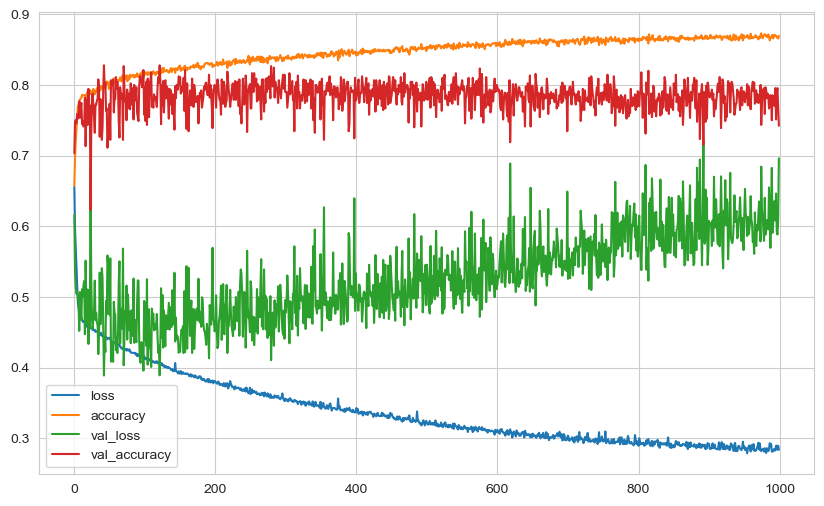

In [145]:
#Plotting the history
loss_df_weighted.plot()
plt.show()

In [146]:
#Seeing the evaluation of the weighted_model
weighted_model.evaluate(X_test, y_test, verbose=0)

[0.7780620455741882, 0.718999981880188]

In [147]:
#Seeing the loss and the accuracy of the weighted_model
loss, accuracy = weighted_model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.7780620455741882
accuracy:  0.718999981880188


In [148]:
#Making y_pred 
y_pred = weighted_model.predict(X_test) > 0.5

#Printing the confusion matrix of the test data
print(confusion_matrix(y_test, y_pred))

#Printing the classification report of the test data
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[571 225]
 [ 56 148]]
              precision    recall  f1-score   support

           0       0.91      0.72      0.80       796
           1       0.40      0.73      0.51       204

    accuracy                           0.72      1000
   macro avg       0.65      0.72      0.66      1000
weighted avg       0.81      0.72      0.74      1000



32/32 [==============================] - 0s 2ms/step


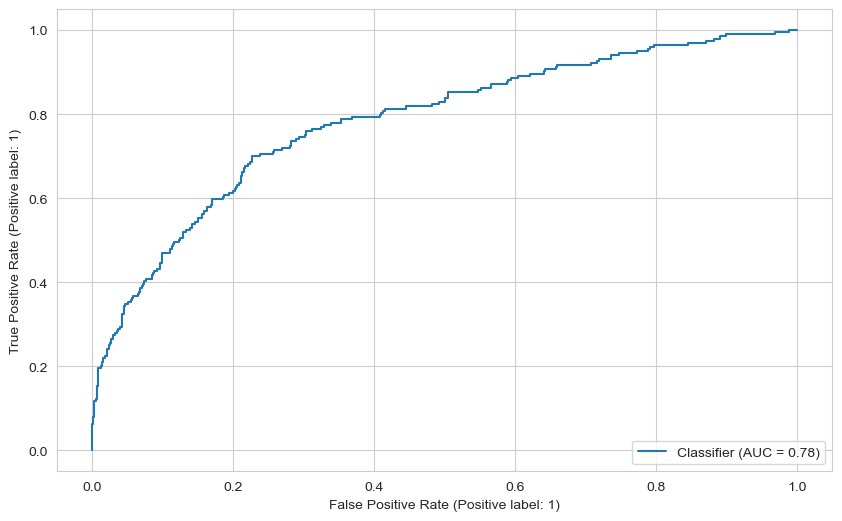

In [149]:
y_pred_proba = weighted_model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [150]:
roc_auc_score(y_test, y_pred_proba)

0.7833345649817716

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method

### Increase The Learning Rate and Observe The Results

In [153]:
#First, setting the random seed
tf.random.set_seed(seed)


#Creating the model with Sequential
lr_model = Sequential()

#Creating the layers
lr_model.add(Dense(36, activation='relu', input_dim=X_train.shape[1]))
lr_model.add(Dense(18, activation='relu')) #Hidden layer
lr_model.add(Dense(9, activation='relu')) #Hidden layer
lr_model.add(Dense(1, activation='sigmoid')) #Output layer. Note, we use sigmoid because it is binary

#Increasing the learning rate
adam = Adam(learning_rate=0.005)

#Compile the layers
lr_model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

In [154]:
#Fitting the model, and using the class_weight with it this time
lr_model.fit(x=X_train, y=y_train, validation_split=0.1, batch_size=32, epochs=1000, verbose=1, class_weight=class_weights)

Epoch 1/1000
254/254 [==============================] - 4s 8ms/step - loss: 0.6258 - accuracy: 0.6678 - val_loss: 0.6536 - val_accuracy: 0.6500
Epoch 2/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.5241 - accuracy: 0.7398 - val_loss: 0.5211 - val_accuracy: 0.7478
Epoch 3/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.4975 - accuracy: 0.7657 - val_loss: 0.4915 - val_accuracy: 0.7467
Epoch 4/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.4887 - accuracy: 0.7710 - val_loss: 0.4946 - val_accuracy: 0.7533
Epoch 5/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.4824 - accuracy: 0.7707 - val_loss: 0.4704 - val_accuracy: 0.7778
Epoch 6/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.4722 - accuracy: 0.7853 - val_loss: 0.4697 - val_accuracy: 0.7700
Epoch 7/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.4688 - accuracy: 0.7886 - val_loss: 0.4421 - val_accuracy:

254/254 [==============================] - 2s 6ms/step - loss: 0.4173 - accuracy: 0.8080 - val_loss: 0.4690 - val_accuracy: 0.7822
Epoch 58/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.4147 - accuracy: 0.8122 - val_loss: 0.5074 - val_accuracy: 0.7622
Epoch 59/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.4166 - accuracy: 0.8099 - val_loss: 0.4794 - val_accuracy: 0.7744
Epoch 60/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.4073 - accuracy: 0.8107 - val_loss: 0.4562 - val_accuracy: 0.7967
Epoch 61/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.4107 - accuracy: 0.8141 - val_loss: 0.5132 - val_accuracy: 0.7611
Epoch 62/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.4105 - accuracy: 0.8072 - val_loss: 0.4495 - val_accuracy: 0.7889
Epoch 63/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.4078 - accuracy: 0.8153 - val_loss: 0.4619 - val_accuracy: 0.7867

254/254 [==============================] - 1s 5ms/step - loss: 0.3725 - accuracy: 0.8170 - val_loss: 0.5156 - val_accuracy: 0.7733
Epoch 114/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.3720 - accuracy: 0.8220 - val_loss: 0.5172 - val_accuracy: 0.7700
Epoch 115/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.3798 - accuracy: 0.8183 - val_loss: 0.5198 - val_accuracy: 0.7467
Epoch 116/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.3743 - accuracy: 0.8183 - val_loss: 0.5274 - val_accuracy: 0.7311
Epoch 117/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.3751 - accuracy: 0.8163 - val_loss: 0.5596 - val_accuracy: 0.7256
Epoch 118/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.3777 - accuracy: 0.8186 - val_loss: 0.5378 - val_accuracy: 0.7411
Epoch 119/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.3714 - accuracy: 0.8243 - val_loss: 0.5128 - val_accuracy: 

254/254 [==============================] - 2s 7ms/step - loss: 0.3649 - accuracy: 0.8173 - val_loss: 0.5181 - val_accuracy: 0.7711
Epoch 170/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.3555 - accuracy: 0.8260 - val_loss: 0.5609 - val_accuracy: 0.7578
Epoch 171/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.3583 - accuracy: 0.8194 - val_loss: 0.5150 - val_accuracy: 0.7867
Epoch 172/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.3558 - accuracy: 0.8260 - val_loss: 0.5426 - val_accuracy: 0.7544
Epoch 173/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.3523 - accuracy: 0.8283 - val_loss: 0.5674 - val_accuracy: 0.7400
Epoch 174/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.3513 - accuracy: 0.8253 - val_loss: 0.5417 - val_accuracy: 0.7500
Epoch 175/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.3596 - accuracy: 0.8243 - val_loss: 0.5590 - val_accuracy: 

254/254 [==============================] - 1s 6ms/step - loss: 0.3452 - accuracy: 0.8273 - val_loss: 0.5755 - val_accuracy: 0.7889
Epoch 226/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.3490 - accuracy: 0.8293 - val_loss: 0.5572 - val_accuracy: 0.7911
Epoch 227/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.3393 - accuracy: 0.8298 - val_loss: 0.5848 - val_accuracy: 0.7578
Epoch 228/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.3514 - accuracy: 0.8262 - val_loss: 0.5620 - val_accuracy: 0.7511
Epoch 229/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.3481 - accuracy: 0.8264 - val_loss: 0.5947 - val_accuracy: 0.7444
Epoch 230/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.3472 - accuracy: 0.8289 - val_loss: 0.5960 - val_accuracy: 0.7400
Epoch 231/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.3403 - accuracy: 0.8320 - val_loss: 0.5769 - val_accuracy: 

254/254 [==============================] - 2s 6ms/step - loss: 0.3363 - accuracy: 0.8281 - val_loss: 0.6185 - val_accuracy: 0.7522
Epoch 282/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.3379 - accuracy: 0.8340 - val_loss: 0.6367 - val_accuracy: 0.7389
Epoch 283/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.3336 - accuracy: 0.8325 - val_loss: 0.5828 - val_accuracy: 0.7622
Epoch 284/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.3293 - accuracy: 0.8296 - val_loss: 0.6043 - val_accuracy: 0.7644
Epoch 285/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.3372 - accuracy: 0.8319 - val_loss: 0.6109 - val_accuracy: 0.7544
Epoch 286/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.3300 - accuracy: 0.8315 - val_loss: 0.6192 - val_accuracy: 0.7622
Epoch 287/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.3427 - accuracy: 0.8268 - val_loss: 0.5822 - val_accuracy: 

254/254 [==============================] - 1s 6ms/step - loss: 0.3267 - accuracy: 0.8391 - val_loss: 0.6657 - val_accuracy: 0.7522
Epoch 338/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.3257 - accuracy: 0.8333 - val_loss: 0.6079 - val_accuracy: 0.7811
Epoch 339/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.3453 - accuracy: 0.8301 - val_loss: 0.6353 - val_accuracy: 0.7544
Epoch 340/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.3246 - accuracy: 0.8370 - val_loss: 0.6756 - val_accuracy: 0.7411
Epoch 341/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.3254 - accuracy: 0.8356 - val_loss: 0.6319 - val_accuracy: 0.7478
Epoch 342/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.3301 - accuracy: 0.8304 - val_loss: 0.6409 - val_accuracy: 0.7444
Epoch 343/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.3324 - accuracy: 0.8301 - val_loss: 0.6358 - val_accuracy: 

254/254 [==============================] - 1s 6ms/step - loss: 0.3272 - accuracy: 0.8296 - val_loss: 0.6749 - val_accuracy: 0.7622
Epoch 394/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.3195 - accuracy: 0.8348 - val_loss: 0.6552 - val_accuracy: 0.7556
Epoch 395/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.3167 - accuracy: 0.8352 - val_loss: 0.7092 - val_accuracy: 0.7289
Epoch 396/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.3233 - accuracy: 0.8312 - val_loss: 0.6767 - val_accuracy: 0.7533
Epoch 397/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.3328 - accuracy: 0.8295 - val_loss: 0.7044 - val_accuracy: 0.7356
Epoch 398/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.3168 - accuracy: 0.8368 - val_loss: 0.7290 - val_accuracy: 0.7000
Epoch 399/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.3282 - accuracy: 0.8327 - val_loss: 0.7409 - val_accuracy: 

254/254 [==============================] - 1s 6ms/step - loss: 0.3204 - accuracy: 0.8342 - val_loss: 0.7116 - val_accuracy: 0.7333
Epoch 450/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.3143 - accuracy: 0.8272 - val_loss: 0.7054 - val_accuracy: 0.7500
Epoch 451/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.3185 - accuracy: 0.8338 - val_loss: 0.7411 - val_accuracy: 0.7489
Epoch 452/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.3251 - accuracy: 0.8285 - val_loss: 0.6909 - val_accuracy: 0.7633
Epoch 453/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.3221 - accuracy: 0.8346 - val_loss: 0.6927 - val_accuracy: 0.7600
Epoch 454/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.3174 - accuracy: 0.8357 - val_loss: 0.6616 - val_accuracy: 0.7744
Epoch 455/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.3287 - accuracy: 0.8319 - val_loss: 0.6565 - val_accuracy: 

254/254 [==============================] - 1s 6ms/step - loss: 0.3111 - accuracy: 0.8348 - val_loss: 0.7170 - val_accuracy: 0.7644
Epoch 506/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.3149 - accuracy: 0.8353 - val_loss: 0.7020 - val_accuracy: 0.7500
Epoch 507/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.3162 - accuracy: 0.8335 - val_loss: 0.7497 - val_accuracy: 0.7567
Epoch 508/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.3216 - accuracy: 0.8347 - val_loss: 0.6895 - val_accuracy: 0.7678
Epoch 509/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.3073 - accuracy: 0.8349 - val_loss: 0.7251 - val_accuracy: 0.7567
Epoch 510/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.3136 - accuracy: 0.8378 - val_loss: 0.6798 - val_accuracy: 0.7711
Epoch 511/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.3158 - accuracy: 0.8395 - val_loss: 0.6841 - val_accuracy: 

254/254 [==============================] - 2s 6ms/step - loss: 0.3104 - accuracy: 0.8426 - val_loss: 0.7530 - val_accuracy: 0.7678
Epoch 562/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.3142 - accuracy: 0.8379 - val_loss: 0.7585 - val_accuracy: 0.7300
Epoch 563/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.3058 - accuracy: 0.8385 - val_loss: 0.7569 - val_accuracy: 0.7811
Epoch 564/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.3159 - accuracy: 0.8346 - val_loss: 0.7451 - val_accuracy: 0.7600
Epoch 565/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.3130 - accuracy: 0.8393 - val_loss: 0.7325 - val_accuracy: 0.7589
Epoch 566/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.3103 - accuracy: 0.8373 - val_loss: 0.7362 - val_accuracy: 0.7478
Epoch 567/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.3099 - accuracy: 0.8407 - val_loss: 0.7543 - val_accuracy: 

254/254 [==============================] - 2s 6ms/step - loss: 0.3087 - accuracy: 0.8438 - val_loss: 0.7082 - val_accuracy: 0.7156
Epoch 618/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.3194 - accuracy: 0.8305 - val_loss: 0.7433 - val_accuracy: 0.7633
Epoch 619/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.3038 - accuracy: 0.8425 - val_loss: 0.7920 - val_accuracy: 0.7178
Epoch 620/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.2995 - accuracy: 0.8409 - val_loss: 0.7683 - val_accuracy: 0.7556
Epoch 621/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.3059 - accuracy: 0.8384 - val_loss: 0.7403 - val_accuracy: 0.7467
Epoch 622/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.3040 - accuracy: 0.8399 - val_loss: 0.7651 - val_accuracy: 0.7600
Epoch 623/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.3005 - accuracy: 0.8407 - val_loss: 0.7965 - val_accuracy: 

254/254 [==============================] - 1s 5ms/step - loss: 0.3024 - accuracy: 0.8402 - val_loss: 0.7612 - val_accuracy: 0.7300
Epoch 674/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.3085 - accuracy: 0.8369 - val_loss: 0.7766 - val_accuracy: 0.7556
Epoch 675/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.3071 - accuracy: 0.8365 - val_loss: 0.7960 - val_accuracy: 0.7233
Epoch 676/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.2969 - accuracy: 0.8410 - val_loss: 0.7979 - val_accuracy: 0.7311
Epoch 677/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.3017 - accuracy: 0.8410 - val_loss: 0.6853 - val_accuracy: 0.7611
Epoch 678/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.3042 - accuracy: 0.8388 - val_loss: 0.7498 - val_accuracy: 0.7544
Epoch 679/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.3102 - accuracy: 0.8357 - val_loss: 0.7463 - val_accuracy: 

254/254 [==============================] - 2s 7ms/step - loss: 0.2948 - accuracy: 0.8405 - val_loss: 0.8223 - val_accuracy: 0.7311
Epoch 730/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.3024 - accuracy: 0.8406 - val_loss: 0.8179 - val_accuracy: 0.7422
Epoch 731/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.2952 - accuracy: 0.8454 - val_loss: 0.8351 - val_accuracy: 0.7633
Epoch 732/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.2957 - accuracy: 0.8449 - val_loss: 0.7852 - val_accuracy: 0.7344
Epoch 733/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.2926 - accuracy: 0.8431 - val_loss: 0.8736 - val_accuracy: 0.7378
Epoch 734/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.3132 - accuracy: 0.8390 - val_loss: 0.7234 - val_accuracy: 0.7611
Epoch 735/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.3051 - accuracy: 0.8432 - val_loss: 0.7989 - val_accuracy: 

254/254 [==============================] - 1s 5ms/step - loss: 0.2910 - accuracy: 0.8457 - val_loss: 0.8258 - val_accuracy: 0.7511
Epoch 786/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.3050 - accuracy: 0.8391 - val_loss: 0.8635 - val_accuracy: 0.7489
Epoch 787/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.3015 - accuracy: 0.8427 - val_loss: 0.8554 - val_accuracy: 0.7289
Epoch 788/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.2872 - accuracy: 0.8472 - val_loss: 0.8369 - val_accuracy: 0.7589
Epoch 789/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.2994 - accuracy: 0.8379 - val_loss: 0.8108 - val_accuracy: 0.7522
Epoch 790/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.3202 - accuracy: 0.8335 - val_loss: 0.7930 - val_accuracy: 0.7644
Epoch 791/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.2931 - accuracy: 0.8468 - val_loss: 0.8048 - val_accuracy: 

254/254 [==============================] - 2s 6ms/step - loss: 0.2930 - accuracy: 0.8420 - val_loss: 0.8253 - val_accuracy: 0.7544
Epoch 842/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.3067 - accuracy: 0.8410 - val_loss: 0.8216 - val_accuracy: 0.7500
Epoch 843/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.2983 - accuracy: 0.8428 - val_loss: 0.8013 - val_accuracy: 0.7356
Epoch 844/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.3055 - accuracy: 0.8410 - val_loss: 0.8601 - val_accuracy: 0.7556
Epoch 845/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.2867 - accuracy: 0.8483 - val_loss: 0.8468 - val_accuracy: 0.7489
Epoch 846/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.2889 - accuracy: 0.8448 - val_loss: 0.7996 - val_accuracy: 0.7622
Epoch 847/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.2946 - accuracy: 0.8494 - val_loss: 0.8393 - val_accuracy: 

254/254 [==============================] - 1s 6ms/step - loss: 0.3042 - accuracy: 0.8309 - val_loss: 0.8127 - val_accuracy: 0.7444
Epoch 898/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.2896 - accuracy: 0.8378 - val_loss: 0.8493 - val_accuracy: 0.7367
Epoch 899/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.2886 - accuracy: 0.8327 - val_loss: 0.8162 - val_accuracy: 0.7444
Epoch 900/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.2882 - accuracy: 0.8375 - val_loss: 0.9368 - val_accuracy: 0.7344
Epoch 901/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.3005 - accuracy: 0.8299 - val_loss: 0.8149 - val_accuracy: 0.7222
Epoch 902/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.3016 - accuracy: 0.8305 - val_loss: 0.9319 - val_accuracy: 0.7144
Epoch 903/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.2874 - accuracy: 0.8386 - val_loss: 0.9095 - val_accuracy: 

254/254 [==============================] - 2s 6ms/step - loss: 0.2802 - accuracy: 0.8464 - val_loss: 0.8707 - val_accuracy: 0.7344
Epoch 954/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.2893 - accuracy: 0.8301 - val_loss: 0.8659 - val_accuracy: 0.7400
Epoch 955/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.2838 - accuracy: 0.8364 - val_loss: 0.9611 - val_accuracy: 0.7533
Epoch 956/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.2998 - accuracy: 0.8289 - val_loss: 0.8932 - val_accuracy: 0.7489
Epoch 957/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.3000 - accuracy: 0.8386 - val_loss: 0.8405 - val_accuracy: 0.7433
Epoch 958/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.3026 - accuracy: 0.8305 - val_loss: 0.8490 - val_accuracy: 0.7567
Epoch 959/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.2872 - accuracy: 0.8386 - val_loss: 0.8910 - val_accuracy: 

In [156]:
lr_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 36)                504       
                                                                 
 dense_17 (Dense)            (None, 18)                666       
                                                                 
 dense_18 (Dense)            (None, 9)                 171       
                                                                 
 dense_19 (Dense)            (None, 1)                 10        
                                                                 
Total params: 1351 (5.28 KB)
Trainable params: 1351 (5.28 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Evaluate The Model with learning rate

In [157]:
#Let's see the history of the model with learning rate
lr_model.history.history

{'loss': [0.6258161067962646,
  0.5240996479988098,
  0.497502863407135,
  0.4886538088321686,
  0.4823528230190277,
  0.4721890687942505,
  0.46879521012306213,
  0.46353909373283386,
  0.46410074830055237,
  0.46625182032585144,
  0.4576285481452942,
  0.45570704340934753,
  0.45484334230422974,
  0.45595088601112366,
  0.45218726992607117,
  0.45143476128578186,
  0.4533875584602356,
  0.4508276879787445,
  0.44665995240211487,
  0.4445447623729706,
  0.44277530908584595,
  0.44528526067733765,
  0.442003071308136,
  0.4396304190158844,
  0.4414314925670624,
  0.4411582052707672,
  0.4396267831325531,
  0.44029250741004944,
  0.4379769563674927,
  0.4401049017906189,
  0.4350481629371643,
  0.43625128269195557,
  0.4351593852043152,
  0.4324869215488434,
  0.4304509460926056,
  0.4299204349517822,
  0.436118483543396,
  0.4278629720211029,
  0.4332199990749359,
  0.4288526773452759,
  0.4294687509536743,
  0.4259990453720093,
  0.4235789179801941,
  0.4252129793167114,
  0.423406809

In [158]:
#Creating a dataframe from the history of the model with learning rate to be able to plot it
loss_df_lr = pd.DataFrame(lr_model.history.history)
loss_df_lr.head()

loss  accuracy  val_loss  val_accuracy
0 0.626     0.668     0.654         0.650
1 0.524     0.740     0.521         0.748
2 0.498     0.766     0.491         0.747
3 0.489     0.771     0.495         0.753
4 0.482     0.771     0.470         0.778

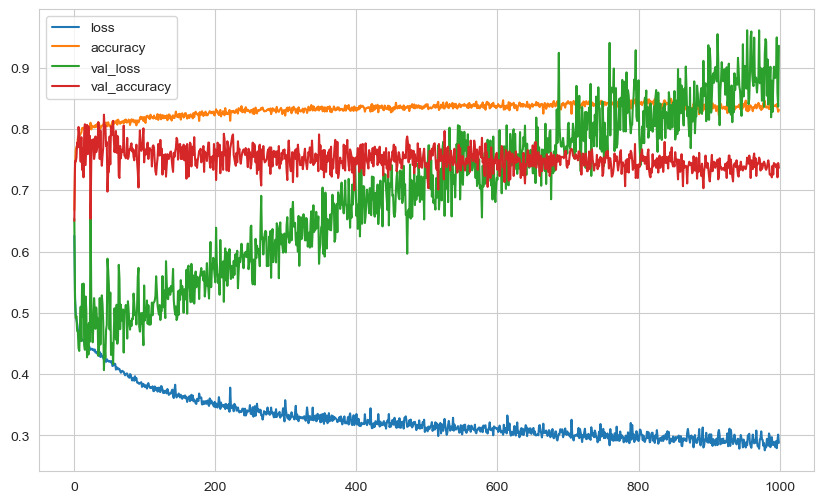

In [159]:
#Plotting the history
loss_df_lr.plot()
plt.show()

In [160]:
#Seeing the evaluation of the model with learning rate
lr_model.evaluate(X_test, y_test, verbose=0)

[1.0456855297088623, 0.7099999785423279]

In [161]:
#Seeing the loss and the accuracy of the model with learning ratel
loss, accuracy = lr_model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  1.0456855297088623
accuracy:  0.7099999785423279


In [162]:
#Making y_pred 
y_pred = lr_model.predict(X_test) > 0.5

#Printing the confusion matrix of the test data
print(confusion_matrix(y_test, y_pred))

#Printing the classification report of the test data
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 3ms/step
[[574 222]
 [ 68 136]]
              precision    recall  f1-score   support

           0       0.89      0.72      0.80       796
           1       0.38      0.67      0.48       204

    accuracy                           0.71      1000
   macro avg       0.64      0.69      0.64      1000
weighted avg       0.79      0.71      0.73      1000



32/32 [==============================] - 0s 2ms/step


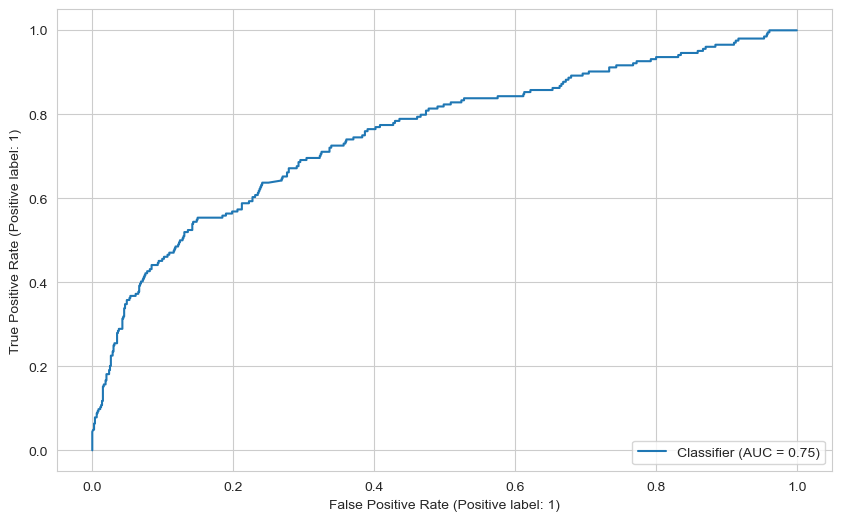

In [164]:
y_pred_proba = lr_model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [165]:
roc_auc_score(y_test, y_pred_proba)

0.7532792639668933

### Add Dropout Layer

In [188]:
#First, setting the random seed
tf.random.set_seed(seed)

#Creating the weighted model with Sequential
dro_model = Sequential()

#Creating the layers
dro_model.add(Dense(36, activation='relu', input_dim=X_train.shape[1]))
#Adding the dropout layer
#Note, we only add dropout layer to the hidden layers not the output layer
dro_model.add(Dropout(0.5))

dro_model.add(Dense(18, activation='relu')) #Hidden layer
#Adding the dropout layer
dro_model.add(Dropout(0.5))

dro_model.add(Dense(9, activation='relu')) #Hidden layer
#Adding the dropout layer
dro_model.add(Dropout(0.5))

dro_model.add(Dense(1, activation='sigmoid')) #Output layer. Note, we use sigmoid because it is binary

#Increasing the learning rate
adam = Adam(learning_rate=0.005)

#Compile the layers
dro_model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

In [189]:
#Fitting the model which we used dropout with it
dro_model.fit(x=X_train, y=y_train, validation_split=0.1, batch_size=32, epochs=1000, verbose=1, class_weight=class_weights)

Epoch 1/1000
254/254 [==============================] - 5s 8ms/step - loss: 0.6903 - accuracy: 0.4775 - val_loss: 0.6674 - val_accuracy: 0.6189
Epoch 2/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.6641 - accuracy: 0.5440 - val_loss: 0.6203 - val_accuracy: 0.7167
Epoch 3/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.6532 - accuracy: 0.6064 - val_loss: 0.6238 - val_accuracy: 0.7111
Epoch 4/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.6312 - accuracy: 0.6846 - val_loss: 0.6041 - val_accuracy: 0.7122
Epoch 5/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.6202 - accuracy: 0.6965 - val_loss: 0.5576 - val_accuracy: 0.7356
Epoch 6/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.6160 - accuracy: 0.7035 - val_loss: 0.5490 - val_accuracy: 0.7511
Epoch 7/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.6072 - accuracy: 0.7037 - val_loss: 0.6076 - val_accuracy:

254/254 [==============================] - 2s 6ms/step - loss: 0.5478 - accuracy: 0.7805 - val_loss: 0.4857 - val_accuracy: 0.7756
Epoch 58/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5549 - accuracy: 0.7695 - val_loss: 0.5249 - val_accuracy: 0.7378
Epoch 59/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5596 - accuracy: 0.7709 - val_loss: 0.5205 - val_accuracy: 0.7678
Epoch 60/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5596 - accuracy: 0.7654 - val_loss: 0.5476 - val_accuracy: 0.7678
Epoch 61/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5547 - accuracy: 0.7727 - val_loss: 0.5658 - val_accuracy: 0.7211
Epoch 62/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5540 - accuracy: 0.7660 - val_loss: 0.4451 - val_accuracy: 0.8078
Epoch 63/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5514 - accuracy: 0.7863 - val_loss: 0.4961 - val_accuracy: 0.7911

254/254 [==============================] - 2s 8ms/step - loss: 0.5410 - accuracy: 0.7909 - val_loss: 0.5221 - val_accuracy: 0.7544
Epoch 114/1000
254/254 [==============================] - 2s 8ms/step - loss: 0.5474 - accuracy: 0.7819 - val_loss: 0.5080 - val_accuracy: 0.7989
Epoch 115/1000
254/254 [==============================] - 2s 8ms/step - loss: 0.5477 - accuracy: 0.7830 - val_loss: 0.4953 - val_accuracy: 0.7611
Epoch 116/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.5410 - accuracy: 0.7816 - val_loss: 0.5302 - val_accuracy: 0.7811
Epoch 117/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5437 - accuracy: 0.7942 - val_loss: 0.5924 - val_accuracy: 0.7767
Epoch 118/1000
254/254 [==============================] - 2s 8ms/step - loss: 0.5516 - accuracy: 0.7796 - val_loss: 0.5365 - val_accuracy: 0.7689
Epoch 119/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.5429 - accuracy: 0.7791 - val_loss: 0.4684 - val_accuracy: 

254/254 [==============================] - 2s 7ms/step - loss: 0.5466 - accuracy: 0.7846 - val_loss: 0.4975 - val_accuracy: 0.7744
Epoch 170/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5451 - accuracy: 0.7712 - val_loss: 0.5022 - val_accuracy: 0.7767
Epoch 171/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.5418 - accuracy: 0.7742 - val_loss: 0.5068 - val_accuracy: 0.7811
Epoch 172/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.5362 - accuracy: 0.7746 - val_loss: 0.4692 - val_accuracy: 0.7733
Epoch 173/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5409 - accuracy: 0.7730 - val_loss: 0.4796 - val_accuracy: 0.7889
Epoch 174/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5483 - accuracy: 0.7832 - val_loss: 0.5062 - val_accuracy: 0.7800
Epoch 175/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5432 - accuracy: 0.7817 - val_loss: 0.5417 - val_accuracy: 

254/254 [==============================] - 2s 6ms/step - loss: 0.5361 - accuracy: 0.7822 - val_loss: 0.5014 - val_accuracy: 0.7733
Epoch 226/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.5454 - accuracy: 0.7757 - val_loss: 0.4548 - val_accuracy: 0.7778
Epoch 227/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5433 - accuracy: 0.7623 - val_loss: 0.4768 - val_accuracy: 0.7733
Epoch 228/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5409 - accuracy: 0.7810 - val_loss: 0.5369 - val_accuracy: 0.8000
Epoch 229/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5440 - accuracy: 0.7733 - val_loss: 0.5185 - val_accuracy: 0.7744
Epoch 230/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5405 - accuracy: 0.7694 - val_loss: 0.4863 - val_accuracy: 0.7778
Epoch 231/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5384 - accuracy: 0.7779 - val_loss: 0.4668 - val_accuracy: 

254/254 [==============================] - 2s 7ms/step - loss: 0.5411 - accuracy: 0.7544 - val_loss: 0.4994 - val_accuracy: 0.7400
Epoch 282/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5477 - accuracy: 0.7580 - val_loss: 0.4941 - val_accuracy: 0.7811
Epoch 283/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.5304 - accuracy: 0.7851 - val_loss: 0.4550 - val_accuracy: 0.7911
Epoch 284/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.5399 - accuracy: 0.7790 - val_loss: 0.5026 - val_accuracy: 0.7733
Epoch 285/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5406 - accuracy: 0.7610 - val_loss: 0.4840 - val_accuracy: 0.7756
Epoch 286/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5446 - accuracy: 0.7691 - val_loss: 0.5121 - val_accuracy: 0.7656
Epoch 287/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5433 - accuracy: 0.7489 - val_loss: 0.5064 - val_accuracy: 

254/254 [==============================] - 2s 7ms/step - loss: 0.5400 - accuracy: 0.7795 - val_loss: 0.5144 - val_accuracy: 0.8067
Epoch 338/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.5380 - accuracy: 0.7823 - val_loss: 0.4834 - val_accuracy: 0.7911
Epoch 339/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.5442 - accuracy: 0.7759 - val_loss: 0.5052 - val_accuracy: 0.7800
Epoch 340/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5358 - accuracy: 0.7784 - val_loss: 0.5611 - val_accuracy: 0.7478
Epoch 341/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5476 - accuracy: 0.7602 - val_loss: 0.4810 - val_accuracy: 0.7867
Epoch 342/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5391 - accuracy: 0.7768 - val_loss: 0.4950 - val_accuracy: 0.7678
Epoch 343/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5392 - accuracy: 0.7735 - val_loss: 0.5058 - val_accuracy: 

254/254 [==============================] - 2s 7ms/step - loss: 0.5415 - accuracy: 0.7826 - val_loss: 0.4578 - val_accuracy: 0.8122
Epoch 394/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5367 - accuracy: 0.7774 - val_loss: 0.5152 - val_accuracy: 0.7611
Epoch 395/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.5448 - accuracy: 0.7812 - val_loss: 0.5398 - val_accuracy: 0.7733
Epoch 396/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.5405 - accuracy: 0.7819 - val_loss: 0.5070 - val_accuracy: 0.7800
Epoch 397/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5402 - accuracy: 0.7723 - val_loss: 0.5096 - val_accuracy: 0.7622
Epoch 398/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5376 - accuracy: 0.7704 - val_loss: 0.4684 - val_accuracy: 0.7744
Epoch 399/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5361 - accuracy: 0.7765 - val_loss: 0.5276 - val_accuracy: 

254/254 [==============================] - 2s 6ms/step - loss: 0.5343 - accuracy: 0.7877 - val_loss: 0.4852 - val_accuracy: 0.7889
Epoch 450/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.5280 - accuracy: 0.7890 - val_loss: 0.4643 - val_accuracy: 0.8044
Epoch 451/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5372 - accuracy: 0.7794 - val_loss: 0.4898 - val_accuracy: 0.7956
Epoch 452/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5414 - accuracy: 0.7869 - val_loss: 0.4893 - val_accuracy: 0.7989
Epoch 453/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5216 - accuracy: 0.7790 - val_loss: 0.4913 - val_accuracy: 0.7822
Epoch 454/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5398 - accuracy: 0.7684 - val_loss: 0.4796 - val_accuracy: 0.7878
Epoch 455/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5454 - accuracy: 0.7712 - val_loss: 0.4969 - val_accuracy: 

254/254 [==============================] - 2s 6ms/step - loss: 0.5365 - accuracy: 0.7726 - val_loss: 0.4755 - val_accuracy: 0.7944
Epoch 506/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5334 - accuracy: 0.7632 - val_loss: 0.4773 - val_accuracy: 0.7900
Epoch 507/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5498 - accuracy: 0.7498 - val_loss: 0.5026 - val_accuracy: 0.7567
Epoch 508/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5402 - accuracy: 0.7691 - val_loss: 0.4565 - val_accuracy: 0.7900
Epoch 509/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5391 - accuracy: 0.7778 - val_loss: 0.4863 - val_accuracy: 0.8156
Epoch 510/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5390 - accuracy: 0.7753 - val_loss: 0.4751 - val_accuracy: 0.7922
Epoch 511/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5389 - accuracy: 0.7835 - val_loss: 0.4984 - val_accuracy: 

254/254 [==============================] - 2s 7ms/step - loss: 0.5434 - accuracy: 0.7785 - val_loss: 0.5103 - val_accuracy: 0.7756
Epoch 562/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5412 - accuracy: 0.7760 - val_loss: 0.5427 - val_accuracy: 0.7511
Epoch 563/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5379 - accuracy: 0.7646 - val_loss: 0.4862 - val_accuracy: 0.7722
Epoch 564/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5335 - accuracy: 0.7736 - val_loss: 0.4898 - val_accuracy: 0.7889
Epoch 565/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5460 - accuracy: 0.7674 - val_loss: 0.4736 - val_accuracy: 0.7856
Epoch 566/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5412 - accuracy: 0.7752 - val_loss: 0.5026 - val_accuracy: 0.7956
Epoch 567/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.5411 - accuracy: 0.7812 - val_loss: 0.5284 - val_accuracy: 

254/254 [==============================] - 2s 7ms/step - loss: 0.5415 - accuracy: 0.7705 - val_loss: 0.4867 - val_accuracy: 0.7722
Epoch 618/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5412 - accuracy: 0.7670 - val_loss: 0.4818 - val_accuracy: 0.7789
Epoch 619/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5394 - accuracy: 0.7773 - val_loss: 0.4779 - val_accuracy: 0.7811
Epoch 620/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5393 - accuracy: 0.7698 - val_loss: 0.4652 - val_accuracy: 0.7867
Epoch 621/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.5371 - accuracy: 0.7627 - val_loss: 0.4888 - val_accuracy: 0.7900
Epoch 622/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5361 - accuracy: 0.7669 - val_loss: 0.4726 - val_accuracy: 0.8089
Epoch 623/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5485 - accuracy: 0.7657 - val_loss: 0.5071 - val_accuracy: 

254/254 [==============================] - 2s 7ms/step - loss: 0.5405 - accuracy: 0.7863 - val_loss: 0.4621 - val_accuracy: 0.8111
Epoch 674/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.5400 - accuracy: 0.7783 - val_loss: 0.5103 - val_accuracy: 0.7822
Epoch 675/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5371 - accuracy: 0.7809 - val_loss: 0.5220 - val_accuracy: 0.7833
Epoch 676/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5398 - accuracy: 0.7835 - val_loss: 0.5130 - val_accuracy: 0.7700
Epoch 677/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5334 - accuracy: 0.7769 - val_loss: 0.4747 - val_accuracy: 0.7911
Epoch 678/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5465 - accuracy: 0.7694 - val_loss: 0.5206 - val_accuracy: 0.7922
Epoch 679/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5413 - accuracy: 0.7690 - val_loss: 0.4776 - val_accuracy: 

254/254 [==============================] - 2s 7ms/step - loss: 0.5347 - accuracy: 0.7835 - val_loss: 0.4716 - val_accuracy: 0.7856
Epoch 730/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5369 - accuracy: 0.7698 - val_loss: 0.5179 - val_accuracy: 0.7722
Epoch 731/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5389 - accuracy: 0.7800 - val_loss: 0.4501 - val_accuracy: 0.7956
Epoch 732/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5358 - accuracy: 0.7883 - val_loss: 0.4833 - val_accuracy: 0.8044
Epoch 733/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5387 - accuracy: 0.7935 - val_loss: 0.5255 - val_accuracy: 0.8044
Epoch 734/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5453 - accuracy: 0.7658 - val_loss: 0.4592 - val_accuracy: 0.8000
Epoch 735/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5370 - accuracy: 0.7765 - val_loss: 0.4996 - val_accuracy: 

254/254 [==============================] - 2s 7ms/step - loss: 0.5386 - accuracy: 0.7879 - val_loss: 0.4755 - val_accuracy: 0.8000
Epoch 786/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5346 - accuracy: 0.7853 - val_loss: 0.4912 - val_accuracy: 0.7933
Epoch 787/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5329 - accuracy: 0.7772 - val_loss: 0.5414 - val_accuracy: 0.7656
Epoch 788/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5417 - accuracy: 0.7817 - val_loss: 0.4924 - val_accuracy: 0.8022
Epoch 789/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5281 - accuracy: 0.7849 - val_loss: 0.4968 - val_accuracy: 0.7867
Epoch 790/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5336 - accuracy: 0.7709 - val_loss: 0.5061 - val_accuracy: 0.7856
Epoch 791/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.5501 - accuracy: 0.7833 - val_loss: 0.4890 - val_accuracy: 

254/254 [==============================] - 2s 7ms/step - loss: 0.5426 - accuracy: 0.7652 - val_loss: 0.4717 - val_accuracy: 0.7800
Epoch 842/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5280 - accuracy: 0.7731 - val_loss: 0.4489 - val_accuracy: 0.7744
Epoch 843/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.5359 - accuracy: 0.7716 - val_loss: 0.4622 - val_accuracy: 0.7956
Epoch 844/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.5356 - accuracy: 0.7753 - val_loss: 0.5064 - val_accuracy: 0.7722
Epoch 845/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5360 - accuracy: 0.7721 - val_loss: 0.5188 - val_accuracy: 0.7744
Epoch 846/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5381 - accuracy: 0.7765 - val_loss: 0.4831 - val_accuracy: 0.7900
Epoch 847/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5352 - accuracy: 0.7837 - val_loss: 0.4745 - val_accuracy: 

254/254 [==============================] - 2s 7ms/step - loss: 0.5331 - accuracy: 0.7644 - val_loss: 0.4833 - val_accuracy: 0.7778
Epoch 898/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5326 - accuracy: 0.7641 - val_loss: 0.4699 - val_accuracy: 0.7844
Epoch 899/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5376 - accuracy: 0.7678 - val_loss: 0.4868 - val_accuracy: 0.7844
Epoch 900/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5388 - accuracy: 0.7706 - val_loss: 0.4736 - val_accuracy: 0.7611
Epoch 901/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5364 - accuracy: 0.7669 - val_loss: 0.5093 - val_accuracy: 0.7556
Epoch 902/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5362 - accuracy: 0.7702 - val_loss: 0.4889 - val_accuracy: 0.7933
Epoch 903/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5332 - accuracy: 0.7793 - val_loss: 0.5317 - val_accuracy: 

254/254 [==============================] - 2s 7ms/step - loss: 0.5363 - accuracy: 0.7847 - val_loss: 0.4702 - val_accuracy: 0.8089
Epoch 954/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5325 - accuracy: 0.7895 - val_loss: 0.4652 - val_accuracy: 0.8078
Epoch 955/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5330 - accuracy: 0.7742 - val_loss: 0.4668 - val_accuracy: 0.8089
Epoch 956/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5322 - accuracy: 0.7775 - val_loss: 0.4788 - val_accuracy: 0.8044
Epoch 957/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5499 - accuracy: 0.7746 - val_loss: 0.4944 - val_accuracy: 0.8011
Epoch 958/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5463 - accuracy: 0.7807 - val_loss: 0.5024 - val_accuracy: 0.8044
Epoch 959/1000
254/254 [==============================] - 2s 7ms/step - loss: 0.5265 - accuracy: 0.8019 - val_loss: 0.4503 - val_accuracy: 

In [190]:
#Seeing the summary of dro_model
dro_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 36)                504       
                                                                 
 dropout_6 (Dropout)         (None, 36)                0         
                                                                 
 dense_30 (Dense)            (None, 18)                666       
                                                                 
 dropout_7 (Dropout)         (None, 18)                0         
                                                                 
 dense_31 (Dense)            (None, 9)                 171       
                                                                 
 dropout_8 (Dropout)         (None, 9)                 0         
                                                                 
 dense_32 (Dense)            (None, 1)                

### Evaluate The Model that we added dropout to it

In [191]:
#Let's see the history of the model with learning rate
dro_model.history.history

{'loss': [0.6903425455093384,
  0.6640931367874146,
  0.6532438397407532,
  0.6311942338943481,
  0.6202420592308044,
  0.6159546375274658,
  0.6071736216545105,
  0.601850688457489,
  0.6005392074584961,
  0.5919311046600342,
  0.5947511792182922,
  0.581328272819519,
  0.5695770978927612,
  0.5762431025505066,
  0.5618109107017517,
  0.563499391078949,
  0.5632418394088745,
  0.5720820426940918,
  0.5670283436775208,
  0.5609804391860962,
  0.5600333213806152,
  0.5516430735588074,
  0.5627672076225281,
  0.561782956123352,
  0.5579496026039124,
  0.5564779043197632,
  0.5715826749801636,
  0.5638830065727234,
  0.5592929720878601,
  0.5602439045906067,
  0.5514414310455322,
  0.5544329881668091,
  0.5574367046356201,
  0.552131712436676,
  0.5638937950134277,
  0.5583456158638,
  0.5616240501403809,
  0.5564071536064148,
  0.55286705493927,
  0.5630952715873718,
  0.5534133911132812,
  0.5524815917015076,
  0.5599313378334045,
  0.5537003874778748,
  0.5594706535339355,
  0.54993325

In [192]:
#Creating a dataframe from the history of the model with dropout to be able to plot it
loss_df_dro = pd.DataFrame(dro_model.history.history)
loss_df_dro.head()

loss  accuracy  val_loss  val_accuracy
0 0.690     0.478     0.667         0.619
1 0.664     0.544     0.620         0.717
2 0.653     0.606     0.624         0.711
3 0.631     0.685     0.604         0.712
4 0.620     0.697     0.558         0.736

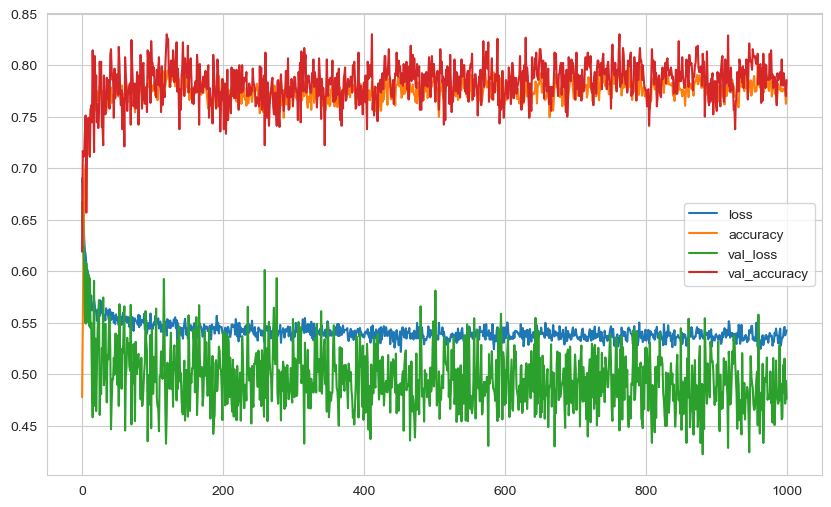

In [193]:
#Plotting the history
loss_df_dro.plot()
plt.show()

In [194]:
#Seeing the evaluation of the model with dropout
dro_model.evaluate(X_test, y_test, verbose=0)

[0.49125272035598755, 0.7770000100135803]

In [195]:
#Seeing the loss and the accuracy of the model with dropout
loss, accuracy = dro_model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.49125272035598755
accuracy:  0.7770000100135803


In [196]:
#Making y_pred 
y_pred = dro_model.predict(X_test) > 0.5

#Printing the confusion matrix of the test data
print(confusion_matrix(y_test, y_pred))

#Printing the classification report of the test data
print(classification_report(y_test, y_pred))

32/32 [==============================] - 1s 3ms/step
[[629 167]
 [ 56 148]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       796
           1       0.47      0.73      0.57       204

    accuracy                           0.78      1000
   macro avg       0.69      0.76      0.71      1000
weighted avg       0.83      0.78      0.79      1000



32/32 [==============================] - 0s 3ms/step


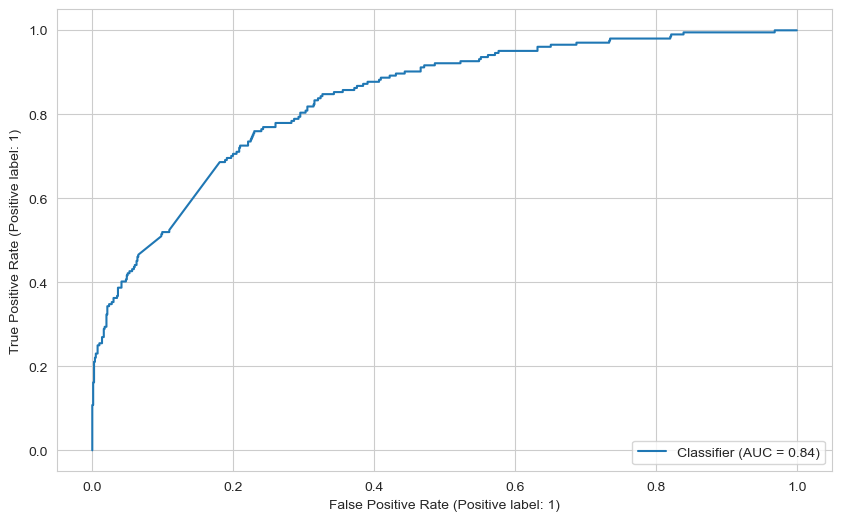

In [197]:
y_pred_proba = dro_model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [198]:
roc_auc_score(y_test, y_pred_proba)

0.8384046457779092

### Add Early Stop

#### Monitor the "val_loss" as metric

In [225]:
#First, setting the random seed
tf.random.set_seed(seed)

#Creating the weighted model with Sequential
stop_model = Sequential()

#Creating the layers
stop_model.add(Dense(36, activation='relu', input_dim=X_train.shape[1]))
#Adding the dropout layer
#Note, we only add dropout layer to the hidden layers not the output layer
stop_model.add(Dropout(0.5))

stop_model.add(Dense(18, activation='relu')) #Hidden layer
#Adding the dropout layer
stop_model.add(Dropout(0.5))

stop_model.add(Dense(9, activation='relu')) #Hidden layer
#Adding the dropout layer
stop_model.add(Dropout(0.5))

stop_model.add(Dense(1, activation='sigmoid')) #Output layer. Note, we use sigmoid because it is binary

#Increasing the learning rate
adam = Adam(learning_rate=0.005)

#Compile the layers
stop_model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

In [226]:
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True)

In [227]:
stop_model.fit(
    x=X_train,
    y=y_train,
    validation_split=0.1,
    batch_size=32,
    epochs=1000,
    verbose=1,
    class_weight=class_weights,
    callbacks=[early_stop],
)

Epoch 1/1000
254/254 [==============================] - 2s 3ms/step - loss: 0.6933 - accuracy: 0.4870 - val_loss: 0.6986 - val_accuracy: 0.4000
Epoch 2/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.6804 - accuracy: 0.4722 - val_loss: 0.6697 - val_accuracy: 0.6144
Epoch 3/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.6643 - accuracy: 0.5441 - val_loss: 0.6311 - val_accuracy: 0.6889
Epoch 4/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.6494 - accuracy: 0.5883 - val_loss: 0.6289 - val_accuracy: 0.6956
Epoch 5/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.6341 - accuracy: 0.6572 - val_loss: 0.5932 - val_accuracy: 0.7422
Epoch 6/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.6274 - accuracy: 0.6880 - val_loss: 0.6642 - val_accuracy: 0.6689
Epoch 7/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.6146 - accuracy: 0.7079 - val_loss: 0.6122 - val_accuracy:

In [228]:
#Seeing the summary of stop_model
stop_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 36)                504       
                                                                 
 dropout_15 (Dropout)        (None, 36)                0         
                                                                 
 dense_42 (Dense)            (None, 18)                666       
                                                                 
 dropout_16 (Dropout)        (None, 18)                0         
                                                                 
 dense_43 (Dense)            (None, 9)                 171       
                                                                 
 dropout_17 (Dropout)        (None, 9)                 0         
                                                                 
 dense_44 (Dense)            (None, 1)               

### Evaluate The Model that contains val_loss

In [229]:
#Let's see the history of the model 
stop_model.history.history

{'loss': [0.6932604908943176,
  0.6804055571556091,
  0.6643096804618835,
  0.6494017839431763,
  0.63409823179245,
  0.627362847328186,
  0.6146193742752075,
  0.6042405366897583,
  0.59823077917099,
  0.5967807769775391,
  0.5939173698425293,
  0.5895732045173645,
  0.5801446437835693,
  0.5735188722610474,
  0.5681579113006592,
  0.5730884075164795,
  0.5726498961448669,
  0.5750633478164673,
  0.5689713358879089,
  0.571365475654602,
  0.5560020804405212,
  0.5584014058113098,
  0.5630594491958618,
  0.5600847601890564,
  0.5539432764053345,
  0.5632617473602295,
  0.5579404830932617,
  0.5586031079292297,
  0.5558619499206543,
  0.5589685440063477,
  0.5591425895690918,
  0.5508430600166321,
  0.5591798424720764,
  0.5518402457237244,
  0.5485864877700806,
  0.5533190965652466,
  0.5492085814476013,
  0.5525642037391663,
  0.5530275702476501,
  0.5529624223709106,
  0.5522941946983337,
  0.5559093952178955,
  0.5495838522911072,
  0.5629432201385498,
  0.548771321773529,
  0.55156

In [230]:
#Creating a dataframe from the history of the model
loss_df_stop = pd.DataFrame(stop_model.history.history)
loss_df_stop.head()

loss  accuracy  val_loss  val_accuracy
0 0.693     0.487     0.699         0.400
1 0.680     0.472     0.670         0.614
2 0.664     0.544     0.631         0.689
3 0.649     0.588     0.629         0.696
4 0.634     0.657     0.593         0.742

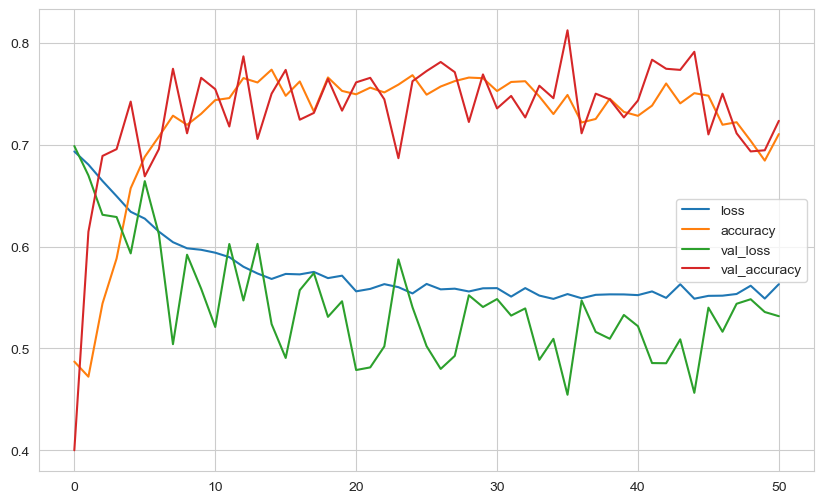

In [231]:
#Plotting the history
loss_df_stop.plot()
plt.show()

In [232]:
#Seeing the evaluation of the model
stop_model.evaluate(X_test, y_test, verbose=0)

[0.46650490164756775, 0.796999990940094]

In [233]:
#Seeing the loss and the accuracy of the model
loss, accuracy = stop_model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.46650490164756775
accuracy:  0.796999990940094


In [234]:
#Making y_pred 
y_pred = stop_model.predict(X_test) > 0.5

#Printing the confusion matrix of the test data
print(confusion_matrix(y_test, y_pred))

#Printing the classification report of the test data
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[665 131]
 [ 72 132]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       796
           1       0.50      0.65      0.57       204

    accuracy                           0.80      1000
   macro avg       0.70      0.74      0.72      1000
weighted avg       0.82      0.80      0.81      1000



32/32 [==============================] - 0s 1ms/step


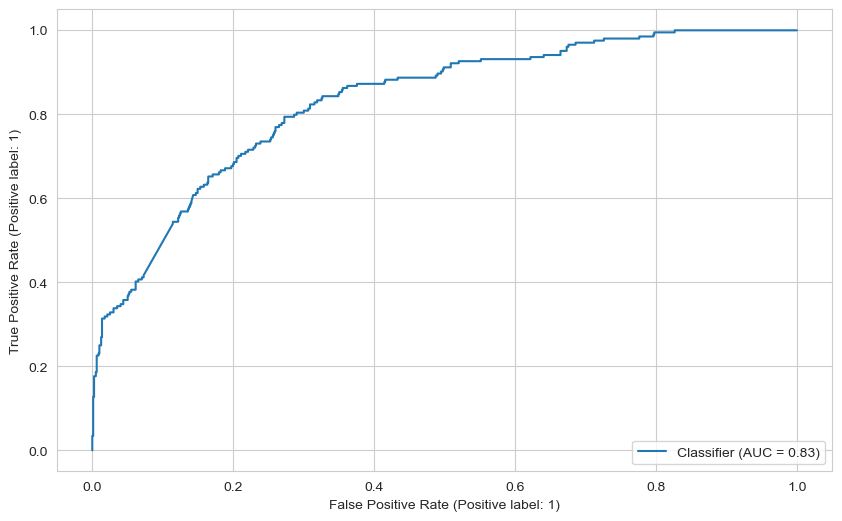

In [235]:
y_pred_proba = stop_model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [236]:
roc_auc_score(y_test, y_pred_proba)

0.8304050891713468

#### Monitor the "val_recall" as metric

In [237]:
#First, setting the random seed
tf.random.set_seed(seed)

#Creating the weighted model with Sequential
stop_model2 = Sequential()

#Creating the layers
stop_model2.add(Dense(36, activation='relu', input_dim=X_train.shape[1]))
#Adding the dropout layer
#Note, we only add dropout layer to the hidden layers not the output layer
stop_model2.add(Dropout(0.5))

stop_model2.add(Dense(18, activation='relu')) #Hidden layer
#Adding the dropout layer
stop_model2.add(Dropout(0.5))

stop_model2.add(Dense(9, activation='relu')) #Hidden layer
#Adding the dropout layer
stop_model2.add(Dropout(0.5))

stop_model2.add(Dense(1, activation='sigmoid')) #Output layer. Note, we use sigmoid because it is binary

#Increasing the learning rate
adam = Adam(learning_rate=0.005)

#Compile the layers
stop_model2.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

In [238]:
early_stop = EarlyStopping(monitor="val_recall", mode="min", verbose=1, patience=15, restore_best_weights=True)

In [239]:
stop_model2.fit(
    x=X_train,
    y=y_train,
    validation_split=0.1,
    batch_size=32,
    epochs=1000,
    verbose=1,
    class_weight=class_weights,
    callbacks=[early_stop],
)

Epoch 1/1000
254/254 [==============================] - 2s 3ms/step - loss: 0.6874 - accuracy: 0.6252 - val_loss: 0.6578 - val_accuracy: 0.6400
Epoch 2/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.6693 - accuracy: 0.6591 - val_loss: 0.6514 - val_accuracy: 0.7244
Epoch 3/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.6571 - accuracy: 0.6746 - val_loss: 0.6203 - val_accuracy: 0.7322
Epoch 4/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.6410 - accuracy: 0.7023 - val_loss: 0.5651 - val_accuracy: 0.7378
Epoch 5/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.6236 - accuracy: 0.7102 - val_loss: 0.5422 - val_accuracy: 0.7467
Epoch 6/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.6088 - accuracy: 0.7175 - val_loss: 0.5645 - val_accuracy: 0.7122
Epoch 7/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5882 - accuracy: 0.7321 - val_loss: 0.5525 - val_accuracy:

254/254 [==============================] - 1s 3ms/step - loss: 0.5469 - accuracy: 0.7833 - val_loss: 0.4936 - val_accuracy: 0.7911
Epoch 23/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5510 - accuracy: 0.7683 - val_loss: 0.4747 - val_accuracy: 0.7844
Epoch 24/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5457 - accuracy: 0.7733 - val_loss: 0.5081 - val_accuracy: 0.7700
Epoch 25/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5352 - accuracy: 0.7678 - val_loss: 0.5269 - val_accuracy: 0.7600
Epoch 26/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5449 - accuracy: 0.7588 - val_loss: 0.4436 - val_accuracy: 0.8056
Epoch 27/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5509 - accuracy: 0.7633 - val_loss: 0.4680 - val_accuracy: 0.7644
Epoch 28/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5402 - accuracy: 0.7591 - val_loss: 0.5297 - val_accuracy: 0.7333

254/254 [==============================] - 1s 3ms/step - loss: 0.5340 - accuracy: 0.7768 - val_loss: 0.5105 - val_accuracy: 0.7289
Epoch 45/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5346 - accuracy: 0.7667 - val_loss: 0.4513 - val_accuracy: 0.7822
Epoch 46/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5346 - accuracy: 0.7780 - val_loss: 0.5359 - val_accuracy: 0.7456
Epoch 47/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5399 - accuracy: 0.7900 - val_loss: 0.4891 - val_accuracy: 0.7844
Epoch 48/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5395 - accuracy: 0.7777 - val_loss: 0.5099 - val_accuracy: 0.7667
Epoch 49/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5317 - accuracy: 0.7686 - val_loss: 0.5334 - val_accuracy: 0.7433
Epoch 50/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5331 - accuracy: 0.7817 - val_loss: 0.4735 - val_accuracy: 0.7922

254/254 [==============================] - 1s 3ms/step - loss: 0.5406 - accuracy: 0.7763 - val_loss: 0.5077 - val_accuracy: 0.7722
Epoch 66/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5296 - accuracy: 0.7867 - val_loss: 0.4949 - val_accuracy: 0.7822
Epoch 67/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5396 - accuracy: 0.7784 - val_loss: 0.4912 - val_accuracy: 0.7833
Epoch 68/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5287 - accuracy: 0.7864 - val_loss: 0.4641 - val_accuracy: 0.8011
Epoch 69/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.5381 - accuracy: 0.7925 - val_loss: 0.4602 - val_accuracy: 0.8022
Epoch 70/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5286 - accuracy: 0.7975 - val_loss: 0.5473 - val_accuracy: 0.7333
Epoch 71/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5323 - accuracy: 0.7753 - val_loss: 0.4881 - val_accuracy: 0.7567

254/254 [==============================] - 1s 3ms/step - loss: 0.5333 - accuracy: 0.7900 - val_loss: 0.4865 - val_accuracy: 0.7744
Epoch 88/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.5353 - accuracy: 0.7851 - val_loss: 0.4849 - val_accuracy: 0.7889
Epoch 89/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.5289 - accuracy: 0.8015 - val_loss: 0.4562 - val_accuracy: 0.8211
Epoch 90/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.5396 - accuracy: 0.7888 - val_loss: 0.4807 - val_accuracy: 0.7933
Epoch 91/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.5219 - accuracy: 0.7883 - val_loss: 0.5408 - val_accuracy: 0.7156
Epoch 92/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5253 - accuracy: 0.7831 - val_loss: 0.5486 - val_accuracy: 0.7556
Epoch 93/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5300 - accuracy: 0.7741 - val_loss: 0.4882 - val_accuracy: 0.7722

254/254 [==============================] - 1s 3ms/step - loss: 0.5265 - accuracy: 0.7917 - val_loss: 0.4744 - val_accuracy: 0.8000
Epoch 109/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5253 - accuracy: 0.7870 - val_loss: 0.4746 - val_accuracy: 0.7756
Epoch 110/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5247 - accuracy: 0.7859 - val_loss: 0.4572 - val_accuracy: 0.7978
Epoch 111/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5213 - accuracy: 0.7974 - val_loss: 0.4717 - val_accuracy: 0.7867
Epoch 112/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5220 - accuracy: 0.7916 - val_loss: 0.4782 - val_accuracy: 0.7844
Epoch 113/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5188 - accuracy: 0.7900 - val_loss: 0.5034 - val_accuracy: 0.7833
Epoch 114/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5209 - accuracy: 0.7860 - val_loss: 0.4952 - val_accuracy: 

254/254 [==============================] - 1s 3ms/step - loss: 0.5191 - accuracy: 0.8138 - val_loss: 0.4556 - val_accuracy: 0.8000
Epoch 131/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5213 - accuracy: 0.7983 - val_loss: 0.4791 - val_accuracy: 0.7956
Epoch 132/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.5217 - accuracy: 0.8064 - val_loss: 0.4499 - val_accuracy: 0.8078
Epoch 133/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5280 - accuracy: 0.8058 - val_loss: 0.5023 - val_accuracy: 0.8044
Epoch 134/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5193 - accuracy: 0.8048 - val_loss: 0.4699 - val_accuracy: 0.7822
Epoch 135/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5197 - accuracy: 0.7927 - val_loss: 0.4905 - val_accuracy: 0.7767
Epoch 136/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5214 - accuracy: 0.7894 - val_loss: 0.4740 - val_accuracy: 

254/254 [==============================] - 1s 3ms/step - loss: 0.5267 - accuracy: 0.7917 - val_loss: 0.4789 - val_accuracy: 0.7833
Epoch 152/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5226 - accuracy: 0.7952 - val_loss: 0.4914 - val_accuracy: 0.7756
Epoch 153/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5256 - accuracy: 0.7893 - val_loss: 0.5009 - val_accuracy: 0.7811
Epoch 154/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5269 - accuracy: 0.7958 - val_loss: 0.4753 - val_accuracy: 0.7756
Epoch 155/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5122 - accuracy: 0.7956 - val_loss: 0.4731 - val_accuracy: 0.7889
Epoch 156/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5294 - accuracy: 0.7979 - val_loss: 0.4597 - val_accuracy: 0.8067
Epoch 157/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5232 - accuracy: 0.7974 - val_loss: 0.4935 - val_accuracy: 

254/254 [==============================] - 1s 3ms/step - loss: 0.5186 - accuracy: 0.7948 - val_loss: 0.4494 - val_accuracy: 0.8178
Epoch 174/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5162 - accuracy: 0.8047 - val_loss: 0.4845 - val_accuracy: 0.8189
Epoch 175/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5207 - accuracy: 0.8140 - val_loss: 0.4875 - val_accuracy: 0.8000
Epoch 176/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5213 - accuracy: 0.8032 - val_loss: 0.4435 - val_accuracy: 0.8033
Epoch 177/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5239 - accuracy: 0.8081 - val_loss: 0.5041 - val_accuracy: 0.7744
Epoch 178/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5171 - accuracy: 0.8100 - val_loss: 0.4630 - val_accuracy: 0.7933
Epoch 179/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5205 - accuracy: 0.8074 - val_loss: 0.4729 - val_accuracy: 

254/254 [==============================] - 1s 2ms/step - loss: 0.5251 - accuracy: 0.7944 - val_loss: 0.4709 - val_accuracy: 0.7900
Epoch 195/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5280 - accuracy: 0.7825 - val_loss: 0.4643 - val_accuracy: 0.7822
Epoch 196/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5300 - accuracy: 0.8049 - val_loss: 0.4775 - val_accuracy: 0.7944
Epoch 197/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5245 - accuracy: 0.7981 - val_loss: 0.4944 - val_accuracy: 0.7544
Epoch 198/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5166 - accuracy: 0.7941 - val_loss: 0.4545 - val_accuracy: 0.7833
Epoch 199/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5221 - accuracy: 0.7957 - val_loss: 0.4753 - val_accuracy: 0.7867
Epoch 200/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5183 - accuracy: 0.7894 - val_loss: 0.4256 - val_accuracy: 

254/254 [==============================] - 1s 3ms/step - loss: 0.5261 - accuracy: 0.7927 - val_loss: 0.4446 - val_accuracy: 0.8133
Epoch 217/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.5147 - accuracy: 0.8053 - val_loss: 0.4779 - val_accuracy: 0.8000
Epoch 218/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.5235 - accuracy: 0.7952 - val_loss: 0.4683 - val_accuracy: 0.8078
Epoch 219/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5292 - accuracy: 0.7956 - val_loss: 0.4801 - val_accuracy: 0.7789
Epoch 220/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.5262 - accuracy: 0.7986 - val_loss: 0.4873 - val_accuracy: 0.7889
Epoch 221/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5330 - accuracy: 0.7878 - val_loss: 0.5062 - val_accuracy: 0.7889
Epoch 222/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5293 - accuracy: 0.7807 - val_loss: 0.4575 - val_accuracy: 

254/254 [==============================] - 1s 2ms/step - loss: 0.5308 - accuracy: 0.7862 - val_loss: 0.4683 - val_accuracy: 0.7944
Epoch 238/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5264 - accuracy: 0.7907 - val_loss: 0.4870 - val_accuracy: 0.7833
Epoch 239/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.5204 - accuracy: 0.7936 - val_loss: 0.4584 - val_accuracy: 0.7822
Epoch 240/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5154 - accuracy: 0.7877 - val_loss: 0.4600 - val_accuracy: 0.8044
Epoch 241/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5289 - accuracy: 0.7883 - val_loss: 0.4520 - val_accuracy: 0.8011
Epoch 242/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5260 - accuracy: 0.8019 - val_loss: 0.5482 - val_accuracy: 0.7533
Epoch 243/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5257 - accuracy: 0.7938 - val_loss: 0.4701 - val_accuracy: 

254/254 [==============================] - 1s 3ms/step - loss: 0.5155 - accuracy: 0.8084 - val_loss: 0.4643 - val_accuracy: 0.8144
Epoch 260/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.5279 - accuracy: 0.8101 - val_loss: 0.5803 - val_accuracy: 0.7600
Epoch 261/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5151 - accuracy: 0.8104 - val_loss: 0.4492 - val_accuracy: 0.7967
Epoch 262/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5265 - accuracy: 0.8101 - val_loss: 0.4943 - val_accuracy: 0.7933
Epoch 263/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5251 - accuracy: 0.8116 - val_loss: 0.4947 - val_accuracy: 0.7733
Epoch 264/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5213 - accuracy: 0.8060 - val_loss: 0.4398 - val_accuracy: 0.8144
Epoch 265/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5193 - accuracy: 0.8035 - val_loss: 0.5381 - val_accuracy: 

254/254 [==============================] - 1s 3ms/step - loss: 0.5237 - accuracy: 0.8027 - val_loss: 0.4598 - val_accuracy: 0.8067
Epoch 281/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.5209 - accuracy: 0.8136 - val_loss: 0.4499 - val_accuracy: 0.8189
Epoch 282/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5239 - accuracy: 0.8141 - val_loss: 0.4718 - val_accuracy: 0.7778
Epoch 283/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5134 - accuracy: 0.8044 - val_loss: 0.4474 - val_accuracy: 0.8156
Epoch 284/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5199 - accuracy: 0.8058 - val_loss: 0.4880 - val_accuracy: 0.7878
Epoch 285/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5193 - accuracy: 0.8005 - val_loss: 0.5217 - val_accuracy: 0.7200
Epoch 286/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5287 - accuracy: 0.7978 - val_loss: 0.5071 - val_accuracy: 

254/254 [==============================] - 1s 3ms/step - loss: 0.5203 - accuracy: 0.8007 - val_loss: 0.4699 - val_accuracy: 0.8000
Epoch 303/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5192 - accuracy: 0.8011 - val_loss: 0.4858 - val_accuracy: 0.7833
Epoch 304/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5241 - accuracy: 0.8023 - val_loss: 0.4740 - val_accuracy: 0.7667
Epoch 305/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5211 - accuracy: 0.7963 - val_loss: 0.4435 - val_accuracy: 0.8256
Epoch 306/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5233 - accuracy: 0.7999 - val_loss: 0.4559 - val_accuracy: 0.8211
Epoch 307/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5182 - accuracy: 0.8032 - val_loss: 0.4967 - val_accuracy: 0.7989
Epoch 308/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5198 - accuracy: 0.8047 - val_loss: 0.4669 - val_accuracy: 

254/254 [==============================] - 1s 3ms/step - loss: 0.5264 - accuracy: 0.8107 - val_loss: 0.4653 - val_accuracy: 0.8144
Epoch 324/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5243 - accuracy: 0.8022 - val_loss: 0.4671 - val_accuracy: 0.7911
Epoch 325/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5311 - accuracy: 0.7940 - val_loss: 0.4581 - val_accuracy: 0.7967
Epoch 326/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5302 - accuracy: 0.8074 - val_loss: 0.4856 - val_accuracy: 0.7811
Epoch 327/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5224 - accuracy: 0.8140 - val_loss: 0.4589 - val_accuracy: 0.8256
Epoch 328/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.5242 - accuracy: 0.8227 - val_loss: 0.4890 - val_accuracy: 0.8200
Epoch 329/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5267 - accuracy: 0.8117 - val_loss: 0.4646 - val_accuracy: 

254/254 [==============================] - 1s 3ms/step - loss: 0.5207 - accuracy: 0.8084 - val_loss: 0.4834 - val_accuracy: 0.7878
Epoch 346/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5203 - accuracy: 0.7983 - val_loss: 0.4977 - val_accuracy: 0.7922
Epoch 347/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5205 - accuracy: 0.7999 - val_loss: 0.5087 - val_accuracy: 0.7811
Epoch 348/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5201 - accuracy: 0.8019 - val_loss: 0.4598 - val_accuracy: 0.8067
Epoch 349/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5289 - accuracy: 0.8023 - val_loss: 0.4894 - val_accuracy: 0.8089
Epoch 350/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5228 - accuracy: 0.8025 - val_loss: 0.5070 - val_accuracy: 0.7778
Epoch 351/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5172 - accuracy: 0.8140 - val_loss: 0.4546 - val_accuracy: 

254/254 [==============================] - 1s 3ms/step - loss: 0.5175 - accuracy: 0.8078 - val_loss: 0.4999 - val_accuracy: 0.7911
Epoch 367/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5129 - accuracy: 0.8074 - val_loss: 0.4763 - val_accuracy: 0.7778
Epoch 368/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5259 - accuracy: 0.8089 - val_loss: 0.4693 - val_accuracy: 0.8067
Epoch 369/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5192 - accuracy: 0.8074 - val_loss: 0.4838 - val_accuracy: 0.7844
Epoch 370/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.5159 - accuracy: 0.8100 - val_loss: 0.4556 - val_accuracy: 0.8011
Epoch 371/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5245 - accuracy: 0.8084 - val_loss: 0.4540 - val_accuracy: 0.8222
Epoch 372/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5213 - accuracy: 0.8160 - val_loss: 0.4481 - val_accuracy: 

254/254 [==============================] - 1s 3ms/step - loss: 0.5266 - accuracy: 0.8191 - val_loss: 0.4628 - val_accuracy: 0.8144
Epoch 389/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5111 - accuracy: 0.8100 - val_loss: 0.4558 - val_accuracy: 0.7933
Epoch 390/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5206 - accuracy: 0.8128 - val_loss: 0.5377 - val_accuracy: 0.7800
Epoch 391/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5176 - accuracy: 0.8046 - val_loss: 0.5081 - val_accuracy: 0.7656
Epoch 392/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.5143 - accuracy: 0.8204 - val_loss: 0.4736 - val_accuracy: 0.7867
Epoch 393/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5158 - accuracy: 0.8160 - val_loss: 0.4334 - val_accuracy: 0.8289
Epoch 394/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5247 - accuracy: 0.8140 - val_loss: 0.4976 - val_accuracy: 

254/254 [==============================] - 1s 3ms/step - loss: 0.5115 - accuracy: 0.8128 - val_loss: 0.4810 - val_accuracy: 0.8267
Epoch 410/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5244 - accuracy: 0.8274 - val_loss: 0.4483 - val_accuracy: 0.8233
Epoch 411/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5207 - accuracy: 0.8194 - val_loss: 0.4737 - val_accuracy: 0.8122
Epoch 412/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5178 - accuracy: 0.8186 - val_loss: 0.4658 - val_accuracy: 0.8156
Epoch 413/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5287 - accuracy: 0.8230 - val_loss: 0.4677 - val_accuracy: 0.8167
Epoch 414/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5181 - accuracy: 0.8144 - val_loss: 0.4533 - val_accuracy: 0.8256
Epoch 415/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5115 - accuracy: 0.8069 - val_loss: 0.4887 - val_accuracy: 

254/254 [==============================] - 1s 3ms/step - loss: 0.5188 - accuracy: 0.8223 - val_loss: 0.4809 - val_accuracy: 0.7967
Epoch 432/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5208 - accuracy: 0.8058 - val_loss: 0.4737 - val_accuracy: 0.8244
Epoch 433/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5227 - accuracy: 0.8138 - val_loss: 0.4771 - val_accuracy: 0.8000
Epoch 434/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5195 - accuracy: 0.8110 - val_loss: 0.4672 - val_accuracy: 0.8000
Epoch 435/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5196 - accuracy: 0.8133 - val_loss: 0.4811 - val_accuracy: 0.7922
Epoch 436/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5262 - accuracy: 0.7922 - val_loss: 0.4598 - val_accuracy: 0.8144
Epoch 437/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5277 - accuracy: 0.7957 - val_loss: 0.4800 - val_accuracy: 

254/254 [==============================] - 1s 3ms/step - loss: 0.5194 - accuracy: 0.8065 - val_loss: 0.4652 - val_accuracy: 0.8222
Epoch 453/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5055 - accuracy: 0.8111 - val_loss: 0.4713 - val_accuracy: 0.7922
Epoch 454/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5322 - accuracy: 0.7969 - val_loss: 0.4810 - val_accuracy: 0.7844
Epoch 455/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5215 - accuracy: 0.8064 - val_loss: 0.4675 - val_accuracy: 0.8056
Epoch 456/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5164 - accuracy: 0.8089 - val_loss: 0.4634 - val_accuracy: 0.8144
Epoch 457/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5117 - accuracy: 0.8051 - val_loss: 0.4789 - val_accuracy: 0.7878
Epoch 458/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5135 - accuracy: 0.8037 - val_loss: 0.4830 - val_accuracy: 

254/254 [==============================] - 1s 3ms/step - loss: 0.5234 - accuracy: 0.8058 - val_loss: 0.4467 - val_accuracy: 0.8133
Epoch 475/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5079 - accuracy: 0.8146 - val_loss: 0.4828 - val_accuracy: 0.7989
Epoch 476/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5175 - accuracy: 0.8099 - val_loss: 0.4941 - val_accuracy: 0.8033
Epoch 477/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5115 - accuracy: 0.8064 - val_loss: 0.5002 - val_accuracy: 0.7878
Epoch 478/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5108 - accuracy: 0.8104 - val_loss: 0.4616 - val_accuracy: 0.8033
Epoch 479/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5173 - accuracy: 0.8094 - val_loss: 0.4711 - val_accuracy: 0.8122
Epoch 480/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.5164 - accuracy: 0.8122 - val_loss: 0.4767 - val_accuracy: 

254/254 [==============================] - 1s 3ms/step - loss: 0.5165 - accuracy: 0.8074 - val_loss: 0.4492 - val_accuracy: 0.8200
Epoch 496/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5153 - accuracy: 0.8130 - val_loss: 0.4473 - val_accuracy: 0.7900
Epoch 497/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5119 - accuracy: 0.8119 - val_loss: 0.4527 - val_accuracy: 0.8289
Epoch 498/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5217 - accuracy: 0.8101 - val_loss: 0.4423 - val_accuracy: 0.8200
Epoch 499/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5281 - accuracy: 0.8060 - val_loss: 0.4973 - val_accuracy: 0.8011
Epoch 500/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5191 - accuracy: 0.8091 - val_loss: 0.4712 - val_accuracy: 0.8233
Epoch 501/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5265 - accuracy: 0.8112 - val_loss: 0.5015 - val_accuracy: 

254/254 [==============================] - 1s 4ms/step - loss: 0.5112 - accuracy: 0.8022 - val_loss: 0.4820 - val_accuracy: 0.8011
Epoch 518/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5134 - accuracy: 0.7974 - val_loss: 0.4524 - val_accuracy: 0.7989
Epoch 519/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5131 - accuracy: 0.8026 - val_loss: 0.4614 - val_accuracy: 0.8133
Epoch 520/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5127 - accuracy: 0.8070 - val_loss: 0.4791 - val_accuracy: 0.7967
Epoch 521/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5173 - accuracy: 0.7967 - val_loss: 0.4595 - val_accuracy: 0.8100
Epoch 522/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5079 - accuracy: 0.8057 - val_loss: 0.4785 - val_accuracy: 0.8222
Epoch 523/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5215 - accuracy: 0.8065 - val_loss: 0.5886 - val_accuracy: 

254/254 [==============================] - 1s 4ms/step - loss: 0.5128 - accuracy: 0.8070 - val_loss: 0.4972 - val_accuracy: 0.7767
Epoch 539/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5067 - accuracy: 0.8149 - val_loss: 0.4701 - val_accuracy: 0.8200
Epoch 540/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5185 - accuracy: 0.8074 - val_loss: 0.4728 - val_accuracy: 0.7800
Epoch 541/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5138 - accuracy: 0.8093 - val_loss: 0.4769 - val_accuracy: 0.8189
Epoch 542/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5150 - accuracy: 0.8126 - val_loss: 0.4639 - val_accuracy: 0.8189
Epoch 543/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5129 - accuracy: 0.8035 - val_loss: 0.5414 - val_accuracy: 0.7567
Epoch 544/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5133 - accuracy: 0.7963 - val_loss: 0.4880 - val_accuracy: 

254/254 [==============================] - 1s 3ms/step - loss: 0.5196 - accuracy: 0.8048 - val_loss: 0.4500 - val_accuracy: 0.8078
Epoch 561/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5256 - accuracy: 0.7970 - val_loss: 0.4810 - val_accuracy: 0.7933
Epoch 562/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5242 - accuracy: 0.7979 - val_loss: 0.5002 - val_accuracy: 0.7989
Epoch 563/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5113 - accuracy: 0.8089 - val_loss: 0.4757 - val_accuracy: 0.7767
Epoch 564/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5141 - accuracy: 0.8081 - val_loss: 0.4498 - val_accuracy: 0.7900
Epoch 565/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5159 - accuracy: 0.8117 - val_loss: 0.4508 - val_accuracy: 0.7933
Epoch 566/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5220 - accuracy: 0.8102 - val_loss: 0.4716 - val_accuracy: 

254/254 [==============================] - 1s 3ms/step - loss: 0.5162 - accuracy: 0.7999 - val_loss: 0.4854 - val_accuracy: 0.7878
Epoch 582/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5188 - accuracy: 0.8091 - val_loss: 0.4826 - val_accuracy: 0.7956
Epoch 583/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5192 - accuracy: 0.8043 - val_loss: 0.4584 - val_accuracy: 0.8178
Epoch 584/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5135 - accuracy: 0.8138 - val_loss: 0.4540 - val_accuracy: 0.8133
Epoch 585/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5171 - accuracy: 0.8089 - val_loss: 0.5177 - val_accuracy: 0.7811
Epoch 586/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5157 - accuracy: 0.8068 - val_loss: 0.4890 - val_accuracy: 0.8089
Epoch 587/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5232 - accuracy: 0.8054 - val_loss: 0.4805 - val_accuracy: 

254/254 [==============================] - 1s 3ms/step - loss: 0.5189 - accuracy: 0.8052 - val_loss: 0.4818 - val_accuracy: 0.8156
Epoch 604/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5217 - accuracy: 0.8041 - val_loss: 0.4700 - val_accuracy: 0.8100
Epoch 605/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5079 - accuracy: 0.8131 - val_loss: 0.5144 - val_accuracy: 0.7778
Epoch 606/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5183 - accuracy: 0.8140 - val_loss: 0.4687 - val_accuracy: 0.8278
Epoch 607/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5165 - accuracy: 0.8117 - val_loss: 0.4460 - val_accuracy: 0.8189
Epoch 608/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5264 - accuracy: 0.8042 - val_loss: 0.4547 - val_accuracy: 0.8144
Epoch 609/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5257 - accuracy: 0.8088 - val_loss: 0.4797 - val_accuracy: 

254/254 [==============================] - 1s 3ms/step - loss: 0.5175 - accuracy: 0.8088 - val_loss: 0.4502 - val_accuracy: 0.8033
Epoch 625/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5120 - accuracy: 0.8116 - val_loss: 0.4579 - val_accuracy: 0.7944
Epoch 626/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5237 - accuracy: 0.8062 - val_loss: 0.4822 - val_accuracy: 0.7822
Epoch 627/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5045 - accuracy: 0.8112 - val_loss: 0.4864 - val_accuracy: 0.8156
Epoch 628/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5177 - accuracy: 0.8062 - val_loss: 0.4756 - val_accuracy: 0.7811
Epoch 629/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5286 - accuracy: 0.7930 - val_loss: 0.4766 - val_accuracy: 0.8111
Epoch 630/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5168 - accuracy: 0.7994 - val_loss: 0.4778 - val_accuracy: 

254/254 [==============================] - 1s 3ms/step - loss: 0.5135 - accuracy: 0.8072 - val_loss: 0.4629 - val_accuracy: 0.8133
Epoch 647/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5162 - accuracy: 0.8075 - val_loss: 0.4724 - val_accuracy: 0.8200
Epoch 648/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5163 - accuracy: 0.8109 - val_loss: 0.4698 - val_accuracy: 0.8189
Epoch 649/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5193 - accuracy: 0.8101 - val_loss: 0.4845 - val_accuracy: 0.7978
Epoch 650/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.5214 - accuracy: 0.8189 - val_loss: 0.4815 - val_accuracy: 0.8122
Epoch 651/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5253 - accuracy: 0.8137 - val_loss: 0.4578 - val_accuracy: 0.8356
Epoch 652/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5144 - accuracy: 0.8209 - val_loss: 0.4588 - val_accuracy: 

254/254 [==============================] - 1s 3ms/step - loss: 0.5076 - accuracy: 0.8099 - val_loss: 0.4532 - val_accuracy: 0.8178
Epoch 668/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5214 - accuracy: 0.8026 - val_loss: 0.4638 - val_accuracy: 0.7700
Epoch 669/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5205 - accuracy: 0.8015 - val_loss: 0.4537 - val_accuracy: 0.8256
Epoch 670/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5104 - accuracy: 0.8011 - val_loss: 0.4734 - val_accuracy: 0.8200
Epoch 671/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5177 - accuracy: 0.8049 - val_loss: 0.4485 - val_accuracy: 0.7822
Epoch 672/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5172 - accuracy: 0.8015 - val_loss: 0.4506 - val_accuracy: 0.7967
Epoch 673/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.5162 - accuracy: 0.8101 - val_loss: 0.4604 - val_accuracy: 

254/254 [==============================] - 1s 3ms/step - loss: 0.5090 - accuracy: 0.8110 - val_loss: 0.4683 - val_accuracy: 0.7900
Epoch 690/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5091 - accuracy: 0.8199 - val_loss: 0.4927 - val_accuracy: 0.7989
Epoch 691/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5158 - accuracy: 0.8114 - val_loss: 0.4640 - val_accuracy: 0.8311
Epoch 692/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.5089 - accuracy: 0.8146 - val_loss: 0.4516 - val_accuracy: 0.8133
Epoch 693/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5187 - accuracy: 0.8032 - val_loss: 0.4870 - val_accuracy: 0.7933
Epoch 694/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5179 - accuracy: 0.8102 - val_loss: 0.4927 - val_accuracy: 0.8011
Epoch 695/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5162 - accuracy: 0.8037 - val_loss: 0.5179 - val_accuracy: 

254/254 [==============================] - 1s 3ms/step - loss: 0.5185 - accuracy: 0.8135 - val_loss: 0.4527 - val_accuracy: 0.8011
Epoch 711/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.5188 - accuracy: 0.8170 - val_loss: 0.4346 - val_accuracy: 0.8378
Epoch 712/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5161 - accuracy: 0.8205 - val_loss: 0.4608 - val_accuracy: 0.8178
Epoch 713/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5242 - accuracy: 0.8114 - val_loss: 0.4684 - val_accuracy: 0.8167
Epoch 714/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.5241 - accuracy: 0.8027 - val_loss: 0.4678 - val_accuracy: 0.7844
Epoch 715/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5205 - accuracy: 0.8132 - val_loss: 0.4696 - val_accuracy: 0.8033
Epoch 716/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5121 - accuracy: 0.8167 - val_loss: 0.4590 - val_accuracy: 

254/254 [==============================] - 1s 3ms/step - loss: 0.5242 - accuracy: 0.8142 - val_loss: 0.4827 - val_accuracy: 0.8122
Epoch 733/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5092 - accuracy: 0.8228 - val_loss: 0.5151 - val_accuracy: 0.8100
Epoch 734/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5202 - accuracy: 0.8125 - val_loss: 0.4696 - val_accuracy: 0.8256
Epoch 735/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5123 - accuracy: 0.8136 - val_loss: 0.4487 - val_accuracy: 0.8278
Epoch 736/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5140 - accuracy: 0.8102 - val_loss: 0.4792 - val_accuracy: 0.7911
Epoch 737/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5293 - accuracy: 0.8162 - val_loss: 0.4683 - val_accuracy: 0.8078
Epoch 738/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5135 - accuracy: 0.8127 - val_loss: 0.4707 - val_accuracy: 

254/254 [==============================] - 1s 3ms/step - loss: 0.5168 - accuracy: 0.8120 - val_loss: 0.4722 - val_accuracy: 0.8222
Epoch 754/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5321 - accuracy: 0.8070 - val_loss: 0.5005 - val_accuracy: 0.8156
Epoch 755/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5153 - accuracy: 0.8086 - val_loss: 0.4578 - val_accuracy: 0.8233
Epoch 756/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5205 - accuracy: 0.8093 - val_loss: 0.4582 - val_accuracy: 0.8300
Epoch 757/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5163 - accuracy: 0.8107 - val_loss: 0.4589 - val_accuracy: 0.8211
Epoch 758/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5230 - accuracy: 0.8041 - val_loss: 0.5179 - val_accuracy: 0.7756
Epoch 759/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5221 - accuracy: 0.8001 - val_loss: 0.5062 - val_accuracy: 

254/254 [==============================] - 1s 3ms/step - loss: 0.5170 - accuracy: 0.8012 - val_loss: 0.4644 - val_accuracy: 0.8000
Epoch 776/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.5167 - accuracy: 0.8091 - val_loss: 0.4289 - val_accuracy: 0.8200
Epoch 777/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5183 - accuracy: 0.8094 - val_loss: 0.4672 - val_accuracy: 0.7811
Epoch 778/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5089 - accuracy: 0.8067 - val_loss: 0.4692 - val_accuracy: 0.8144
Epoch 779/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5210 - accuracy: 0.8163 - val_loss: 0.4448 - val_accuracy: 0.8256
Epoch 780/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5244 - accuracy: 0.8094 - val_loss: 0.4700 - val_accuracy: 0.7667
Epoch 781/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5143 - accuracy: 0.8105 - val_loss: 0.4677 - val_accuracy: 

254/254 [==============================] - 1s 3ms/step - loss: 0.5138 - accuracy: 0.8083 - val_loss: 0.4485 - val_accuracy: 0.8233
Epoch 797/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5178 - accuracy: 0.8044 - val_loss: 0.5032 - val_accuracy: 0.7689
Epoch 798/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5200 - accuracy: 0.8078 - val_loss: 0.4789 - val_accuracy: 0.8122
Epoch 799/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5189 - accuracy: 0.7999 - val_loss: 0.5030 - val_accuracy: 0.7778
Epoch 800/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5248 - accuracy: 0.8078 - val_loss: 0.5218 - val_accuracy: 0.7756
Epoch 801/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5092 - accuracy: 0.8116 - val_loss: 0.4848 - val_accuracy: 0.7744
Epoch 802/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5093 - accuracy: 0.8132 - val_loss: 0.5243 - val_accuracy: 

254/254 [==============================] - 1s 3ms/step - loss: 0.5174 - accuracy: 0.8195 - val_loss: 0.4674 - val_accuracy: 0.8078
Epoch 819/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5079 - accuracy: 0.8200 - val_loss: 0.4852 - val_accuracy: 0.8167
Epoch 820/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5195 - accuracy: 0.8162 - val_loss: 0.4885 - val_accuracy: 0.8233
Epoch 821/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5249 - accuracy: 0.8175 - val_loss: 0.4779 - val_accuracy: 0.8111
Epoch 822/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5179 - accuracy: 0.8167 - val_loss: 0.4858 - val_accuracy: 0.8011
Epoch 823/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5183 - accuracy: 0.8056 - val_loss: 0.4786 - val_accuracy: 0.8222
Epoch 824/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5240 - accuracy: 0.8138 - val_loss: 0.4688 - val_accuracy: 

254/254 [==============================] - 1s 3ms/step - loss: 0.5181 - accuracy: 0.8131 - val_loss: 0.4938 - val_accuracy: 0.8067
Epoch 840/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5139 - accuracy: 0.8126 - val_loss: 0.4570 - val_accuracy: 0.7967
Epoch 841/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5198 - accuracy: 0.8083 - val_loss: 0.4751 - val_accuracy: 0.8267
Epoch 842/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5127 - accuracy: 0.8131 - val_loss: 0.4539 - val_accuracy: 0.7867
Epoch 843/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5164 - accuracy: 0.8116 - val_loss: 0.4738 - val_accuracy: 0.8156
Epoch 844/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.5257 - accuracy: 0.8163 - val_loss: 0.4708 - val_accuracy: 0.7800
Epoch 845/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5206 - accuracy: 0.8102 - val_loss: 0.4795 - val_accuracy: 

254/254 [==============================] - 1s 3ms/step - loss: 0.5193 - accuracy: 0.8077 - val_loss: 0.4903 - val_accuracy: 0.7822
Epoch 862/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5298 - accuracy: 0.8010 - val_loss: 0.4658 - val_accuracy: 0.8189
Epoch 863/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.5204 - accuracy: 0.8052 - val_loss: 0.4347 - val_accuracy: 0.8256
Epoch 864/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5236 - accuracy: 0.7979 - val_loss: 0.4354 - val_accuracy: 0.8100
Epoch 865/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5231 - accuracy: 0.7946 - val_loss: 0.4687 - val_accuracy: 0.8044
Epoch 866/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5212 - accuracy: 0.7985 - val_loss: 0.4781 - val_accuracy: 0.7733
Epoch 867/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5212 - accuracy: 0.7860 - val_loss: 0.4718 - val_accuracy: 

254/254 [==============================] - 1s 3ms/step - loss: 0.5216 - accuracy: 0.8135 - val_loss: 0.4668 - val_accuracy: 0.7956
Epoch 883/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5146 - accuracy: 0.8059 - val_loss: 0.4628 - val_accuracy: 0.7822
Epoch 884/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5182 - accuracy: 0.8135 - val_loss: 0.4947 - val_accuracy: 0.7811
Epoch 885/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5241 - accuracy: 0.8173 - val_loss: 0.4881 - val_accuracy: 0.7933
Epoch 886/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5178 - accuracy: 0.8156 - val_loss: 0.4959 - val_accuracy: 0.8222
Epoch 887/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5150 - accuracy: 0.8184 - val_loss: 0.4608 - val_accuracy: 0.8056
Epoch 888/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5143 - accuracy: 0.8200 - val_loss: 0.4734 - val_accuracy: 

254/254 [==============================] - 1s 3ms/step - loss: 0.5099 - accuracy: 0.8102 - val_loss: 0.4507 - val_accuracy: 0.8211
Epoch 905/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5108 - accuracy: 0.8059 - val_loss: 0.4457 - val_accuracy: 0.8300
Epoch 906/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5111 - accuracy: 0.8084 - val_loss: 0.4796 - val_accuracy: 0.8111
Epoch 907/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5172 - accuracy: 0.8093 - val_loss: 0.4652 - val_accuracy: 0.8144
Epoch 908/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5152 - accuracy: 0.8101 - val_loss: 0.4744 - val_accuracy: 0.7800
Epoch 909/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5189 - accuracy: 0.8010 - val_loss: 0.4580 - val_accuracy: 0.8222
Epoch 910/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5137 - accuracy: 0.8143 - val_loss: 0.4552 - val_accuracy: 

254/254 [==============================] - 1s 3ms/step - loss: 0.5090 - accuracy: 0.8067 - val_loss: 0.4911 - val_accuracy: 0.8156
Epoch 926/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5220 - accuracy: 0.8042 - val_loss: 0.5007 - val_accuracy: 0.7689
Epoch 927/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5196 - accuracy: 0.8042 - val_loss: 0.4682 - val_accuracy: 0.8133
Epoch 928/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5159 - accuracy: 0.8121 - val_loss: 0.4890 - val_accuracy: 0.7756
Epoch 929/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5061 - accuracy: 0.8167 - val_loss: 0.4588 - val_accuracy: 0.8289
Epoch 930/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5151 - accuracy: 0.8147 - val_loss: 0.4666 - val_accuracy: 0.8000
Epoch 931/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5161 - accuracy: 0.8122 - val_loss: 0.4817 - val_accuracy: 

254/254 [==============================] - 1s 3ms/step - loss: 0.5151 - accuracy: 0.8133 - val_loss: 0.4230 - val_accuracy: 0.8411
Epoch 948/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5191 - accuracy: 0.8135 - val_loss: 0.4641 - val_accuracy: 0.8067
Epoch 949/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5215 - accuracy: 0.8077 - val_loss: 0.4890 - val_accuracy: 0.7889
Epoch 950/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5163 - accuracy: 0.8073 - val_loss: 0.4791 - val_accuracy: 0.7811
Epoch 951/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5169 - accuracy: 0.8063 - val_loss: 0.4485 - val_accuracy: 0.8278
Epoch 952/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5094 - accuracy: 0.8100 - val_loss: 0.4729 - val_accuracy: 0.8278
Epoch 953/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5162 - accuracy: 0.8142 - val_loss: 0.4543 - val_accuracy: 

254/254 [==============================] - 1s 3ms/step - loss: 0.5114 - accuracy: 0.8085 - val_loss: 0.4677 - val_accuracy: 0.8044
Epoch 969/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5079 - accuracy: 0.8047 - val_loss: 0.4700 - val_accuracy: 0.7978
Epoch 970/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5265 - accuracy: 0.7916 - val_loss: 0.4560 - val_accuracy: 0.8067
Epoch 971/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5196 - accuracy: 0.8053 - val_loss: 0.4770 - val_accuracy: 0.8156
Epoch 972/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5155 - accuracy: 0.8070 - val_loss: 0.4547 - val_accuracy: 0.8111
Epoch 973/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5184 - accuracy: 0.8062 - val_loss: 0.4757 - val_accuracy: 0.8111
Epoch 974/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5250 - accuracy: 0.8040 - val_loss: 0.4752 - val_accuracy: 

254/254 [==============================] - 1s 3ms/step - loss: 0.5077 - accuracy: 0.8111 - val_loss: 0.5134 - val_accuracy: 0.7756
Epoch 991/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.5164 - accuracy: 0.8060 - val_loss: 0.4862 - val_accuracy: 0.7856
Epoch 992/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5270 - accuracy: 0.8165 - val_loss: 0.4805 - val_accuracy: 0.8278
Epoch 993/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5149 - accuracy: 0.8126 - val_loss: 0.4469 - val_accuracy: 0.8233
Epoch 994/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5202 - accuracy: 0.8081 - val_loss: 0.4498 - val_accuracy: 0.8300
Epoch 995/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5187 - accuracy: 0.8122 - val_loss: 0.4539 - val_accuracy: 0.8289
Epoch 996/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5162 - accuracy: 0.8098 - val_loss: 0.4577 - val_accuracy: 

In [240]:
#Seeing the summary of stop_model2
stop_model2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 36)                504       
                                                                 
 dropout_18 (Dropout)        (None, 36)                0         
                                                                 
 dense_46 (Dense)            (None, 18)                666       
                                                                 
 dropout_19 (Dropout)        (None, 18)                0         
                                                                 
 dense_47 (Dense)            (None, 9)                 171       
                                                                 
 dropout_20 (Dropout)        (None, 9)                 0         
                                                                 
 dense_48 (Dense)            (None, 1)               

### Evaluate The Model that contains val_recall

In [241]:
#Let's see the history of the model
stop_model2.history.history

{'loss': [0.6874091029167175,
  0.6693078279495239,
  0.6571182608604431,
  0.6410155892372131,
  0.6235966682434082,
  0.6087878346443176,
  0.5881962180137634,
  0.5712242722511292,
  0.5689683556556702,
  0.5698578357696533,
  0.5669845342636108,
  0.557823657989502,
  0.5563061833381653,
  0.5525344610214233,
  0.5462270975112915,
  0.555383563041687,
  0.5540207624435425,
  0.5529075860977173,
  0.5506664514541626,
  0.5474371910095215,
  0.552841305732727,
  0.5468665361404419,
  0.5509552955627441,
  0.5457279682159424,
  0.535241425037384,
  0.5448966026306152,
  0.5508785247802734,
  0.5402286648750305,
  0.5455756783485413,
  0.5392022728919983,
  0.5433664321899414,
  0.5368553400039673,
  0.5347391366958618,
  0.5346316695213318,
  0.5494194030761719,
  0.5369758605957031,
  0.5397256016731262,
  0.5420519113540649,
  0.5432759523391724,
  0.5396798849105835,
  0.5343014597892761,
  0.5422738790512085,
  0.5372607111930847,
  0.533951997756958,
  0.5345861315727234,
  0.534

In [242]:
#Creating a dataframe from the history of the model
loss_df_stop2 = pd.DataFrame(stop_model2.history.history)
loss_df_stop2.head()

loss  accuracy  val_loss  val_accuracy
0 0.687     0.625     0.658         0.640
1 0.669     0.659     0.651         0.724
2 0.657     0.675     0.620         0.732
3 0.641     0.702     0.565         0.738
4 0.624     0.710     0.542         0.747

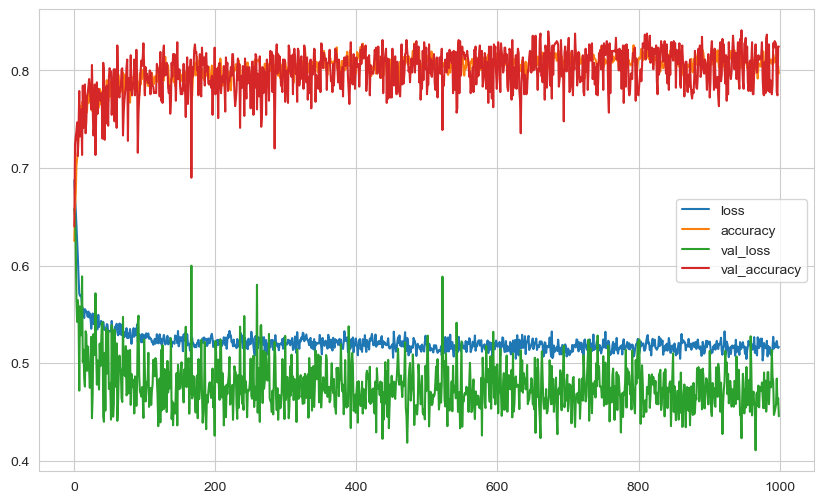

In [243]:
#Plotting the history
loss_df_stop2.plot()
plt.show()

In [244]:
#Seeing the evaluation of the model
stop_model2.evaluate(X_test, y_test, verbose=0)

[0.45767924189567566, 0.8059999942779541]

In [245]:
#Seeing the loss and the accuracy of the model
loss, accuracy = stop_model2.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.45767924189567566
accuracy:  0.8059999942779541


In [246]:
#Making y_pred 
y_pred = stop_model2.predict(X_test) > 0.5

#Printing the confusion matrix of the test data
print(confusion_matrix(y_test, y_pred))

#Printing the classification report of the test data
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[680 116]
 [ 78 126]]
              precision    recall  f1-score   support

           0       0.90      0.85      0.88       796
           1       0.52      0.62      0.57       204

    accuracy                           0.81      1000
   macro avg       0.71      0.74      0.72      1000
weighted avg       0.82      0.81      0.81      1000



32/32 [==============================] - 0s 2ms/step


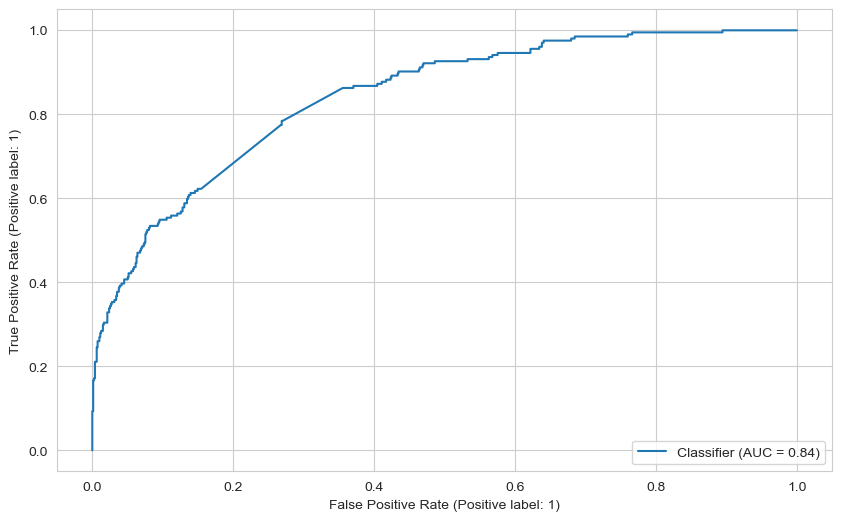

In [247]:
y_pred_proba = stop_model2.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [248]:
roc_auc_score(y_test, y_pred_proba)

0.84098802837718

## Optuna

In [254]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [255]:
trial_metric = "accuracy"
batch_size = 64


def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 8, 128)
    n_units2 = trial.suggest_int("n_units2", 8, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)

    tf.random.set_seed(42)
    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(n_units2, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    model.fit(
        X_train,
        y_train,
        validation_data=(X_test, y_test),
        batch_size=batch_size,
        epochs=100,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    return score

In [256]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
study.best_params

[I 2023-10-27 17:01:35,631] A new study created in memory with name: no-name-6f44a32c-e5dd-4951-92f2-3108c5b9b7c6


Restoring model weights from the end of the best epoch: 66.
Epoch 81: early stopping


[I 2023-10-27 17:02:08,741] Trial 0 finished with value: 0.8040000200271606 and parameters: {'n_units1': 33, 'n_units2': 118, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 5.397114198480874e-05, 'w0': 0.04409639604195903, 'w1': 0.021642224384266256}. Best is trial 0 with value: 0.8040000200271606.
[I 2023-10-27 17:02:49,220] Trial 1 finished with value: 0.6880000233650208 and parameters: {'n_units1': 121, 'n_units2': 75, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 6.578710252440802e-05, 'w0': 0.028717578045357486, 'w1': 0.16568751429965653}. Best is trial 0 with value: 0.8040000200271606.
[I 2023-10-27 17:03:31,770] Trial 2 finished with value: 0.777999997138977 and parameters: {'n_units1': 91, 'n_units2': 77, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 3.2942486279386405e-05, 'w0': 0.02143764741820804, 'w1': 0.04881994390762868}. Best is trial 0 with value: 0.8040000200271606.


Restoring model weights from the end of the best epoch: 22.
Epoch 37: early stopping


[I 2023-10-27 17:03:48,881] Trial 3 finished with value: 0.847000002861023 and parameters: {'n_units1': 42, 'n_units2': 104, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0025061295455100405, 'w0': 3.353146023340343, 'w1': 3.684855692778112}. Best is trial 3 with value: 0.847000002861023.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-27 17:03:55,690] Trial 4 finished with value: 0.7960000038146973 and parameters: {'n_units1': 17, 'n_units2': 118, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.00030528590276622563, 'w0': 4.5054474983698, 'w1': 0.08069986436803886}. Best is trial 3 with value: 0.847000002861023.
[I 2023-10-27 17:04:36,158] Trial 5 finished with value: 0.2720000147819519 and parameters: {'n_units1': 71, 'n_units2': 105, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.00018268068502996025, 'w0': 0.0914105182823289, 'w1': 0.1586526167088707}. Best is trial 3 with value: 0.847000002861023.


Restoring model weights from the end of the best epoch: 12.
Epoch 27: early stopping


[I 2023-10-27 17:04:47,228] Trial 6 finished with value: 0.8420000076293945 and parameters: {'n_units1': 14, 'n_units2': 22, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.008256654840428502, 'w0': 0.046084265783773205, 'w1': 0.018638594239926694}. Best is trial 3 with value: 0.847000002861023.


Restoring model weights from the end of the best epoch: 21.
Epoch 36: early stopping


[I 2023-10-27 17:05:01,111] Trial 7 finished with value: 0.8080000281333923 and parameters: {'n_units1': 21, 'n_units2': 25, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.02496779166149313, 'w0': 0.46895770278202953, 'w1': 0.015274252587127071}. Best is trial 3 with value: 0.847000002861023.


Restoring model weights from the end of the best epoch: 28.
Epoch 43: early stopping


[I 2023-10-27 17:05:20,916] Trial 8 finished with value: 0.8169999718666077 and parameters: {'n_units1': 51, 'n_units2': 11, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.07855939524755066, 'w0': 1.2125553551837287, 'w1': 0.05435002308860299}. Best is trial 3 with value: 0.847000002861023.


Restoring model weights from the end of the best epoch: 14.
Epoch 29: early stopping


[I 2023-10-27 17:05:34,626] Trial 9 finished with value: 0.8069999814033508 and parameters: {'n_units1': 116, 'n_units2': 48, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.007230836540651011, 'w0': 0.0657277516020166, 'w1': 0.22665244768255802}. Best is trial 3 with value: 0.847000002861023.


{'n_units1': 42,
 'n_units2': 104,
 'optimizer': keras.src.optimizers.nadam.Nadam,
 'learning_rate': 0.0025061295455100405,
 'w0': 3.353146023340343,
 'w1': 3.684855692778112}

In [258]:
# build model with optuna parameters
unit1, unit2, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)
tf.random.set_seed(42)
model = Sequential()
model.add(Dense(unit1, activation="relu"))
model.add(Dense(unit2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
model.fit(
    X_train,
    y_train,
    validation_split=0.1,
    batch_size=512,
    epochs=100,
    callbacks=[early_stop],
    class_weight=class_weights,
    verbose=1,
)

Epoch 1/100
16/16 [==============================] - 2s 31ms/step - loss: 0.6641 - recall: 0.4658 - val_loss: 0.6199 - val_recall: 0.6599
Epoch 2/100
16/16 [==============================] - 0s 10ms/step - loss: 0.6252 - recall: 0.6351 - val_loss: 0.6010 - val_recall: 0.6751
Epoch 3/100
16/16 [==============================] - 0s 12ms/step - loss: 0.6098 - recall: 0.6693 - val_loss: 0.5725 - val_recall: 0.6853
Epoch 4/100
16/16 [==============================] - 0s 9ms/step - loss: 0.5951 - recall: 0.6687 - val_loss: 0.6052 - val_recall: 0.7614
Epoch 5/100
16/16 [==============================] - 0s 13ms/step - loss: 0.5803 - recall: 0.7035 - val_loss: 0.5552 - val_recall: 0.7107
Epoch 6/100
16/16 [==============================] - 0s 11ms/step - loss: 0.5714 - recall: 0.7005 - val_loss: 0.5859 - val_recall: 0.7563
Epoch 7/100
16/16 [==============================] - 0s 9ms/step - loss: 0.5635 - recall: 0.6980 - val_loss: 0.6225 - val_recall: 0.7919
Epoch 8/100
16/16 [=================

In [259]:
history = model.history.history

In [260]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[642 154]
 [ 69 135]]
              precision    recall  f1-score   support

           0       0.90      0.81      0.85       796
           1       0.47      0.66      0.55       204

    accuracy                           0.78      1000
   macro avg       0.69      0.73      0.70      1000
weighted avg       0.81      0.78      0.79      1000



32/32 [==============================] - 0s 1ms/step


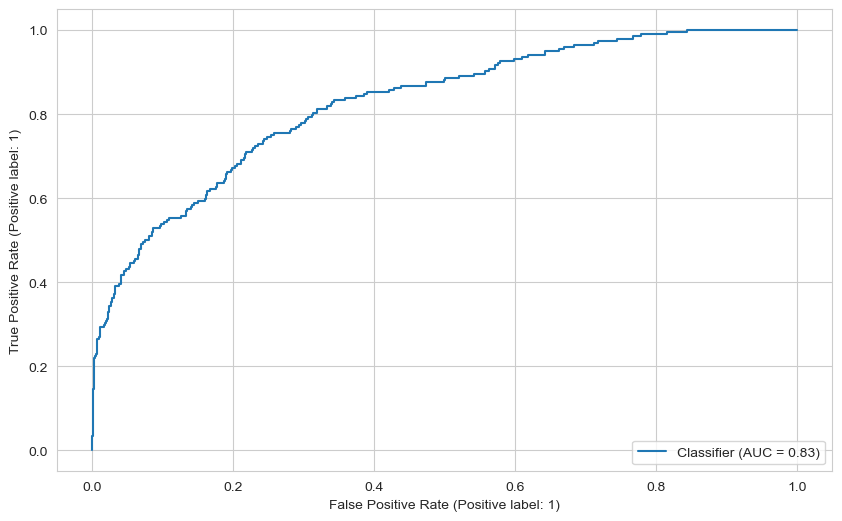

In [261]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [262]:
roc_auc_score(y_test, y_pred_proba)

0.8261405064538379

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

# Final Model and Model Deployment

## Prediction

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___